In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter("ignore") 

In [2]:
df = pd.read_excel('Cleaned_Bangalore_Rental_House_data.xlsx')

In [3]:
df['Balcony'] = df['Balcony'].replace("3+", 4).astype(float)

In [4]:
df.describe().round(2)

Bedroom  Bathroom  Balcony  Additional_rooms  Area (sq.ft)   Rating  \
count  6779.00   6779.00  6779.00           6779.00       6779.00  5920.00   
mean      2.28      2.18     1.26              0.52       1328.26     4.10   
std       0.86      0.94     0.96              0.86        824.55     0.23   
min       1.00      1.00     0.00              0.00        120.00     3.40   
25%       2.00      2.00     1.00              0.00        850.00     3.90   
50%       2.00      2.00     1.00              0.00       1200.00     4.10   
75%       3.00      3.00     2.00              1.00       1555.00     4.30   
max       6.00      6.00     4.00              4.00       9108.00     4.60   

       Covered_Parking  Open_Parking  Total_Parking   Brokerage  ...  \
count          6779.00       6779.00        6779.00     6779.00  ...   
mean              0.70          0.22           0.92    23538.30  ...   
std               0.65          0.48           0.84    49957.89  ...   
min               0.00          0.00           0.00        0.00  ...   
25%               0.00          0.00           0.00        0.00  ...   
50%               1.00          0.00           1.00        0.00  ...   
75%               1.00          0.00           1.00    35000.00  ...   
max               6.00          5.00          10.00  1400000.00  ...   

       Available_for_Family  Available_for_Women_Bachelors  \
count               6779.00                         6779.0   
mean                   0.96                            0.5   
std                    0.19                            0.5   
min                    0.00                            0.0   
25%                    1.00                            0.0   
50%                    1.00                            0.0   
75%                    1.00                            1.0   
max                    1.00                            1.0   

       Available_for_Men_Bachelors  Total_Floors  \
count                      6779.00       6779.00   
mean                          0.49          8.26   
std                           0.50          8.34   
min                           0.00          0.00   
25%                           0.00          3.00   
50%                           0.00          4.00   
75%                           1.00         13.00   
max                           1.00         40.00   

       Hospitals_and_Clinics_Nearby  Bank_ATMs_Nearby  Public_Places_Nearby  \
count                       6779.00           6779.00               6779.00   
mean                           5.70              4.35                  2.32   
std                            6.17              4.67                  2.28   
min                            0.00              0.00                  0.00   
25%                            1.00              0.00                  0.00   
50%                            4.00              3.00                  2.00   
75%                            9.00              8.00                  4.00   
max                           38.00             20.00                 16.00   

       Education_Centre_Nearby  Transportation_Depots_Nearby       Rent  
count                  6779.00                       6779.00    6779.00  
mean                      2.16                          1.02   44380.94  
std                       2.05                          1.22   47344.91  
min                       0.00                          0.00    3000.00  
25%                       0.00                          0.00   20000.00  
50%                       2.00                          1.00   32000.00  
75%                       3.00                          2.00   50000.00  
max                      12.00                          6.00  500000.00  

[8 rows x 22 columns]

# Univariate Analysis

In [5]:
def Bar_Plot(columns):
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    axes = axes.flatten()

    for i, column in enumerate(columns):
        counts = df[column].value_counts()

        ax = axes[i]
        bars = ax.bar(counts.index, counts, color='skyblue')

        for bar in bars:
            ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 50, 
                    str(bar.get_height()), ha='center', fontsize=10)

        ax.set_xlabel(f"Number of {column}")
        ax.set_ylabel("Count")
        ax.set_title(f"Distribution of {column}")

        ax.set_xticklabels(counts.index, rotation=90)

    plt.tight_layout()
    plt.show()


def Pie_Chart(columns, layout="row"):

    num_cols = len(columns)
    
    if layout == "row" and num_cols == 3:
        fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 1x3 layout
    elif layout == "grid" and num_cols <= 4:
        fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # 2x2 layout
        axes = axes.flatten()
    else:
        raise ValueError("Invalid layout type or number of columns. Use 'row' for 3 columns, 'grid' for up to 4.")

    for i, column in enumerate(columns):
        counts = df[column].value_counts()
        percentages = (counts / counts.sum()) * 100

        wedges, texts, autotexts = axes[i].pie(
            counts, labels=counts.index, autopct='%0.1f%%', startangle=90
        )

        axes[i].set_title(column)

        legend_labels = [f"{label}: {percent:.1f}%" for label, percent in zip(counts.index, percentages)]
        axes[i].legend(legend_labels, title=column, loc="upper left", bbox_to_anchor=(0.95, 0.75))

    plt.tight_layout()
    plt.show()

##### 1. **Bedroom Distribution**

   - Most properties have **2 bedrooms (41.6%)** and **3 bedrooms (32.2%)**.  
   - 1-bedroom properties make up **19.2%** of the dataset.  
   - Properties with 4, 5, and 6 bedrooms are much less common.  

##### 2. **Bathroom Distribution**
   
   - **2-bathroom properties are the most common (47.0%)**, followed by **1-bathroom (22.9%)** and **3-bathroom (21.6%)** properties.  
   - Properties with 4+ bathrooms are rare.  

##### 3. **Balcony Distribution**
    
   - **41.4%** of properties have **1 balcony**, and **26.0%** have **2 balconies**.  
   - **22.4% of properties have no balcony**, while having **3+ balconies is uncommon**.  

##### 4. **Additional Rooms Distribution**
 
   - The majority of properties (**64.3%**) have **no additional rooms**.  
   - **25.3% have 1 additional room**, while having **2 or more additional rooms is rare**.  

### Key Insights:  

- Most properties have **2-3 bedrooms and 1-2 bathrooms**.  
- A significant portion has at least **one balcony**, but a notable number have none.  
- The majority of properties do **not have additional rooms**.  
- Larger configurations (more bedrooms, bathrooms, and balconies) are **less common**.  

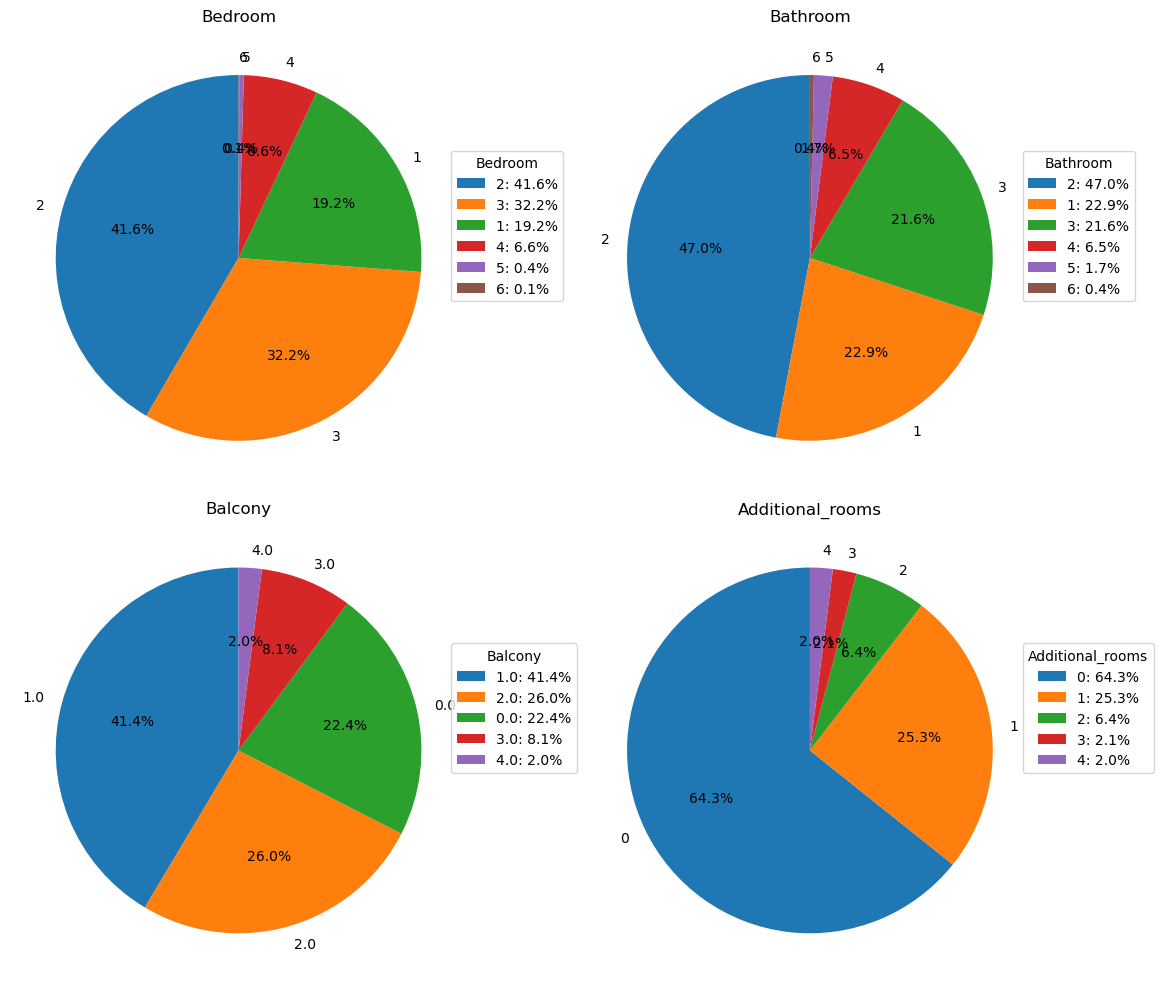

In [6]:
Pie_Chart(['Bedroom', 'Bathroom', 'Balcony', 'Additional_rooms'] , layout="grid")

### **1. Distribution of Facing**  

- **East-facing properties are the most common (2247 listings).**  
- **1893 properties have "Not Specified" facing,** indicating missing data.  
- **North-facing (1175) and West-facing (583) properties are also relatively common.**  
- **Less common facings include North-East (501), South (167), and even rarer South-East (76) and South-West (32).**  

### **2. Distribution of Furnishing**  

- **Semi-furnished properties dominate (5097 listings).**  
- **Furnished properties (1177) are less common, while unfurnished properties (505) are the least common.**  
- **Most properties offer at least some level of furnishing.**  

### **3. Distribution of Power Backup**  

- **A significant portion of properties (3218) have no power backup.**  
- **Full power backup is available in 2986 properties.**  
- **Partial backup is the least common (575 properties).**  

### **4. Distribution of Pet-Friendly Properties**  

- **Most properties (4972) do not allow pets.**  
- **Only 1807 properties are pet-friendly.**  

### **Key Insights:**  

1. **East-facing properties are the most preferred, while South and South-West facing are rare.**  
2. **Semi-furnished homes are the most common, while fully unfurnished homes are rare.**  
3. **Power backup is split, with many properties having either full or no backup, and very few with partial backup.**  
4. **Most properties do not allow pets, limiting options for pet owners.**  

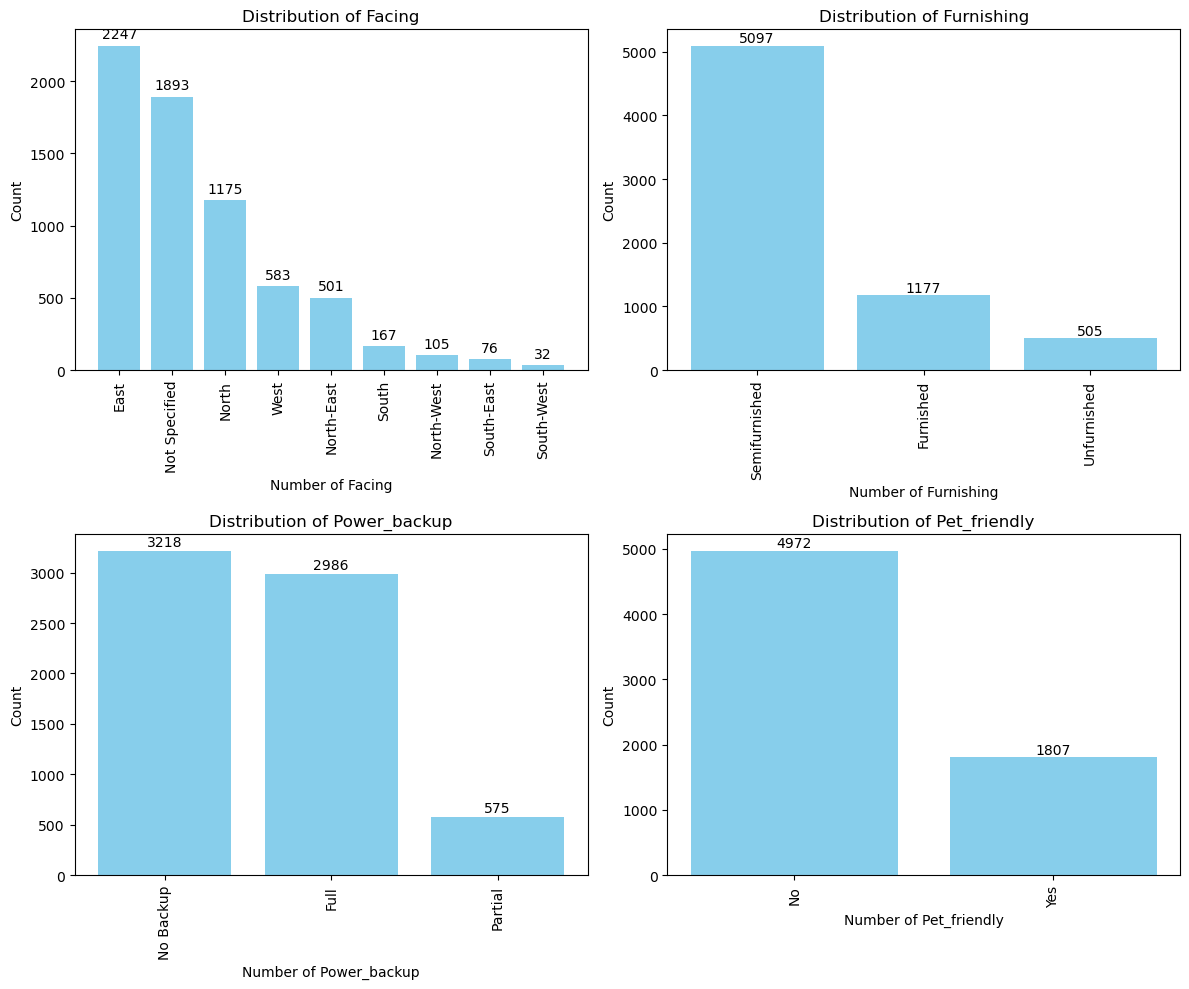

In [7]:
Bar_Plot(['Facing', 'Furnishing', 'Power_backup', 'Pet_friendly'])

#### **1. Distribution of Region**  

- **Bangalore East (1929) and Bangalore South (1927) have the highest number of listings.**  
- **Bangalore North (1767) follows closely.**  
- **Bangalore West (782) and Bangalore Central (379) have the fewest listings.**  
- **This suggests that the majority of listings are concentrated in the East, South, and North regions.**  

#### **2. Distribution of Charges (Water & Electricity Inclusion in Rent)**  

- **Most properties (4881) do NOT include charges for water and electricity in rent.**  
- **Only 1898 properties have charges included.**  
- **This suggests that renters typically need to pay separately for utilities.**  

#### **3. Distribution of Property Type** 
                                                               
- **Apartments dominate the listings (3959), making them the most popular housing type.**  
- **House/Villa (1579) and Builder Floor (1075) are significantly less common.**  
- **Studio apartments (138) and Serviced Apartments (28) are rare.**  
- **This indicates that the market is heavily skewed towards apartments, with limited options for alternative housing.**  

#### **4. Distribution of Listing Type (Posted By)**  

- **Most listings are posted by Owners (3788).**  
- **Dealers (2991) also contribute significantly to listings.**  
- **This suggests that renters have a mix of direct owner listings and dealer-mediated options.**  

### **Key Takeaways:**  

- **Bangalore East, South, and North are the most active regions for listings.**  
- **Most rental properties do not include water and electricity charges.**  
- **Apartments are by far the most common housing type.**  
- **Listings are mostly posted by owners, but a significant portion comes from dealers.**  

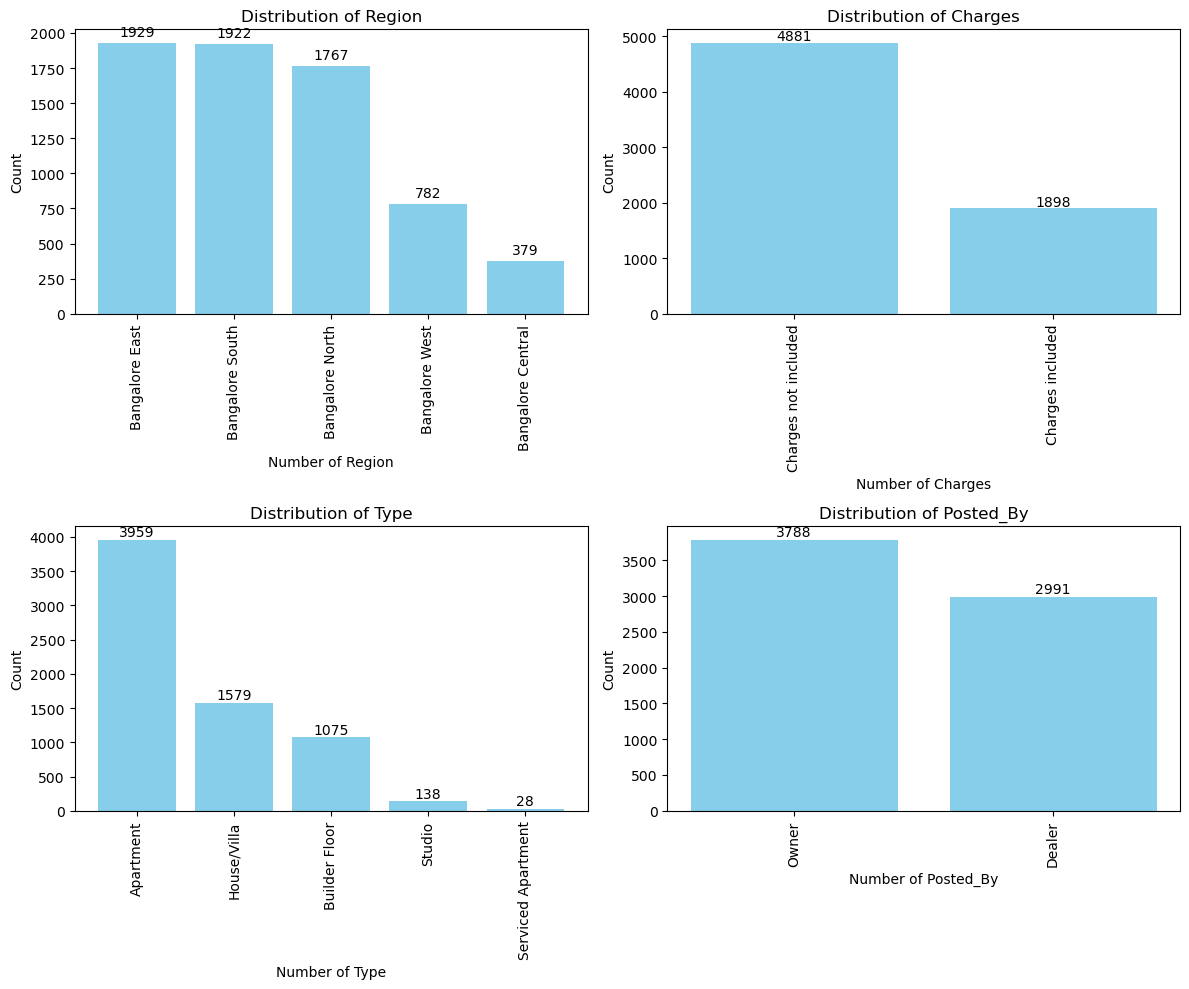

In [8]:
Bar_Plot(['Region' , 'Charges' , 'Type' , 'Posted_By'])

#### **1. Availability for Families**  

- **96.1% of listings are available for families**, making them the primary target for rental properties.  
- **Only 3.9% of listings do not allow families**, indicating that family-friendly rentals dominate the market.  

#### **2. Availability for Women Bachelors**  
                                                 
- **49.9% of listings allow women bachelors**, while **50.1% do not**.  
- **This shows an almost equal split in availability for single women, suggesting some restrictions exist in the market.**  

#### **3. Availability for Men Bachelors**  
                                                                                  
- **48.7% of listings allow men bachelors**, while **51.3% do not**.  
- **Similar to women bachelors, there is nearly a 50-50 split, indicating that landlords may have a cautious approach to renting to bachelors.**  

### **Key Takeaways:**  

- **Families have the highest acceptance rate, with most properties being family-friendly.**  
- **Bachelor tenants (both men and women) face restrictions, with around half of the listings not allowing them.**  
- **The acceptance rate for men and women bachelors is nearly identical, meaning landlords do not favor one group significantly over the other.**  

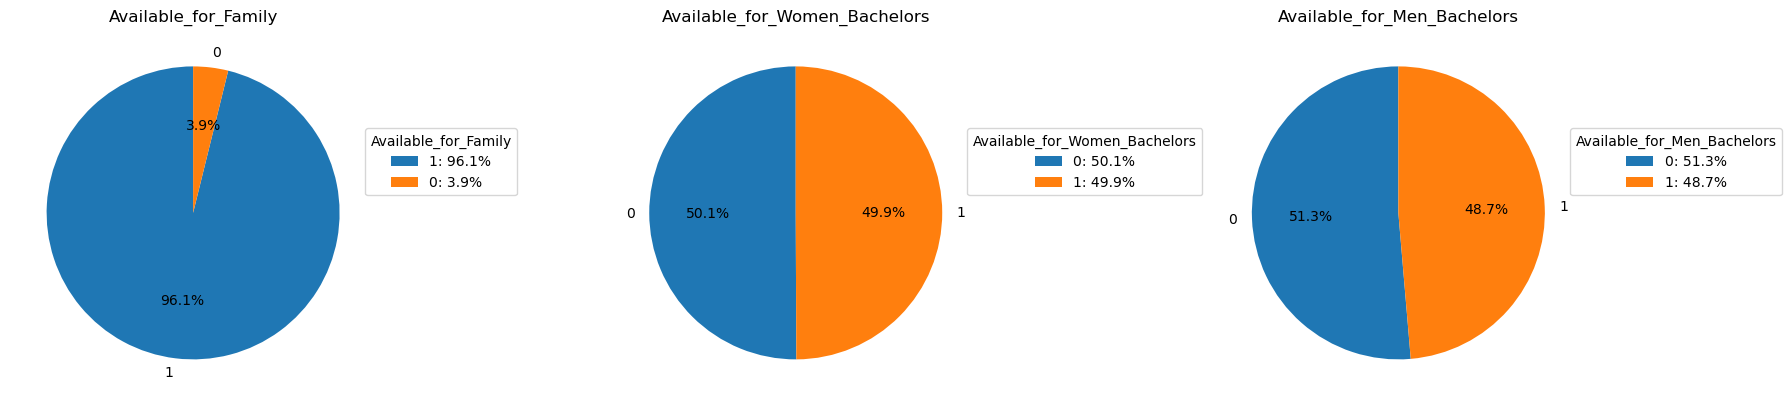

In [9]:
Pie_Chart(['Available_for_Family', 'Available_for_Women_Bachelors', 'Available_for_Men_Bachelors'] , layout="row")

In [10]:
df.columns

Index(['Property_ID', 'Region', 'Address', 'Locality', 'Bedroom', 'Bathroom',
       'Balcony', 'Additional_rooms', 'Area (sq.ft)', 'Facing', 'Furnishing',
       'Rating', 'Age', 'Covered_Parking', 'Open_Parking', 'Total_Parking',
       'Power_backup', 'Pet_friendly', 'Brokerage', 'Deposit', 'Maintenance',
       'Charges', 'Type', 'Available_for_Family',
       'Available_for_Women_Bachelors', 'Available_for_Men_Bachelors',
       'Posted_By', 'Total_Floors', 'Floor_For_Rent',
       'Hospitals_and_Clinics_Nearby', 'Bank_ATMs_Nearby',
       'Public_Places_Nearby', 'Education_Centre_Nearby',
       'Transportation_Depots_Nearby', 'Rent'],
      dtype='object')

In [11]:
def univariate_analysis(column):
    print(f"\n{'='*30} Univariate Analysis: {column} {'='*30}\n")

    sns.set_style("whitegrid")

    fig, axes = plt.subplots(1, 3, figsize=(20, 6))

    sns.histplot(df[column], bins=30, kde=True, ax=axes[0], color='#3498db', edgecolor='black')
    axes[0].set_title(f"Histogram & KDE of {column}", fontsize=14)
    axes[0].set_xlabel(column, fontsize=12)
    axes[0].set_ylabel("Frequency", fontsize=12)

    sns.boxplot(x=df[column], ax=axes[1], color='#e74c3c', width=0.4)
    sns.stripplot(x=df[column], ax=axes[1], color='black', size=3, jitter=True, alpha=0.5)
    axes[1].set_title(f"Boxplot of {column}", fontsize=14)
    axes[1].set_xlabel(column, fontsize=12)

    sns.violinplot(x=df[column], ax=axes[2], inner="quartile", color='#2ecc71')
    axes[2].set_title(f"Violin Plot of {column}", fontsize=14)
    axes[2].set_xlabel(column, fontsize=12)

    plt.tight_layout()
    plt.show()

### **Insights from the Univariate Analysis of Area (sq. ft.)**  

#### **1. Histogram & KDE Plot**  

- The distribution of area is **right-skewed**, meaning most properties have a **smaller area** (e.g., below 2000 sq. ft.), but there are some **very large properties** that create a long tail.  
- The highest frequency of properties falls **between 1000 to 1500 sq. ft.**, making this the most common size range.  
- A smooth KDE curve confirms this pattern, showing a peak around **1200-1300 sq. ft.**  

#### **2. Boxplot**  

- The **median area** (represented by the central line in the box) is **below 2000 sq. ft.**  
- There are **many outliers beyond 4000 sq. ft.**, indicating the presence of luxury or large properties that are rare but significantly larger than the average.  
- The interquartile range (IQR) is relatively compact, meaning most properties are within a small range of sizes.  

#### **3. Violin Plot**  
    
- The widest section of the violin plot confirms that most properties are **clustered between 1000 to 2000 sq. ft.**  
- The distribution narrows as the area increases, reinforcing that **large properties are rare but exist in the dataset.**  
- The density also suggests a **bimodal-like pattern**, meaning there could be two main clusters of property sizes (e.g., apartments vs. villas).  

### **Key Takeaways:**  

- **Most properties are in the range of 1000-2000 sq. ft., making it the standard size.**  
- **There are significant outliers beyond 4000 sq. ft., representing large or luxury properties.**  
- **The right-skewed distribution suggests that while small-to-medium-sized properties dominate, a few very large properties increase the range significantly.**  


============================== Univariate Analysis: Area (sq.ft) ==============================



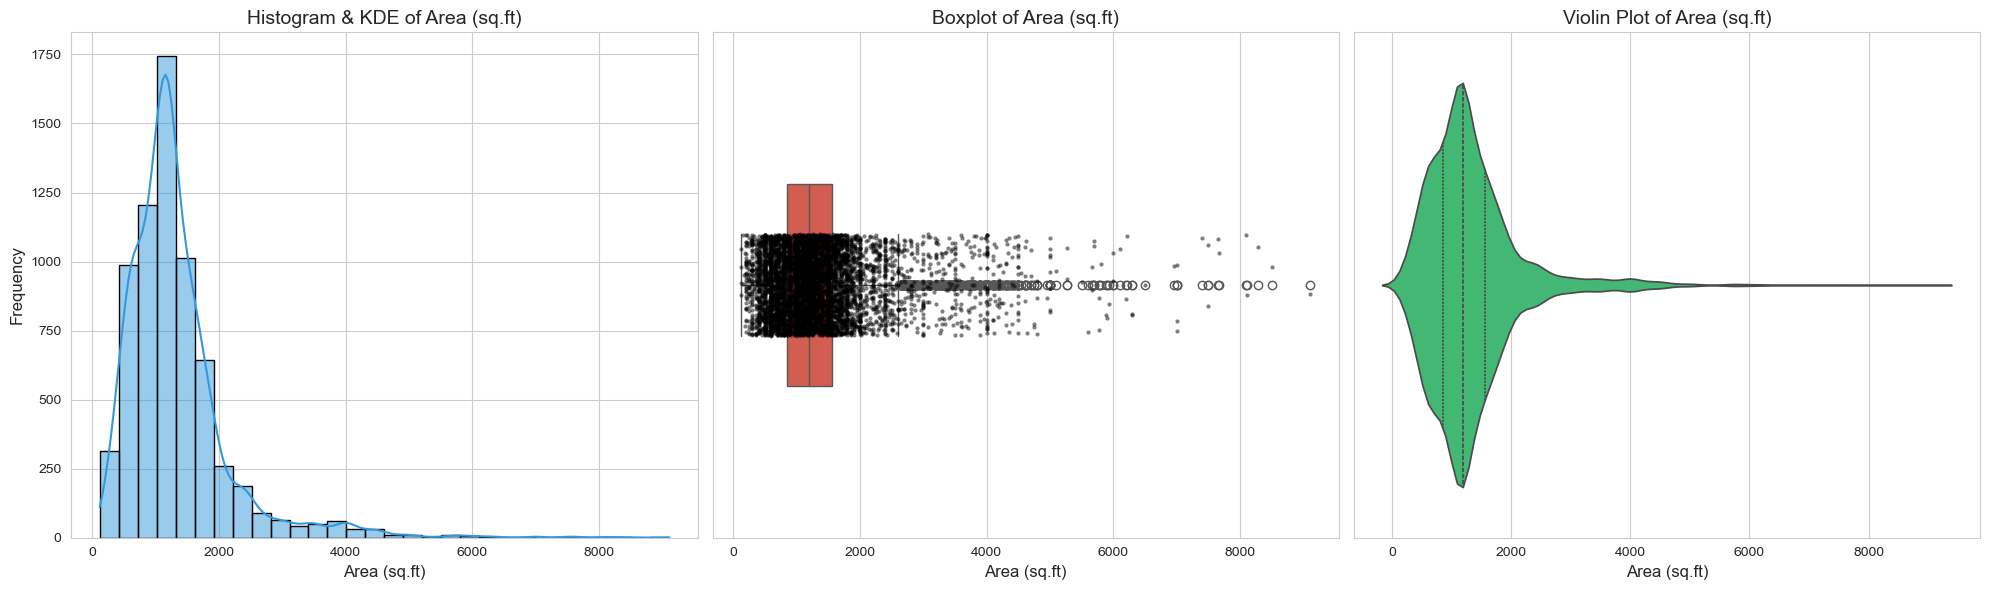

In [12]:
univariate_analysis('Area (sq.ft)')

### **Insights from the Univariate Analysis of Deposit**  

#### **1. Histogram & KDE Plot**  

- The deposit distribution is **highly right-skewed**, indicating that **most deposits are on the lower end**, but a few properties require very high deposits.  
- The highest frequency is at the **lower deposit values**, suggesting that affordable rental properties dominate the dataset.  
- There is a **long tail** extending towards very high deposit values, meaning some properties have significantly higher deposit requirements.  

#### **2. Boxplot**  
    
- The **median deposit value is quite low**, suggesting that a majority of properties require relatively affordable deposits.  
- There are a **large number of outliers**, extending up to the **millions**, indicating that some high-end properties demand substantial deposits.  
- The IQR (Interquartile Range) is **narrow**, meaning most deposits are clustered in a small range, but the extreme outliers create a wide spread.  

#### **3. Violin Plot**  
    
- The density is highest for **lower deposit values**, showing that a significant portion of listings have low deposit requirements.  
- The long, thin tail towards the right further confirms the presence of **high-end luxury properties with very high deposits**.  
- The plot suggests that while some properties require significantly higher deposits, they are **relatively rare** in the dataset.  

### **Key Takeaways:**  

- **Most properties require a low deposit, making affordable housing common in the dataset.**  
- **There are significant outliers, with some properties demanding deposits in the millions.**  
- **The distribution is right-skewed, meaning high-deposit properties are rare but exist.**  


============================== Univariate Analysis: Deposit ==============================



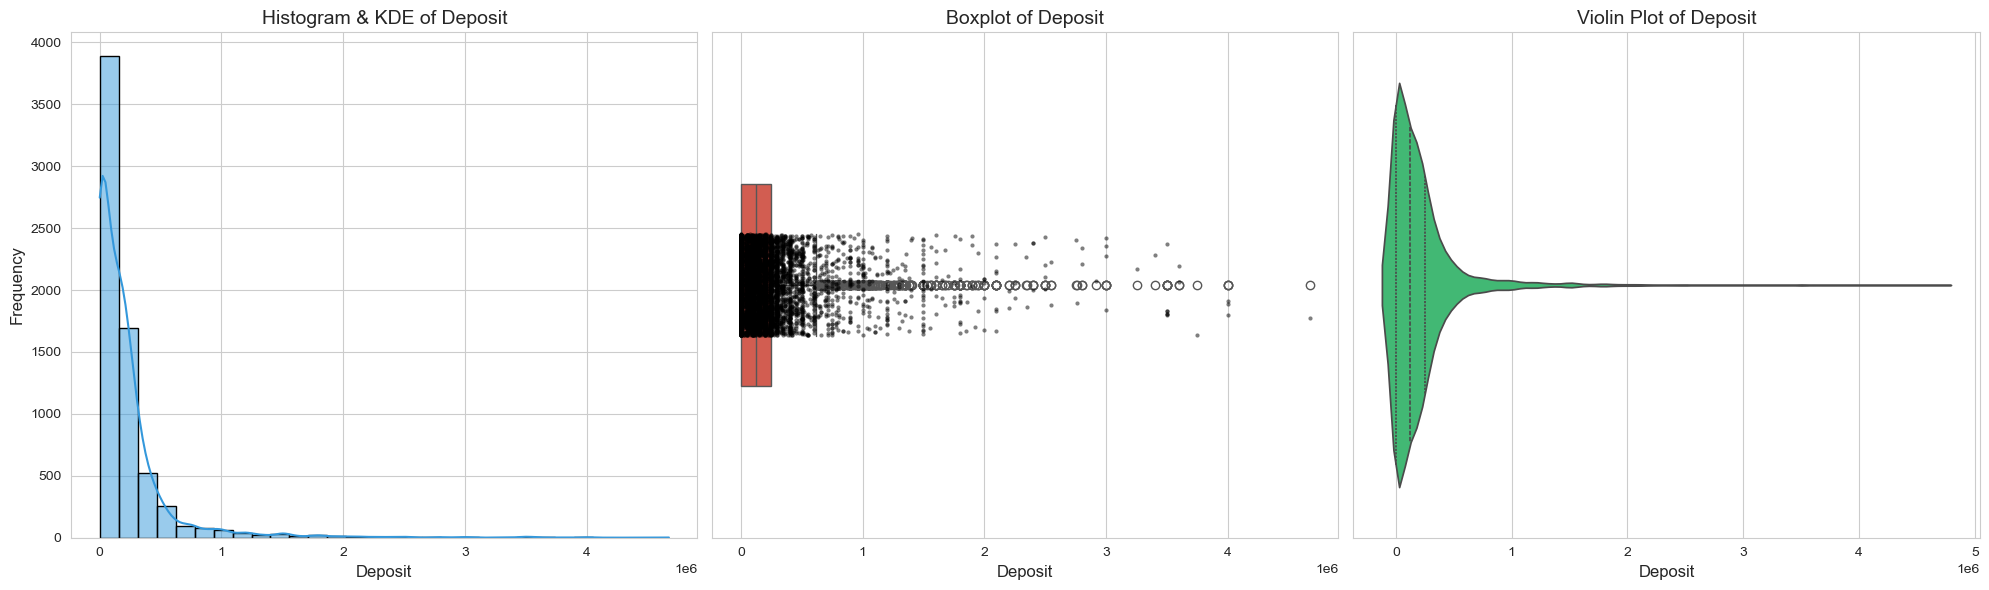

In [13]:
univariate_analysis('Deposit')

### **Insights from the Univariate Analysis of Brokerage**  

#### **1. Histogram & KDE Plot**  

- The **brokerage fee distribution is highly right-skewed**, meaning most brokerage fees are on the **lower end**.  
- A significant majority of values are clustered near **zero**, suggesting that many properties either have **low brokerage fees** or none at all.  
- A long **tail extends towards high brokerage values**, indicating that some properties require **substantial brokerage fees**.  

#### **2. Boxplot**  

- The **median brokerage value is quite low**, confirming that most properties charge **little or no brokerage**.  
- There are **several outliers**, some exceeding **1 million**, suggesting that high-end properties demand **very high brokerage fees**.  
- The **IQR is narrow**, meaning most values are concentrated in a small range, but extreme cases extend the overall spread.  

#### **3. Violin Plot**  

- The **highest density** of brokerage fees is near **zero**, reinforcing that most properties **require little or no brokerage**.  
- The **long tail on the right** again confirms that a few properties have **exceptionally high brokerage fees**, but these are rare.  
- The plot shows a **wider spread at low values**, indicating that lower brokerage fees are much more common.  

### **Key Takeaways:**  

- **Most properties have low or no brokerage fees, making them more affordable for tenants.**  
- **A few high-end properties have very high brokerage fees, acting as outliers.**  
- **The dataset is highly right-skewed, with a concentration of values at the lower end.**  


============================== Univariate Analysis: Brokerage ==============================



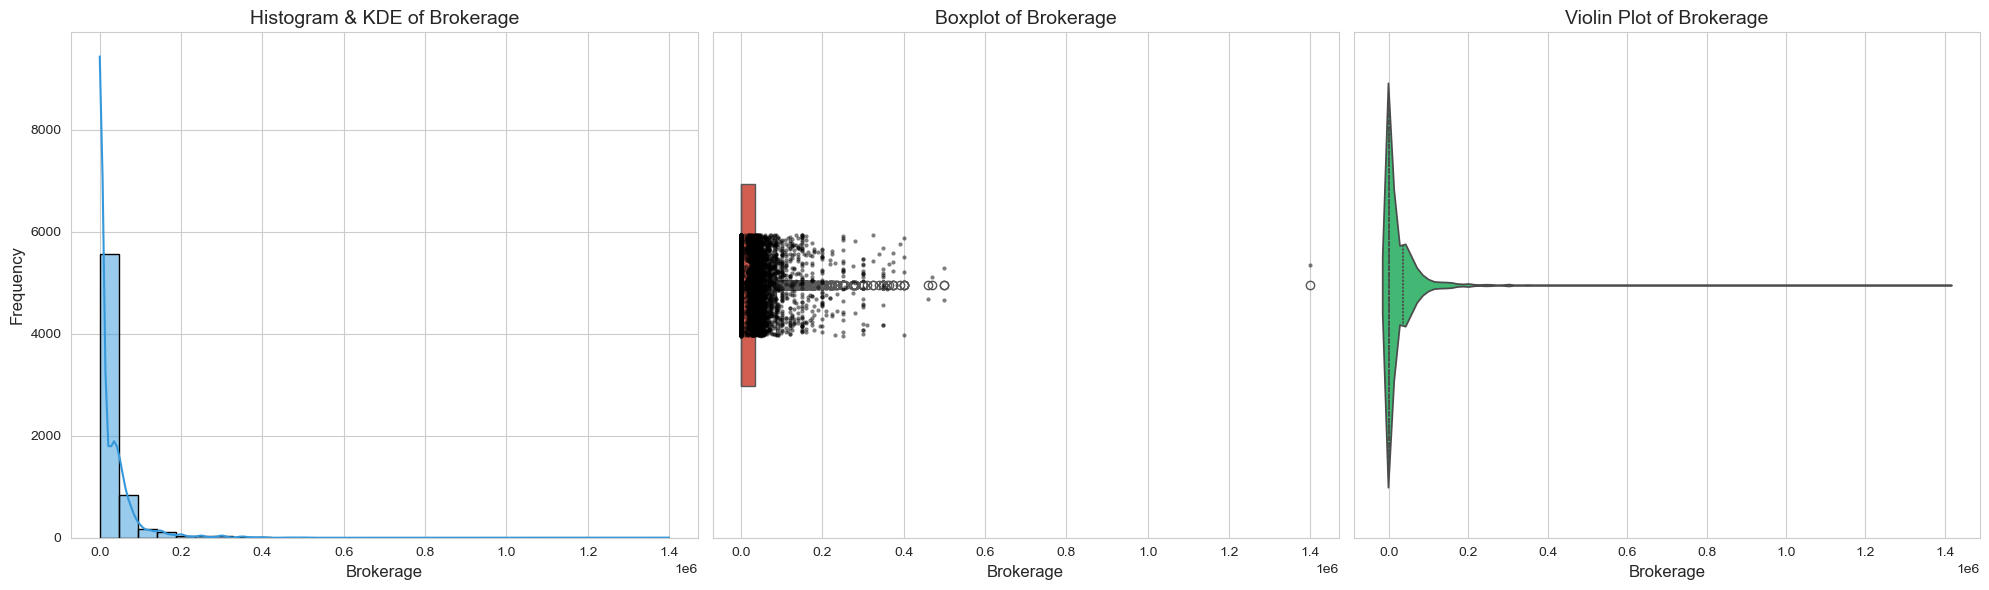

In [14]:
univariate_analysis('Brokerage')

### **Insights from the Univariate Analysis of Maintenance**  

#### **1. Histogram & KDE Plot**  

- The **distribution of maintenance charges is highly right-skewed**, meaning most properties have **low maintenance costs**.  
- A majority of values are concentrated near **zero**, suggesting that many properties either have **low or no maintenance fees**.  
- A long **tail extends towards higher values**, indicating that some properties have **very high maintenance costs**, but these are rare.  

#### **2. Boxplot**  

- The **median maintenance value is low**, confirming that most properties have **affordable maintenance fees**.  
- There are **many outliers**, with some properties having maintenance costs above **50,000**.  
- The **IQR is narrow**, meaning the majority of values fall within a small range, but high-end properties create a long spread.  

#### **3. Violin Plot**  

- The **highest density** of maintenance values is concentrated at **low values**, indicating that low maintenance fees are **common**.  
- The **long tail on the right** again confirms that **a few properties have exceptionally high maintenance costs**, but they are **outliers**.  
- The **shape of the violin plot shows a wider spread at the lower end**, reinforcing that low values are much more frequent.  

### **Key Takeaways:**  
    
- **Most properties have low maintenance fees, making them attractive to tenants.**  
- **A few high-end properties have extremely high maintenance costs, acting as outliers.**  
- **The dataset is highly right-skewed, with a concentration of values at the lower end.**  


============================== Univariate Analysis: Maintenance ==============================



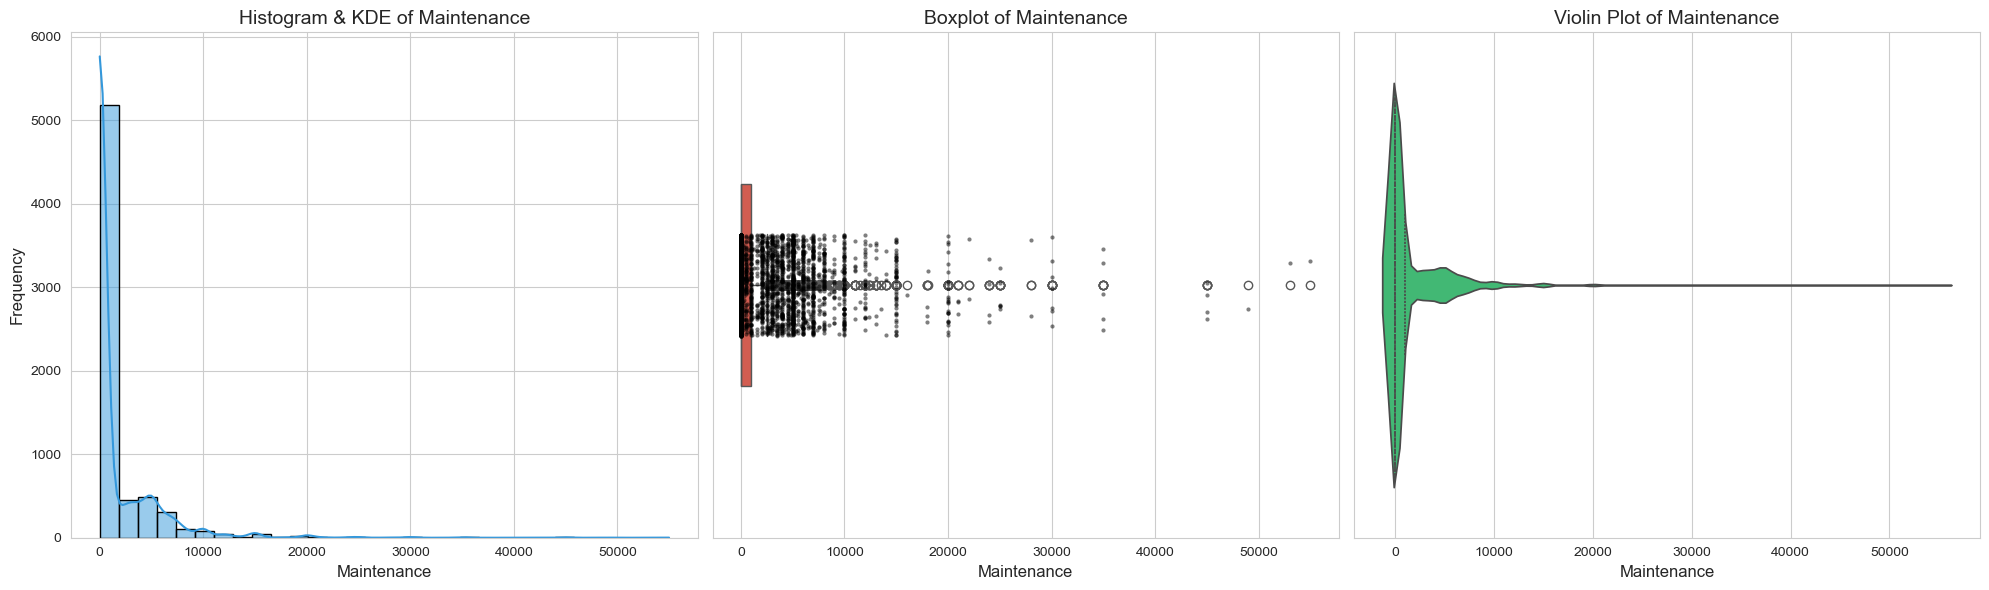

In [15]:
univariate_analysis('Maintenance')

### **Insights from the Univariate Analysis of Rent**  

#### **1. Histogram & KDE Plot**  

- The **distribution of rent is highly right-skewed**, meaning most properties have **low to moderate rent values**.  
- A majority of properties have rent **below ₹50,000**, with a sharp decline as rent increases.  
- There is a **long tail extending towards ₹500,000**, indicating the presence of **luxury properties with exceptionally high rents**.  

#### **2. Boxplot**  

- The **median rent is relatively low**, suggesting that most properties are **affordable for the general population**.  
- **Numerous outliers** exist, with some properties having rents well above ₹100,000 and even ₹400,000.  
- The **IQR (Interquartile Range) is narrow**, meaning rent values are tightly packed around the lower end, but **high-end properties create a significant spread**.  

#### **3. Violin Plot**  

- The **widest part of the violin plot** is near the lower rent values, confirming that **most properties fall in the lower rent bracket**.  
- The **long, thin tail extending towards higher values** represents **a few premium properties with extremely high rents**.  
- The **density plot shows a peak at lower rent values**, reinforcing that affordability is **a key trend in the dataset**.  

### **Key Takeaways:**  

- **Most properties have lower rent values, making them suitable for budget-conscious renters.**  
- **A few high-end properties have exceptionally high rent, making them outliers.**  
- **The dataset is highly right-skewed, meaning affordable rentals dominate the market.**  


============================== Univariate Analysis: Rent ==============================



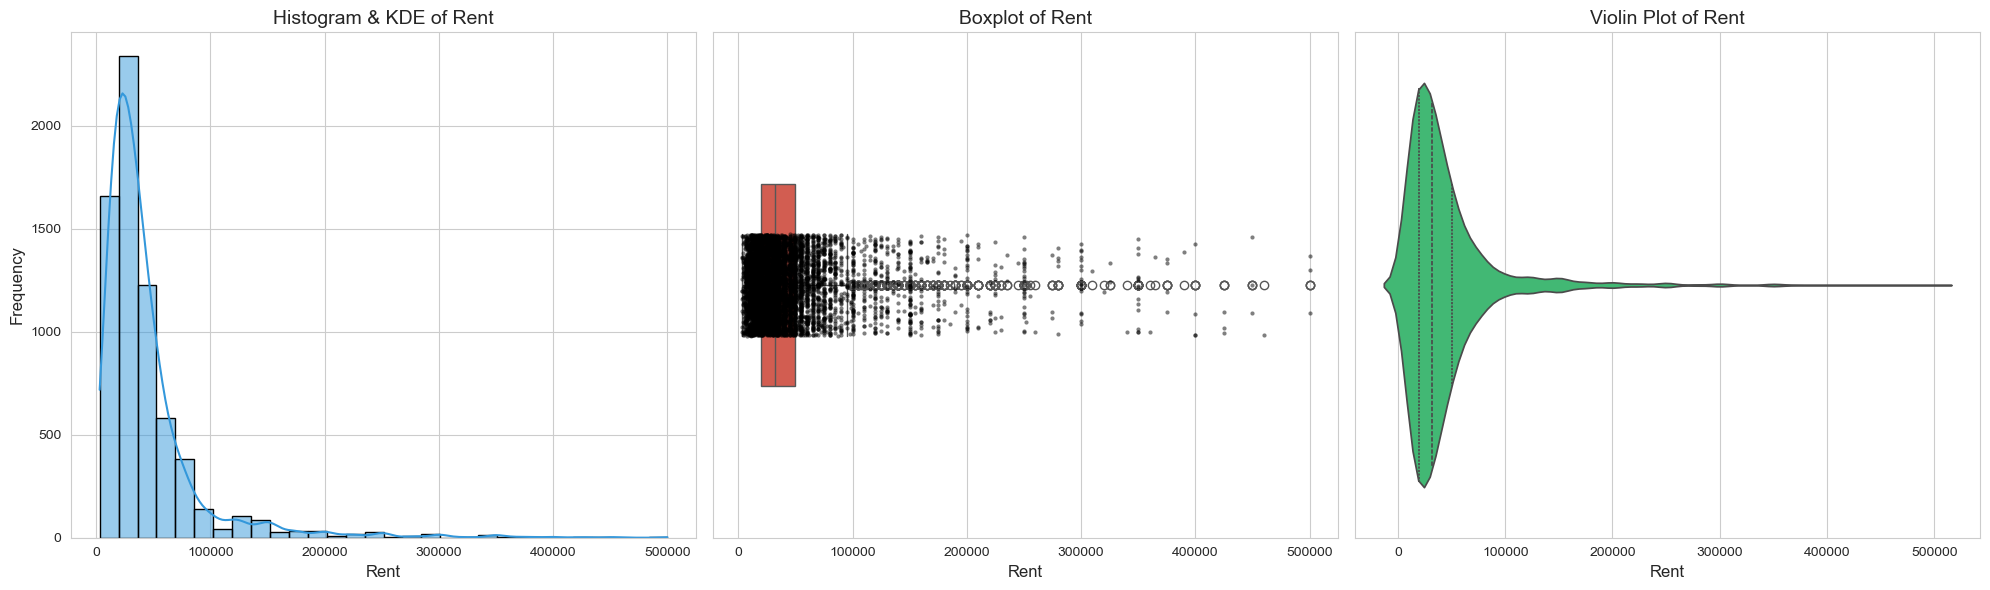

In [16]:
univariate_analysis('Rent')

### **Insights from the Univariate Analysis of Hospitals and Clinics Nearby**

#### **1. Histogram & KDE Plot**   
    
   - Most urban properties have **fewer than 10 hospitals/clinics nearby**.  
   - Only a few properties are located in areas with **exceptionally high healthcare access**.

#### **2. Boxplot**   
    
   - **The majority** of properties have between **0 to 10 hospitals nearby**.  
   - Outliers exist where some properties have **20+ hospitals nearby**, indicating healthcare hubs.

#### **3. Violin Plot** 

   - The highest density of properties is concentrated in the **0-5 range**.  
   - A long tail suggests that a **few regions have abundant healthcare facilities**, though they are rare.

### **Key Takeaways:**  
       
- **A reasonable number of nearby hospitals for an urban property is 2-3.** This aligns with the **median and mode** from the dataset.  
- **Healthcare access varies widely across regions.**  


============================== Univariate Analysis: Hospitals_and_Clinics_Nearby ==============================



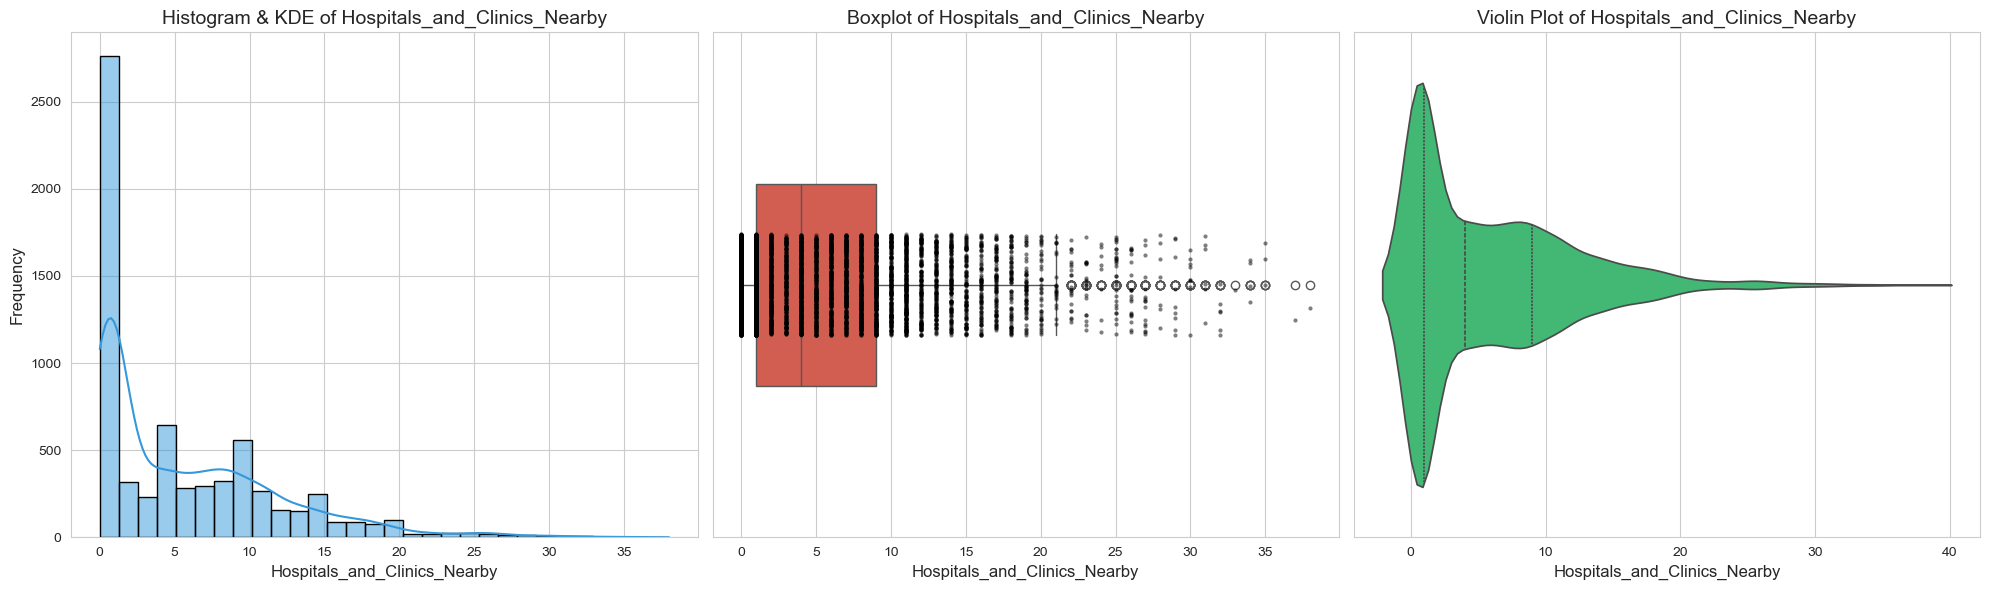

In [17]:
univariate_analysis('Hospitals_and_Clinics_Nearby')

### **Insights from Total Floors Distribution Analysis**  

#### 1. **Most Buildings Are Low to Mid-Rise**  

   - The **histogram** shows a **right-skewed distribution**, meaning most buildings have fewer floors.  
   - A **sharp peak is seen around 4-5 floors**, indicating that mid-rise buildings are most common.  
   - A significant number of properties also have **1-2 floors**, likely representing independent houses or low-rise apartments.  

#### 2. **High Variability & Outliers**  
       
   - The **boxplot** highlights a wide interquartile range (IQR) from **2 to 10 floors**, showing **substantial variation** in the number of floors.  
   - There are **many outliers** beyond 15 floors, suggesting the presence of **high-rise buildings**.  

#### 3. **Violin Plot Shows Bimodal Distribution**  
       
   - The **violin plot** suggests two density clusters—one around **low-rise (1-5 floors)** and another around **mid-to-high-rise (10+ floors)** buildings.  
   - There is a long tail extending toward **30-40 floors**, indicating a **small but significant number of skyscrapers**.  


============================== Univariate Analysis: Total_Floors ==============================



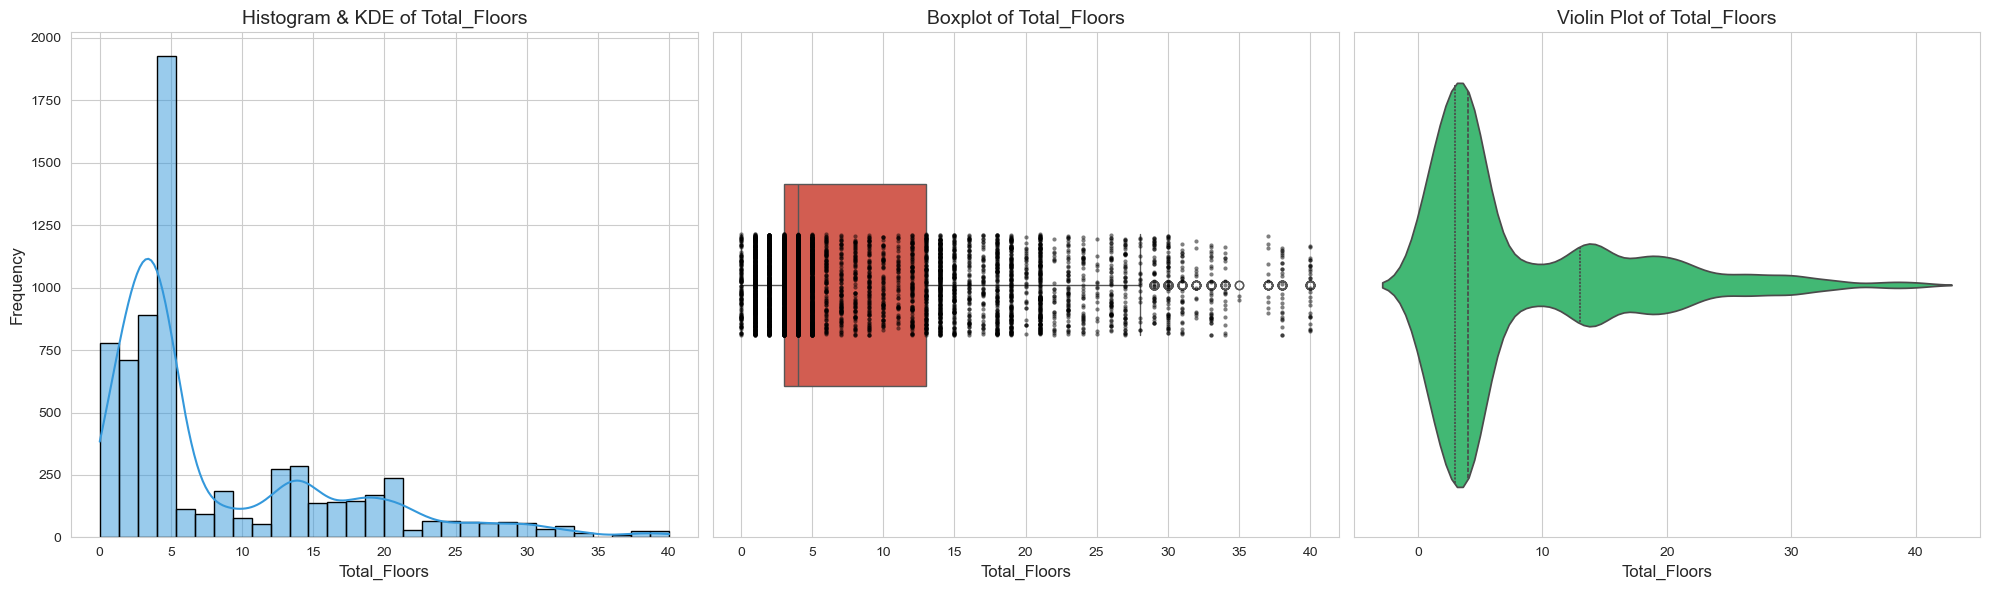

In [18]:
univariate_analysis('Total_Floors')

In [19]:
df['Locality'] = df['Locality'] + ' ' + df['Region'].str.split(' ').str.get(-1)

### **Insights from Rent Distribution Analysis**  

#### **1. Skewed Distribution of Rent (Left Graph - Original Rent Values)**  

   - The rent distribution is **right-skewed**, meaning most properties have relatively lower rents, while a few have extremely high values.  
   - A majority of rental values seem to be **below ₹50,000**, but a long tail extends toward **₹200,000+**, indicating luxury rentals.  
   - There are **outliers** in the dataset with very high rent, which can distort average-based analysis.  

#### **2. Normalized Rent Distribution (Right Graph - Log Transformed)**  

   - Applying a **log transformation** makes the rent distribution approximately **normal (bell-shaped)**.  
   - This transformation helps in reducing the impact of outliers and makes the data more suitable for statistical modeling.  
   - The log scale ensures that properties with high and low rents are more evenly distributed, improving interpretability.  

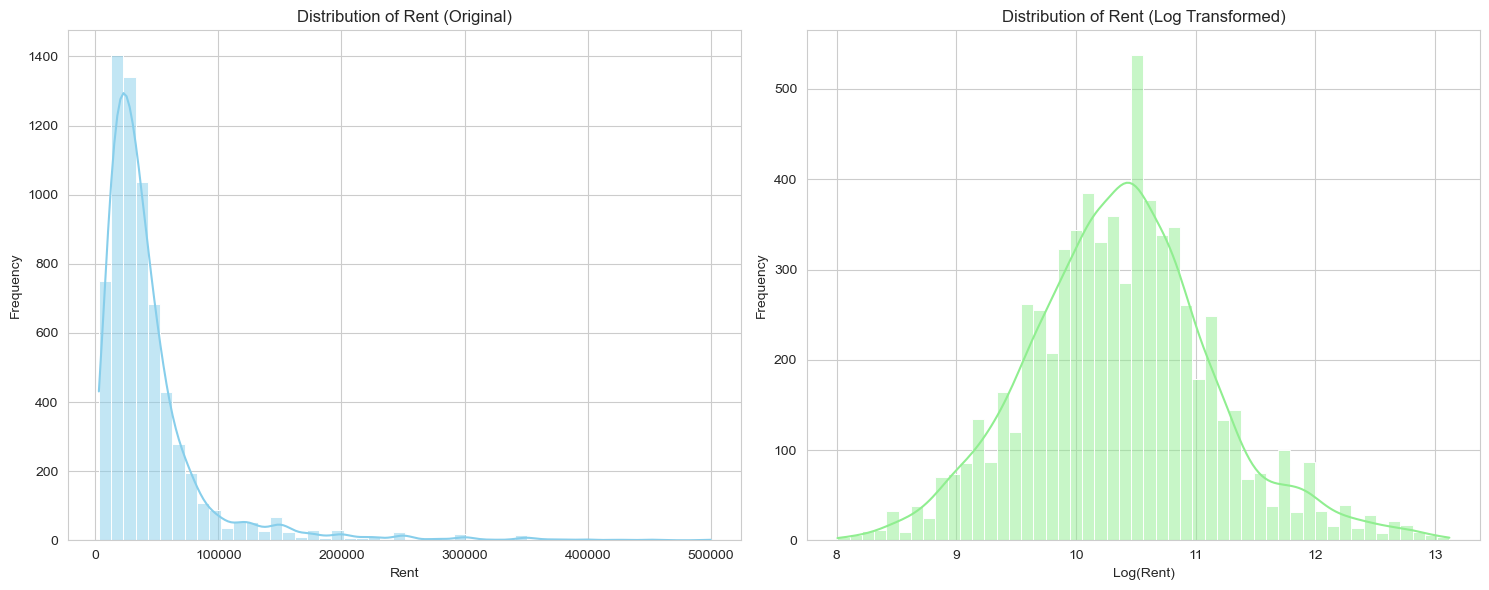

In [20]:
plt.figure(figsize=(15, 6))

# Distribution plot without log transformation
plt.subplot(1, 2, 1)
sns.histplot(df['Rent'], kde=True, bins=50, color='skyblue')
plt.title('Distribution of Rent (Original)')
plt.xlabel('Rent')
plt.ylabel('Frequency')

# Distribution plot with log transformation
plt.subplot(1, 2, 2)
sns.histplot(np.log1p(df['Rent']), kde=True, bins=50, color='lightgreen')
plt.title('Distribution of Rent (Log Transformed)')
plt.xlabel('Log(Rent)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### **Insights from Box Plot Analysis of Rent**  

#### **1. High Presence of Outliers in Original Rent Data (Left Graph)**  

   - The box plot of original rent values shows **numerous outliers**, indicating a significant variation in rental prices.  
   - The **whiskers** (representing the spread of most values) are relatively short, while many data points extend far beyond, especially **above ₹100,000**.  
   - This confirms that a small portion of luxury rentals disproportionately **inflates** the maximum rent values.  

#### **2. Improved Distribution with Log Transformation (Right Graph)**  

   - The log-transformed rent distribution is **more symmetric** with a well-contained range.  
   - The whiskers in this plot are **longer**, suggesting a more balanced distribution, and **outliers are less extreme** compared to the original scale.  
   - The **interquartile range (IQR)**, representing the middle 50% of rental prices, is better defined, making it easier to interpret rental price trends.  

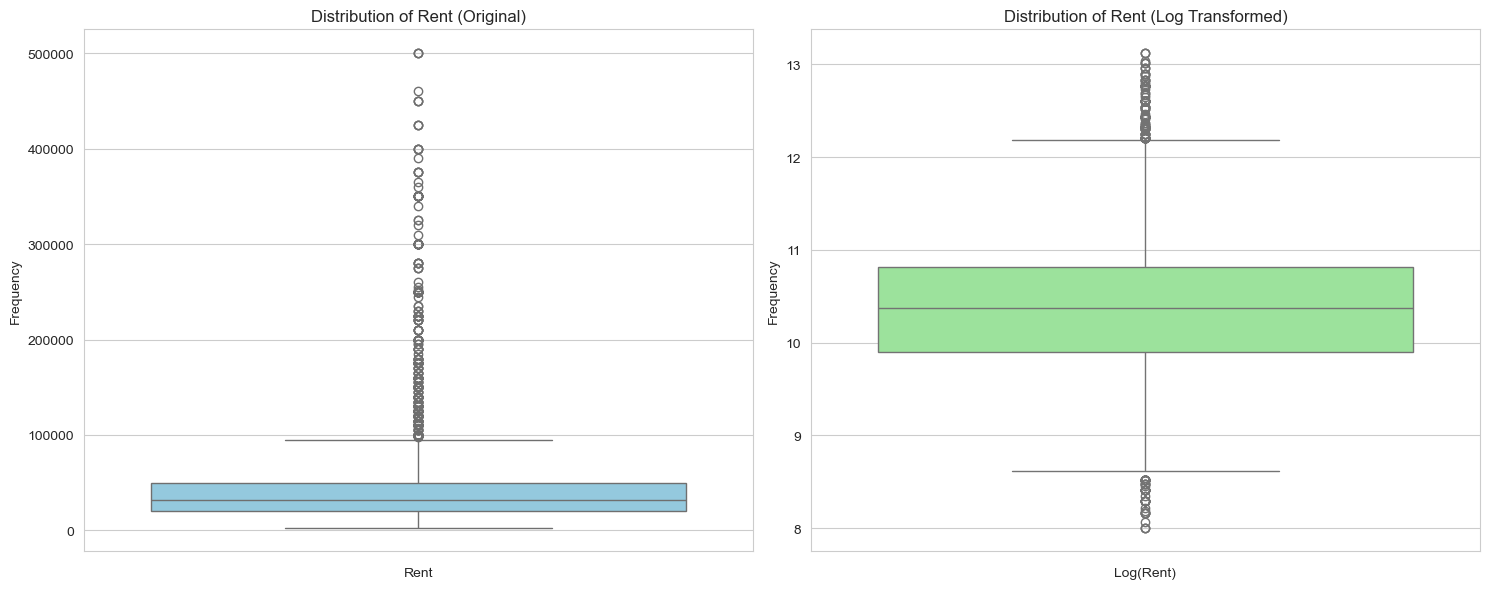

In [21]:
plt.figure(figsize=(15, 6))

# Distribution plot without log transformation
plt.subplot(1, 2, 1)
sns.boxplot(df['Rent'], color='skyblue')
plt.title('Distribution of Rent (Original)')
plt.xlabel('Rent')
plt.ylabel('Frequency')

# Distribution plot with log transformation
plt.subplot(1, 2, 2)
sns.boxplot(np.log1p(df['Rent']), color='lightgreen')
plt.title('Distribution of Rent (Log Transformed)')
plt.xlabel('Log(Rent)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### **Insights from ECDF (Empirical Cumulative Distribution Function) Plot**  

#### 1. **Steep Increase at Lower Rent Values**  

   - A large proportion of rentals fall within the lower range, as seen from the **sharp initial rise** in the ECDF curve.  
   - This indicates that **most rental properties are affordable**, with only a small fraction in the high-rent category.  

#### 2. **Plateauing at Higher Rents**  

   - The curve starts flattening around ₹100,000, showing that **only a small percentage of listings exceed this range**.  
   - Beyond ₹200,000, the curve is almost flat, confirming that **luxury rentals are rare** and make up a negligible portion of the market.  

#### 3. **Key Thresholds**  
       
   - Around **80% of the properties** have rents **below ₹50,000**, suggesting a market concentration in this range.  
   - Approximately **90% of listings fall under ₹100,000**, emphasizing that ultra-high rents are extreme cases.  

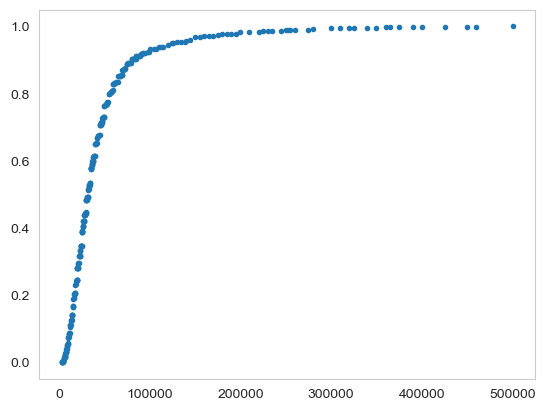

In [22]:
# ecdf plot
ecdf = df['Rent'].value_counts().sort_index().cumsum() / len(df['Rent'])
plt.plot(ecdf.index, ecdf, marker='.', linestyle='none')
plt.grid()

### **Insights from Rent per Square Foot Distribution**  

#### 1. **Right-Skewed Distribution**  
    
   - The histogram shows a **positively skewed (right-skewed) distribution**, indicating that **most properties have lower rent per square foot**, while a few have significantly higher values.  
   - This suggests the presence of **premium or luxury properties** driving the long tail.  

#### 2. **Most Common Rent per Sq. Ft. Range**  

   - The peak (mode) of the distribution is around **₹20-30 per sq. ft.**, meaning most rental listings fall within this range.  
   - There is a **gradual decline beyond ₹40 per sq. ft.**, with fewer properties in the high-rent segment.  

#### 3. **Outliers and High-Value Listings**  
    
   - Some properties have rent per sq. ft. exceeding **₹100**, which may indicate **luxury apartments or high-demand areas**.  
   - These extreme values suggest potential **outliers** or properties in **premium localities** that significantly differ from the majority.  

<Axes: ylabel='Count'>

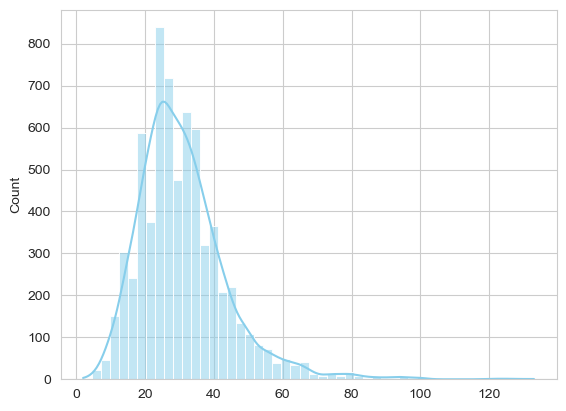

In [23]:
Rent_per_sqft = np.ceil(df['Rent'] / df['Area (sq.ft)'])
sns.histplot(Rent_per_sqft, bins=50, color='skyblue', kde=True)

### **Insights from Rent per Square Foot Boxplot**  

#### 1. **Median and Interquartile Range (IQR)**  

   - The median rent per square foot falls around **₹25-30 per sq. ft.**, which aligns with the peak observed in the histogram.  
   - The **IQR (middle 50% of the data) ranges between ₹15 and ₹40 per sq. ft.**, suggesting that most rental properties are priced within this range.  

#### 2. **Outliers in High-Value Rentals**  
    
   - Several **outliers are visible above ₹60 per sq. ft., with extreme values exceeding ₹100**.  
   - These could represent **luxury properties or listings in prime locations**.  
   - Some of the highest values exceed **₹120 per sq. ft.**, indicating **premium or possibly anomalous data points** that may need further review.  

#### 3. **Skewness in Rent Pricing**  
       
   - The longer whisker on the upper side confirms **positive skewness**, indicating that while most properties have reasonable rents, a few listings drive up the maximum significantly.  

<Axes: >

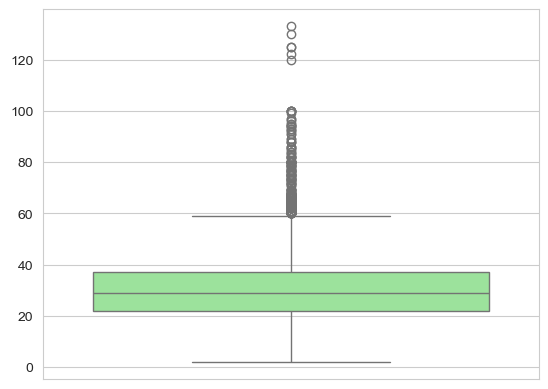

In [24]:
sns.boxplot(Rent_per_sqft, color='lightgreen')

### **Insights from Rent per Square Foot Categorization Across Regions**  

#### 1. **Regional Distribution of Rent Categories**  
    
   - **Bangalore North** has the highest number of **low-rent localities**, indicating affordability in this region.  
   - **Bangalore South dominates the high-rent category**, suggesting this region has a significant number of **higher-end localities**.  
   - **Bangalore Central has the most luxury localities**, aligning with expectations as central locations often have the most premium properties.  

#### 2. **Affordability vs. Premium Segments**  
    
   - **Luxury rentals are concentrated in Bangalore Central, East, and a few in South and West**.  
   - **Bangalore West has a balanced distribution**, with localities spread across all categories but fewer in the high and very high segments.  

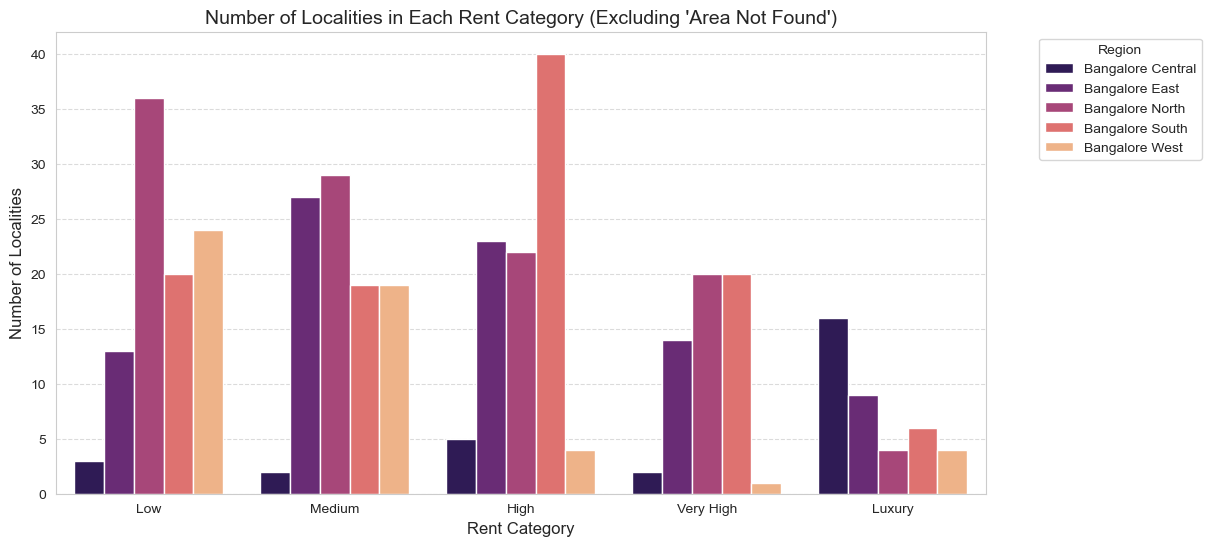

                Region               Locality  Rent_per_sqft Category
0    Bangalore Central    Ashok Nagar Central      53.687610   Luxury
1    Bangalore Central    Avenue Road Central      15.327778      Low
2    Bangalore Central    Benson Town Central      27.106355     High
3    Bangalore Central   Brigade Road Central      41.000000   Luxury
4    Bangalore Central     Cooke Town Central      43.312080   Luxury
..                 ...                    ...            ...      ...
377     Bangalore West       Tunganagara West      10.000000      Low
378     Bangalore West             Ullal West      17.729552      Low
379     Bangalore West  Vidyamanya Nagar West      14.076923      Low
380     Bangalore West      Vijaya Nagar West      22.577530   Medium
381     Bangalore West      Yeshwanthpur West      28.714888     High

[382 rows x 4 columns]


In [25]:
def rent_per_sqft_locality_percentile(df):

    df = df[df['Locality'].str.split(' ').apply(lambda x : ' '.join(x[:-1])) != 'Area Not Found'].copy()

    df['Rent_per_sqft'] = df['Rent'] / df['Area (sq.ft)']

    locality_avg = df.groupby(['Region', 'Locality'])['Rent_per_sqft'].mean().reset_index()

    locality_avg['Category'] = pd.qcut(locality_avg['Rent_per_sqft'], 
                                       q=[0, 0.25, 0.50, 0.75, 0.90, 1], 
                                       labels=['Low', 'Medium', 'High', 'Very High', 'Luxury'])

    category_counts = locality_avg.groupby(['Region', 'Category'])['Locality'].nunique().reset_index()

    plt.figure(figsize=(12, 6))
    ax = sns.barplot(x='Category', y='Locality', hue='Region', data=category_counts, palette='magma')

    plt.xlabel("Rent Category", fontsize=12)
    plt.ylabel("Number of Localities", fontsize=12)
    plt.title("Number of Localities in Each Rent Category (Excluding 'Area Not Found')", fontsize=14)
    plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.show()

    return locality_avg

locality_percentiles_df = rent_per_sqft_locality_percentile(df)
print(locality_percentiles_df)

# Bivariate Analysis

In [26]:
df['Rent_per_sqft']= np.ceil(df['Rent'] / df['Area (sq.ft)'])

### Insights from Bar Plot: Average & Median Rent by House Type

#### 1. **Serviced Apartments**:

   - These have the highest average (₹69,000) and median rents (₹60,000), indicating a premium market segment, likely due to additional amenities and services.

#### 2. **Apartments**:

   - Apartments also command relatively high rents, with an average of ₹52,000 and a median of ₹40,000.
   - The gap between mean and median suggests the presence of some high-rent outliers.

#### 3. **House/Villa**:

   - These have an average rent of ₹41,000 but a much lower median of ₹20,000, indicating significant variability in pricing, possibly based on location, size, or luxury factors.

#### 4. **Builder Floor**:
       
   - More affordable compared to the above categories, with an average rent of ₹25,000 and a median of ₹20,000.
   - The closer mean and median values suggest a more consistent pricing pattern.

#### 5. **Studios**:
       
   - Studios are the most affordable, with an average rent of ₹13,000 and a median of ₹10,000.
   - The minimal gap between mean and median reflects less pricing variability.

### **Key Observations**:
       
   - **Luxury vs. Budget**: Serviced apartments clearly target high-end tenants, while studios and builder floors cater to budget-conscious renters.
   - **Price Variability**: House/Villa types show the largest gap between mean and median, indicating diverse pricing structures.

<Figure size 1200x600 with 0 Axes>

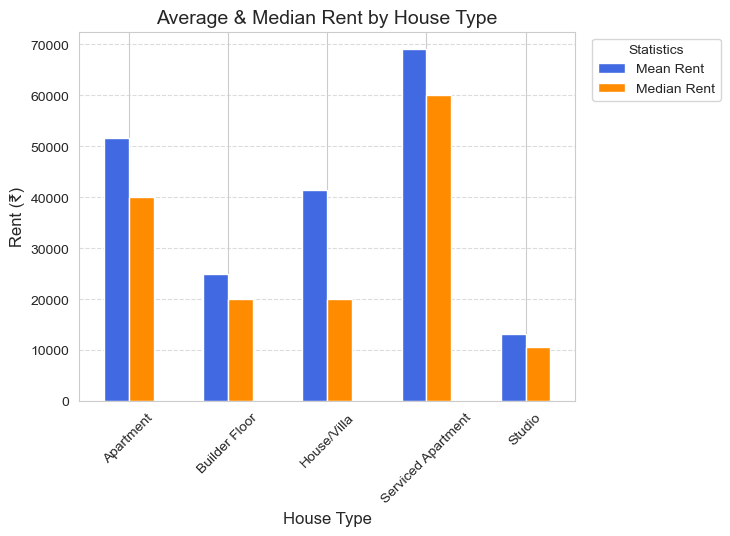

In [27]:
def house_type_rent_barplot(df):

    plt.figure(figsize=(12, 6))
    
    rent_stats = df.groupby('Type')['Rent'].agg(['mean', 'median']).round(0)
    rent_stats.plot(kind='bar', color=['royalblue', 'darkorange'])
    
    plt.xlabel("House Type", fontsize=12)
    plt.ylabel("Rent (₹)", fontsize=12)
    plt.title("Average & Median Rent by House Type", fontsize=14)
    plt.xticks(rotation=45)
    plt.legend(["Mean Rent", "Median Rent"], title="Statistics", bbox_to_anchor=(1.02, 1), loc='upper left')
    
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

house_type_rent_barplot(df)

### Insights from Box Plot: Rent Distribution by House Type

#### 1. **Wide Range in Rent Prices**:

   - **House/Villa** and **Apartments** exhibit the widest rent ranges with extreme upper outliers reaching ₹500,000.
   - Both categories have a broad interquartile range (IQR), suggesting significant variability in rent due to factors like location, size, or luxury features.

#### 2. **Serviced Apartments**:
    
   - These show a narrower spread compared to Houses/Villas and Apartments but still include high rent values.
   - The median rent is higher, aligning with their premium positioning in the market.

#### 3. **Builder Floors**:

   - Display moderate variability, with most rents concentrated below ₹50,000.
   - However, a few outliers reach up to ₹250,000, indicating some luxury properties in this segment.

#### 4. **Studios**:

   - Have the most compact distribution, reflecting a consistent and affordable pricing structure.
   - Although there are some high-rent outliers, most rents fall below ₹20,000.

#### 5. **Outliers**:

   - All categories have notable outliers, especially in Houses/Villas and Apartments, which skew the mean upwards.
   - The presence of these outliers suggests that median rent is a better measure of central tendency for comparison.

#### 6. **Comparative Affordability**:
                                                                                                     
   - Studios and Builder Floors offer the most budget-friendly options.
   - Serviced Apartments, while expensive, show more consistent rent prices, unlike the highly variable House/Villa and Apartment categories.

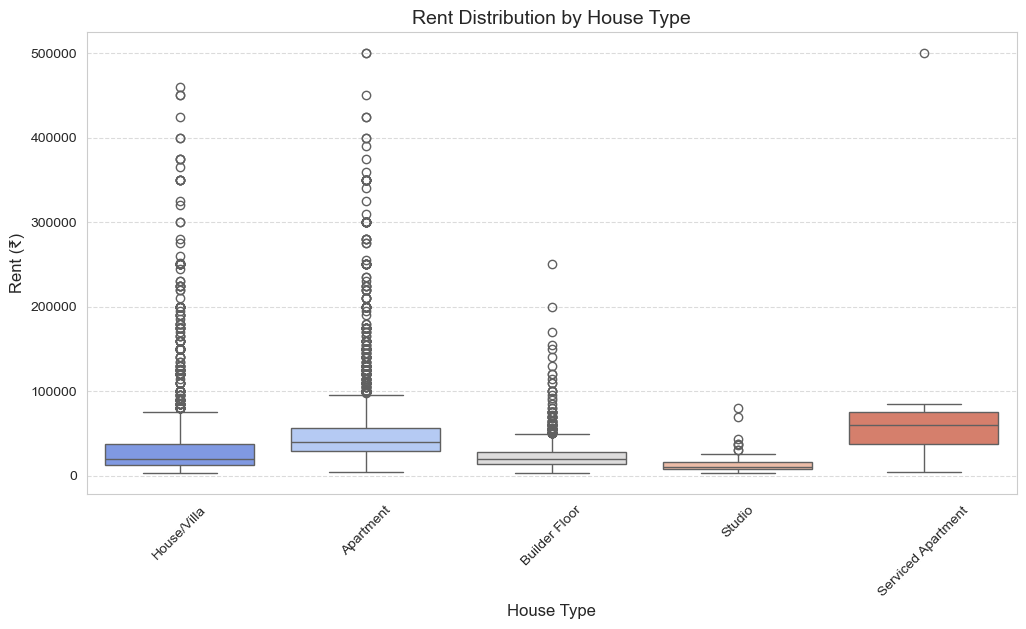

In [28]:
def house_type_rent_boxplot(df):
    
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Type', y='Rent', data=df, palette='coolwarm')
    
    plt.xlabel("House Type", fontsize=12)
    plt.ylabel("Rent (₹)", fontsize=12)
    plt.title("Rent Distribution by House Type", fontsize=14)
    plt.xticks(rotation=45)
    
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

house_type_rent_boxplot(df)

### Insights from Violin Plot: Rent Distribution by House Type

#### 1. **Density of Rent Prices**:
   - **House/Villa** and **Apartment** show high density in the ₹20,000–₹50,000 range but also include extreme outliers extending beyond ₹500,000.
   - **Serviced Apartments** have a wider rent distribution, with dense clusters around ₹50,000–₹100,000, confirming their premium nature.

#### 2. **Comparison of Median and Distribution**:
   - The **median rent** (indicated by the white dot) for **Serviced Apartments** is significantly higher compared to other types.
   - **Studios** show the narrowest distribution with rents concentrated around ₹10,000–₹20,000, indicating affordability and consistency.

#### 3. **Asymmetrical Distributions**:
   - The plots for **Builder Floors** and **Serviced Apartments** are slightly skewed, suggesting the presence of higher-end properties pushing the upper rent boundary.
   - **House/Villa** and **Apartment** distributions are more symmetrical but elongated due to a few high-value listings.

#### 4. **Presence of Outliers**:
   - All house types, especially **House/Villa** and **Serviced Apartments**, have significant outliers, likely representing luxury properties.

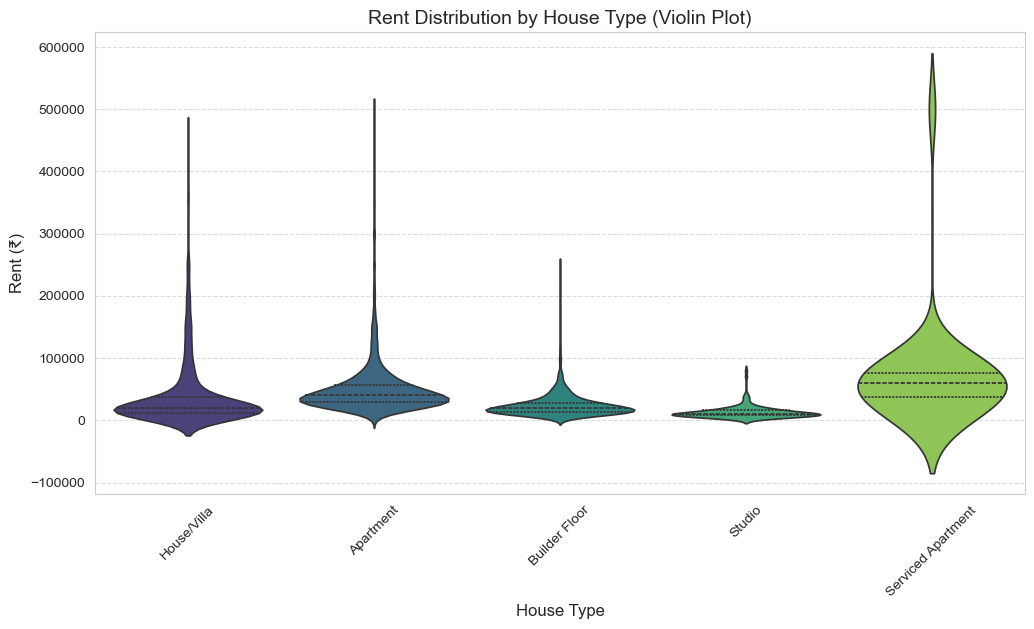

In [29]:
def house_type_rent_violinplot(df):

    plt.figure(figsize=(12, 6))
    sns.violinplot(x='Type', y='Rent', data=df, palette='viridis', inner='quartile')

    plt.xlabel("House Type", fontsize=12)
    plt.ylabel("Rent (₹)", fontsize=12)
    plt.title("Rent Distribution by House Type (Violin Plot)", fontsize=14)
    plt.xticks(rotation=45)
    
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

house_type_rent_violinplot(df)

### **Insights from Rental House Percentage by Locality and Region**

#### 1. **Overall Trends:**
   - Whitefield (Bangalore East) has the **highest percentage of rental houses at 16.7%**, making it a dominant rental hub.
   - Pulikeshi Nagar (Bangalore Central) follows with **15.0%**, indicating a strong demand for rental properties in the central region.
   - Hebbal (Bangalore North) and Electronic City (Bangalore South) are also major rental areas with **13.5% and 13.4%** respectively.

#### 2. **Regional Insights:**
   - **Bangalore Central**: High rental concentration in Pulikeshi Nagar, Cooke Town, and MG Road.
   - **Bangalore East**: Whitefield dominates, followed by Sarjapur Road and KR Puram.
   - **Bangalore North**: Hebbal, Thanisandra, and Yelahanka show strong rental demand.
   - **Bangalore South**: Electronic City and Kanakapura Road have high rental percentages.
   - **Bangalore West**: Raja Rajeshwari Nagar and Hosur Road lead in rental housing.

#### 3. **Key Takeaways:**
   - **Tech Hubs Drive Rentals:** Whitefield, Electronic City, and Hebbal (major IT hubs) have a **high concentration of rental houses**, suggesting proximity to employment centers as a major factor.
   - **Central Localities Remain Popular:** Pulikeshi Nagar and MG Road continue to attract renters, likely due to their **connectivity and commercial presence**.
   - **Suburban Growth in Rentals:** Places like **Devanahalli, Bagaluru, and Tumkur Road** indicate growing rental markets, possibly due to expanding city boundaries and infrastructure projects.

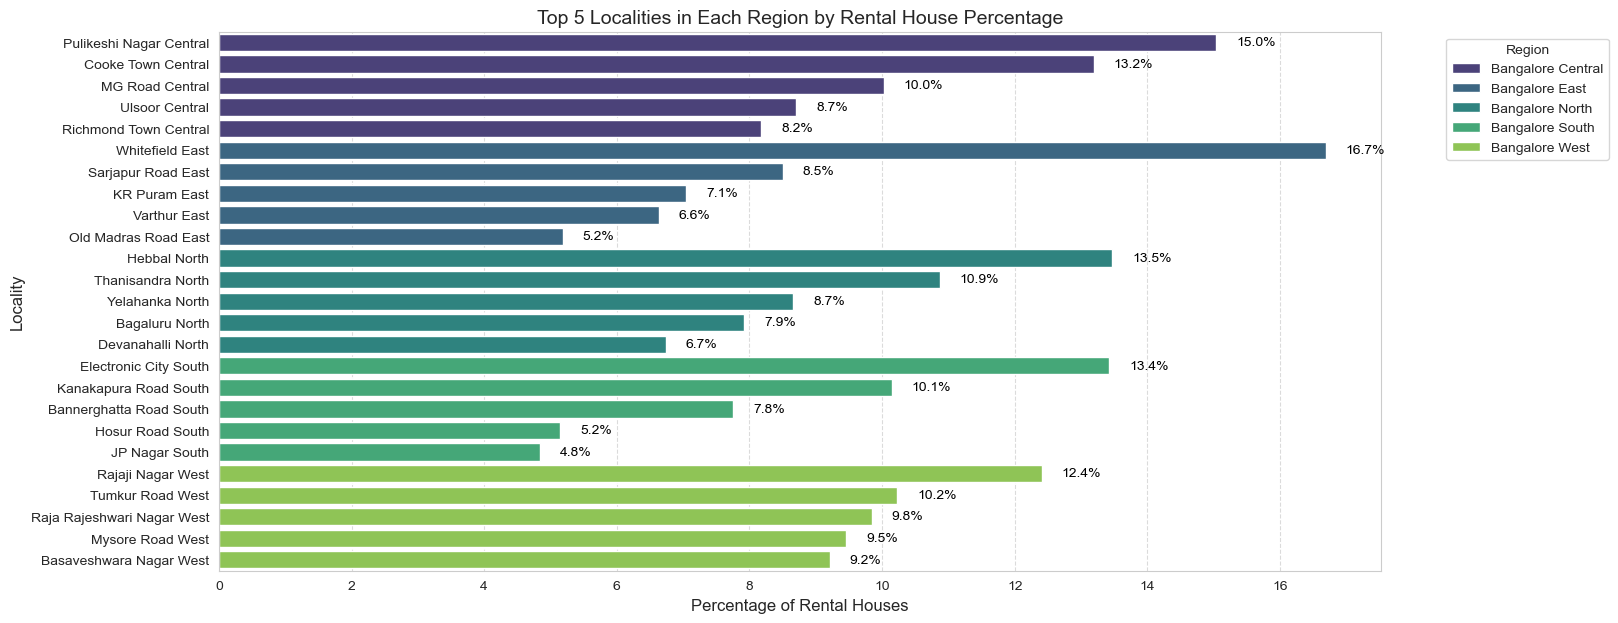

In [30]:
def top_localities_barplot(df):

    locality_counts = df.groupby(['Region', 'Locality']).size().reset_index(name='Rental_Count')

    region_totals = locality_counts.groupby('Region')['Rental_Count'].sum().reset_index()
    merged_df = locality_counts.merge(region_totals, on='Region', suffixes=('', '_Total'))
    merged_df['Percentage'] = (merged_df['Rental_Count'] / merged_df['Rental_Count_Total']) * 100

    top_localities = merged_df.groupby('Region').apply(lambda x: x.nlargest(5, 'Percentage')).reset_index(drop=True)

    plt.figure(figsize=(15, 7))
    ax = sns.barplot(x='Percentage', y='Locality', hue='Region', data=top_localities, palette='viridis')

    for p in ax.patches:
        width = p.get_width()
        if width > 0.5:
            plt.text(width + 0.3,
                     p.get_y() + p.get_height() / 2,
                     f'{width:.1f}%',
                     ha='left', va='center', fontsize=10, color='black')

    plt.xlabel("Percentage of Rental Houses", fontsize=12)
    plt.ylabel("Locality", fontsize=12)
    plt.title("Top 5 Localities in Each Region by Rental House Percentage", fontsize=14)
    plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(axis='x', linestyle='--', alpha=0.7)

    plt.show()

top_localities_barplot(df)

### **Insights from Average Rent by Locality and Region**

#### 1. **High-Rent Localities:**
    
   - **Chikkaballapur (Bangalore North) has the highest average rent at ₹400,000**, indicating a niche rental market, possibly for commercial or high-end residential properties.
   - **Race Course Road (Bangalore North) follows at ₹220,875**, another premium rental zone.
   - **Majestic (Bangalore Central) commands ₹200,000**, showing its importance as a prime rental location.

#### 2. **Regional Highlights:**
    
   - **Bangalore Central:** Majestic (₹200,000) and Richmond Road (₹128,000) lead in rental prices.
   - **Bangalore East:** Bellandur (₹73,007) and Kannamangala (₹70,000) have the highest average rents.
   - **Bangalore North:** Chikkaballapur (₹400,000) and Race Course Road (₹220,875) dominate the market.
   - **Bangalore South:** Bellandur (₹84,416) is the costliest, with ITI Layout-HSR Layout (₹59,785) and Koramangala (₹58,810) following closely.
   - **Bangalore West:** Sadashiva Nagar (₹187,500) and Rajaji Nagar (₹86,376) lead rental rates.

#### 3. **Key Observations:**
       
   - **Bangalore North has the most expensive rentals**, likely due to large commercial spaces or premium residential properties.
   - **Majestic and Richmond Road in Bangalore Central remain prime rental areas.**
   - **Bellandur appears in both East and South regions as a high-rent locality**, confirming its popularity.
   - **Koramangala and HSR Layout maintain strong rental values,** reinforcing their demand among tenants.
   - **Rajaji Nagar in Bangalore West is also a strong rental market,** second to Sadashiva Nagar.

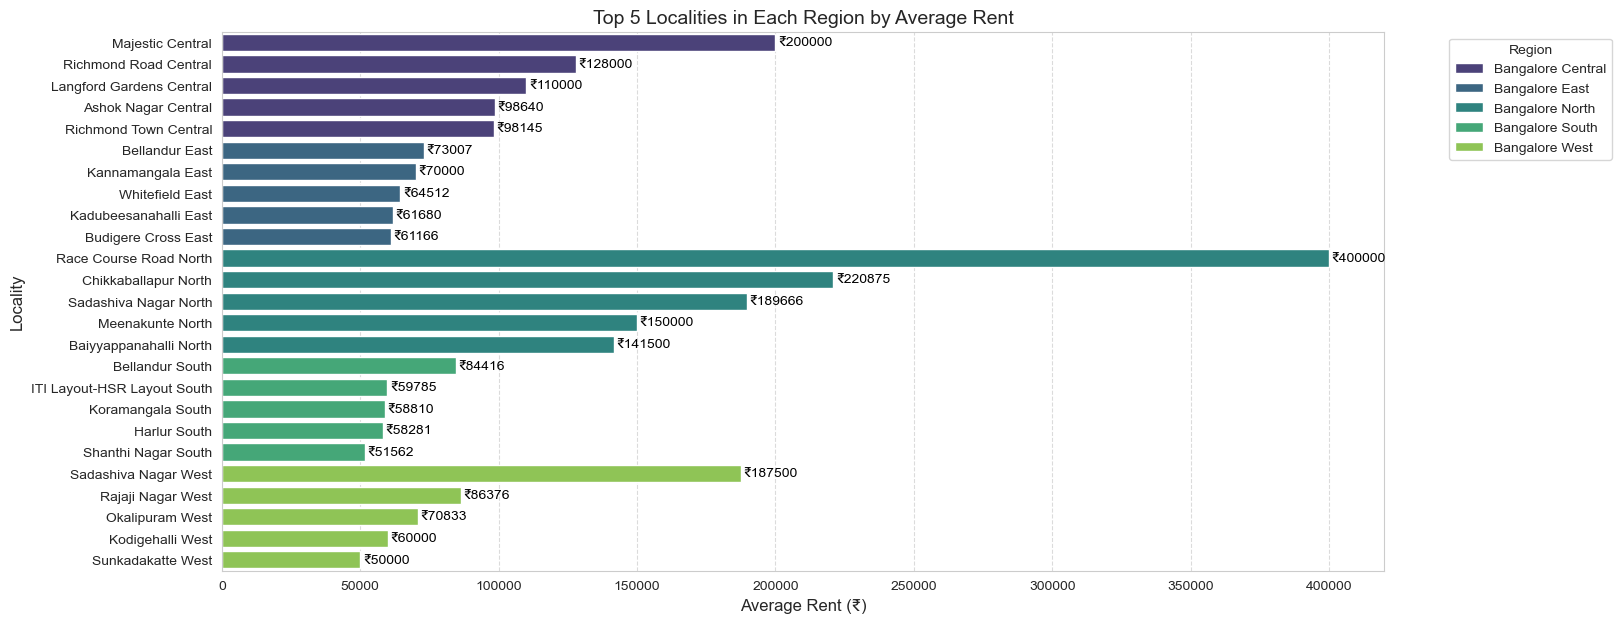

In [31]:
def top_localities_by_avg_rent(df):
    
    locality_avg_rent = df.groupby(['Region', 'Locality'])['Rent'].mean().reset_index()
    
    top_localities = locality_avg_rent.groupby('Region').apply(lambda x: x.nlargest(5, 'Rent')).reset_index(drop=True)

    plt.figure(figsize=(15, 7))
    ax = sns.barplot(x='Rent', y='Locality', hue='Region', data=top_localities, palette='viridis')

    for p in ax.patches:
        width = p.get_width()
        if width > 0:
            plt.text(width + 1000,
                     p.get_y() + p.get_height() / 2,
                     f'₹{int(width)}',
                     ha='left', va='center', fontsize=10, color='black')

    plt.xlabel("Average Rent (₹)", fontsize=12)
    plt.ylabel("Locality", fontsize=12)
    plt.title("Top 5 Localities in Each Region by Average Rent", fontsize=14)
    plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(axis='x', linestyle='--', alpha=0.7)

    plt.show()

top_localities_by_avg_rent(df)

In [32]:
def top_localities_by_avg_rent(df, house_type):

    filtered_df = df[df['Type'] == house_type]

    locality_avg_rent = filtered_df.groupby(['Region', 'Locality'])['Rent'].mean().reset_index()

    top_localities = locality_avg_rent.groupby('Region').apply(lambda x: x.nlargest(5, 'Rent')).reset_index(drop=True)

    plt.figure(figsize=(15, 7))
    ax = sns.barplot(x='Rent', y='Locality', hue='Region', data=top_localities, palette='viridis')

    for p in ax.patches:
        width = p.get_width()
        if width > 0:
            plt.text(width + 1000,
                     p.get_y() + p.get_height() / 2,
                     f'₹ {int(width):,}',  # Add thousand separator
                     ha='left', va='center', fontsize=10, color='black')

    plt.xlabel("Average Rent (₹)", fontsize=12)
    plt.ylabel("Locality", fontsize=12)
    plt.title(f"Top 5 Localities in Each Region by Average Rent ({house_type})", fontsize=14)
    plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(axis='x', linestyle='--', alpha=0.7)

    plt.show()

### **Insights from Average Rent by Locality and Region (Apartments)**

#### 1. **Most Expensive Apartment Rentals:**
    
   - **Chikkaballapur (Bangalore North) remains the most expensive at ₹400,000.**
   - **Race Course Road (Bangalore North) follows at ₹234,500**, indicating a high-end rental market.
   - **Richmond Road (Bangalore Central) has the highest rent in its region at ₹203,333**, slightly above Majestic (₹200,000).

#### 2. **Regional Breakdown:**
       
   - **Bangalore Central:**
     - Richmond Road (₹203,333) and Majestic (₹200,000) have the highest rental prices.
     - Other premium localities include Millers Road (₹142,500) and Vasanth Nagar (₹138,416).
   - **Bangalore East:**
     - Indira Nagar (₹74,350) tops the list, followed by Kannamangala (₹70,000) and Kadubeesanahalli (₹63,921).
   - **Bangalore North:**
     - Chikkaballapur (₹400,000) and Race Course Road (₹234,500) dominate.
     - Other costly areas include Sadashiva Nagar (₹182,000) and Baiyyappanahalli (₹149,476).
   - **Bangalore South:**
     - Bellandur (₹80,300) and Koramangala (₹77,502) have the highest apartment rents.
     - ITI Layout-HSR Layout (₹65,000) and Outer Ring Road (₹62,200) also show high demand.
   - **Bangalore West:**
     - Rajaji Nagar (₹142,156) leads rental prices.
     - Okalipuram (₹70,833) and Magadi Road (₹61,400) follow closely.

#### 3. **Key Differences from Overall Rental Data:**

   - **Chikkaballapur (₹400,000) and Race Course Road (₹234,500) have slightly higher apartment rents than the overall rental data, suggesting luxury or high-demand properties.**
   - **Richmond Road (₹203,333) has overtaken Majestic in Bangalore Central, showing a premium shift in the apartment market.**
   - **Indira Nagar has replaced Bellandur as the highest-priced apartment rental in Bangalore East, indicating strong demand for premium living spaces.**

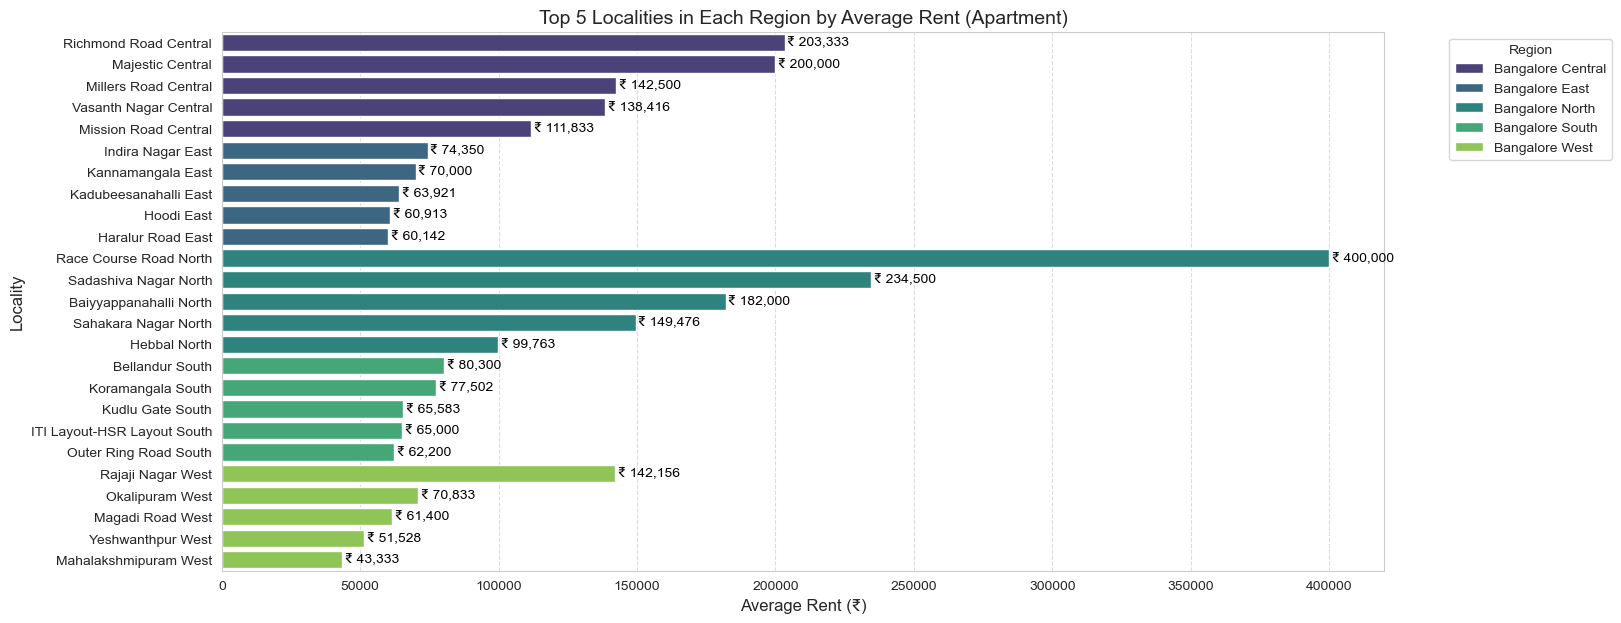

In [33]:
top_localities_by_avg_rent(df, "Apartment")

### **Insights from Average Rent by Locality and Region (House/Villa)**

#### 1. **Most Expensive House/Villa Rentals:**
    
   - **Chikkaballapur (Bangalore North) is the highest at ₹290,000, making it a premium locality for houses/villas.**
   - **Bellandur (Bangalore East) follows closely at ₹267,600, indicating strong demand for spacious housing.**
   - **Sadashiva Nagar (Bangalore West) stands out at ₹187,500, significantly higher than other areas in the same region.**

#### 2. **Regional Breakdown:**
    
   - **Bangalore Central:**
     - Richmond Town (₹160,000) has the highest house rental.
     - Cunningham Road (₹76,000) follows, while Ashok Nagar and Mission Road stand at ₹50,000.
   - **Bangalore East:**
     - Bellandur (₹267,600) and Whitefield (₹100,160) are top choices for house rentals.
     - Basavanagar (₹100,000) and Outer Ring Road (₹84,433) also have strong rental values.
   - **Bangalore North:**
     - Chikkaballapur (₹290,000) is the costliest.
     - Essel Gardens (₹225,000) and Devanahalli (₹160,666) also see high rental values.
   - **Bangalore South:**
     - Bellandur (₹150,000) and Chikkakannalli (₹120,000) top the region.
     - Halanayakanahalli (₹95,000) and Koramangala (₹55,186) also see demand.
   - **Bangalore West:**
     - Sadashiva Nagar (₹187,500) dominates as the most expensive house rental locality.
     - Sunkadakatte (₹50,000) and Mallathahalli (₹33,000) follow.

#### 3. **Key Differences from Apartment Rental Data:**

   - **Chikkaballapur (₹290,000) is still a high-rental area but is lower than its apartment rental price (₹400,000).**
   - **Bellandur (₹267,600) in Bangalore East is significantly higher than its apartment rental price (₹80,300).**
   - **Sadashiva Nagar (₹187,500) is one of the few areas where house rents exceed apartment rents, suggesting a preference for independent homes in the region.**
   - **Richmond Town (₹160,000) has lower house rents than its apartment counterpart (₹203,333), possibly due to the type of houses available.**

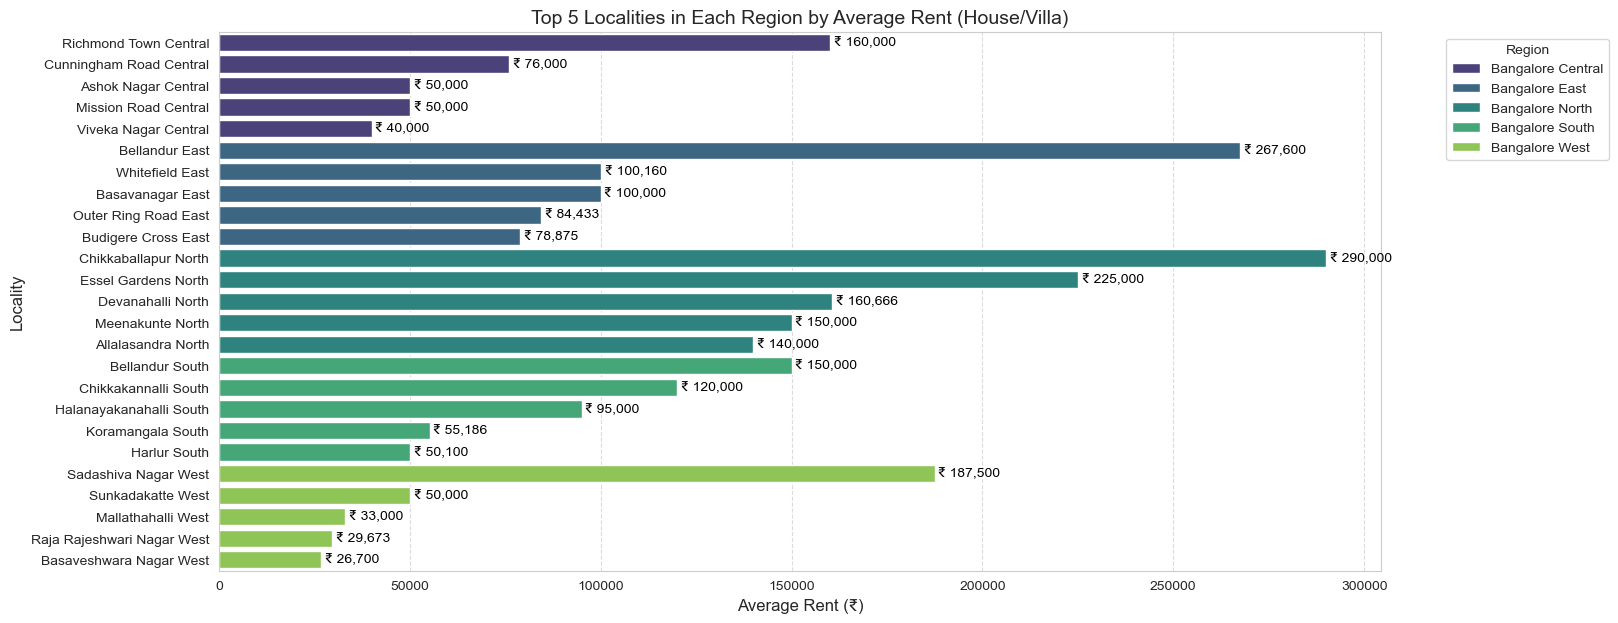

In [34]:
top_localities_by_avg_rent(df, "House/Villa")

### **Insights from Average Rent by Locality and Region (Builder Floor)**

#### 1. **Most Expensive Builder Floor Rentals:**
    
   - **Richmond Town (Bangalore Central) has the highest builder floor rental at ₹155,000, making it a premium locality.**
   - **Sadashiva Nagar (Bangalore North) follows at ₹100,000, which aligns with its high rental values across property types.**
   - **Kadubeesanahalli (Bangalore East) at ₹70,000 is the costliest in its region, showing demand in tech-driven areas.**

#### 2. **Regional Breakdown:**
       
   - **Bangalore Central:**
     - Richmond Town (₹155,000) leads, followed by Ulsoor (₹86,200).
     - Infantry Road (₹75,000) and Cooke Town (₹51,857) also see strong builder floor demand.
   - **Bangalore East:**
     - Kadubeesanahalli (₹70,000) has the highest builder floor rent.
     - Panathur (₹47,500) and Hoodi (₹43,000) are emerging rental hubs.
   - **Bangalore North:**
     - Sadashiva Nagar (₹100,000) remains the most premium area.
     - Suggatta (₹50,000) and New BEL Road (₹45,500) follow.
   - **Bangalore South:**
     - ITI Layout-HSR Layout (₹62,571) and Harlur (₹61,166) show high demand.
     - Bellandur (₹60,000) maintains its premium rental status.
   - **Bangalore West:**
     - Kodigehalli (₹60,000) and Mahalaxhmipuram (₹32,388) top the list.
     - Rajaji Nagar (₹27,928) has the lowest rental among top regions.

#### 3. **Comparison with Other Property Types:**
       
   - **Richmond Town (₹155,000) has lower builder floor rents compared to apartments (₹203,333), but is comparable to house rents (₹160,000).**
   - **Sadashiva Nagar (₹100,000) is significantly lower than house rents (₹187,500), indicating independent houses are more sought-after here.**
   - **Bellandur (₹60,000) shows builder floors are much cheaper than houses (₹267,600), making it a viable option for mid-range renters.**

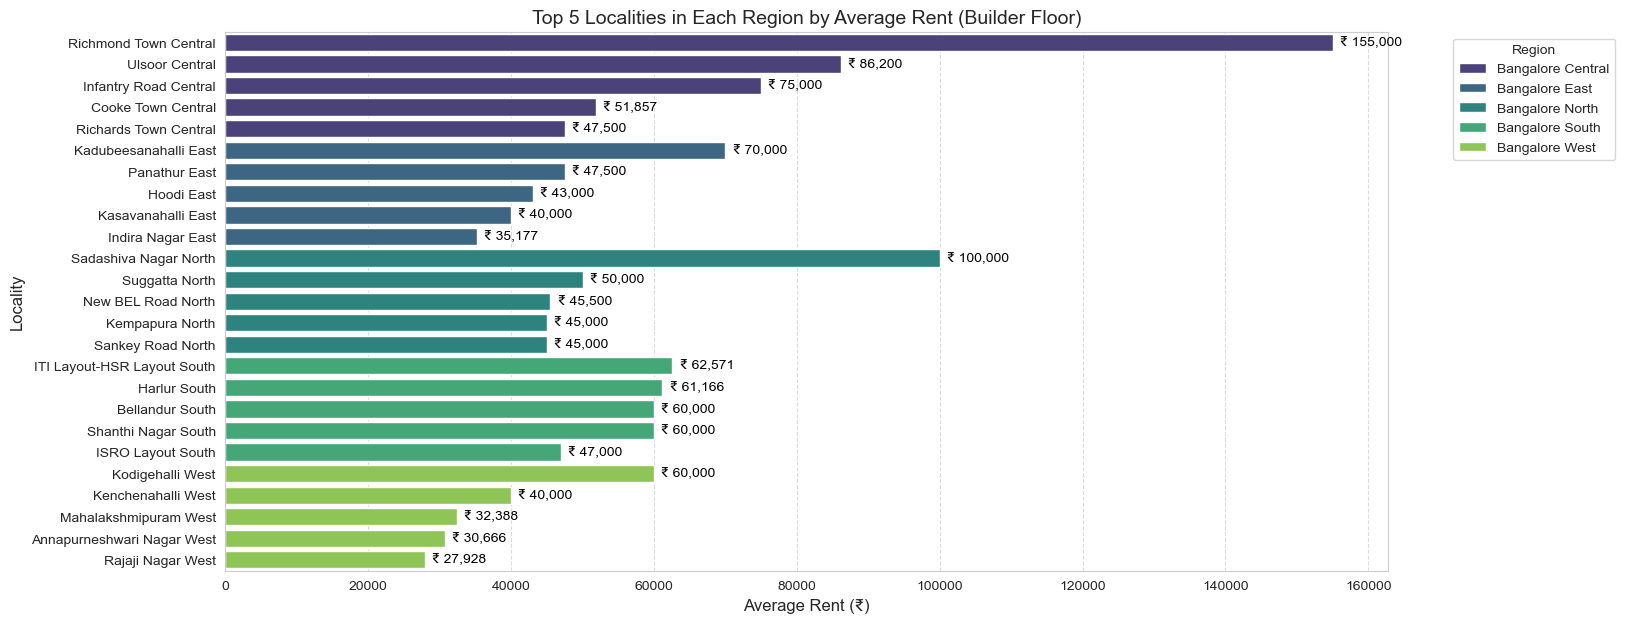

In [35]:
top_localities_by_avg_rent(df, "Builder Floor")

### **Insights from the Impact of Features on Rent**  

#### **1. Impact of Bedrooms on Rent**  

- As the **number of bedrooms increases**, the **median rent also increases**.  
- Properties with **5-6 bedrooms** show **significantly higher rent** with a wider range of variability.  
- The presence of **outliers** suggests that some **luxury properties** have exceptionally high rents.  

#### **2. Impact of Bathrooms on Rent** 

- The trend is **similar to bedrooms**—more bathrooms generally **correlate with higher rent**.  
- Properties with **4+ bathrooms** show a **sharp increase** in rental prices, indicating that **luxury or premium properties** typically have more bathrooms.  
- There are **many outliers**, especially in the **3+ bathroom** category, suggesting that some high-end properties inflate the rental value.  

#### **3. Impact of Balcony on Rent**  

- More balconies generally **correlate with higher rents**, but the effect is **less pronounced** than bedrooms/bathrooms.  
- Properties with **3-4 balconies** show **higher median rent**, likely due to better views and larger living spaces.  
- A few outliers suggest that some **high-end apartments with multiple balconies** are significantly more expensive.  

#### **4. Impact of Additional Rooms on Rent**  

- Additional rooms (study, servant quarters, etc.) also contribute to **higher rent values**.  
- However, the effect seems **less linear** compared to bedrooms and bathrooms.  
- Properties with **3-4 additional rooms** tend to be **luxury homes**, leading to higher rental values.  

### **Key Takeaways**  

- **Luxury properties (5+ bedrooms, 4+ bathrooms, multiple balconies) demand significantly higher rents.**  
- **Bedrooms and bathrooms have a stronger impact on rent than balconies or additional rooms.**  
- **Outliers indicate premium properties that may cater to niche renters looking for luxury living.**  

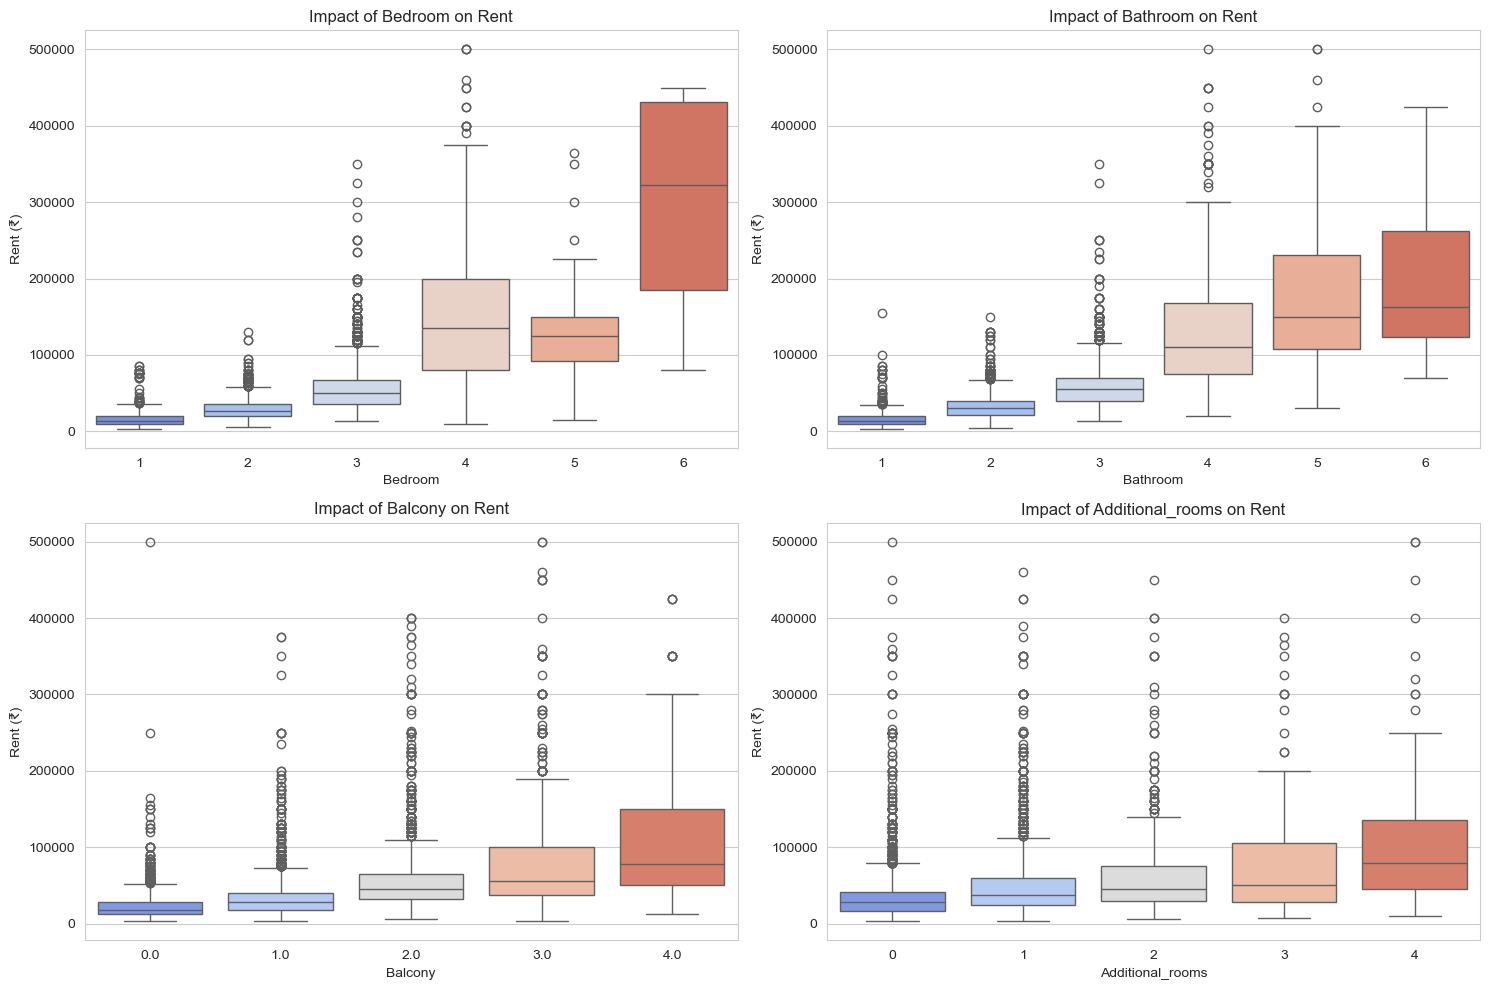

In [36]:
def boxplot_analysis(df):
    
    features = ['Bedroom', 'Bathroom', 'Balcony', 'Additional_rooms']
    
    plt.figure(figsize=(15, 10))
    
    for i, feature in enumerate(features, 1):
        plt.subplot(2, 2, i)
        sns.boxplot(x=df[feature], y=df['Rent'], palette='coolwarm')
        plt.xlabel(feature)
        plt.ylabel("Rent (₹)")
        plt.title(f"Impact of {feature} on Rent")
    
    plt.tight_layout()
    plt.show()

boxplot_analysis(df)

### **Regression Analysis: Impact of Features on Rent**  

#### **1. Bedroom vs. Rent**  

- The **positive slope** of the regression line indicates that **as the number of bedrooms increases, the rent also increases**.  
- The data shows a **wide spread**, suggesting that other factors (such as location and property type) also influence rent significantly.  
- High variance in **higher bedroom categories (4-6)** suggests that **luxury properties** impact rent more significantly.  

#### **2. Bathroom vs. Rent**  

- The trend is **similar to bedrooms**, with more bathrooms generally leading to **higher rent**.  
- The **correlation appears slightly stronger** compared to bedrooms, likely because **more bathrooms indicate premium housing**.  
- High-end properties with **4+ bathrooms** show **significantly higher rent values**, but the variance remains large.  

#### **3. Balcony vs. Rent**  

- The **relationship is weaker** compared to bedrooms and bathrooms.  
- While more balconies **slightly increase rent**, the impact is **not as strong**, suggesting that balconies alone are **not a major determinant** of rental pricing.  
- Outliers in **3-4 balconies category** suggest some **luxury apartments or penthouses** with premium pricing.  

#### **4. Additional Rooms vs. Rent**  

- Additional rooms (like study rooms, servant quarters, etc.) **positively impact rent**, but the effect is **not as strong as bedrooms or bathrooms**.  
- The **increase in rent is gradual**, meaning additional rooms **add value but do not drastically change rent** unless combined with other premium features.  
- Some high-rent properties with **3-4 additional rooms** suggest they belong to the **luxury category**.  

### **Key Takeaways**  
    
- **Bedrooms and bathrooms are the strongest predictors of rent.**  
- **Balconies and additional rooms have a weaker impact but still contribute to higher rent.**  
- **High variance suggests that region and property type also play a crucial role.**  

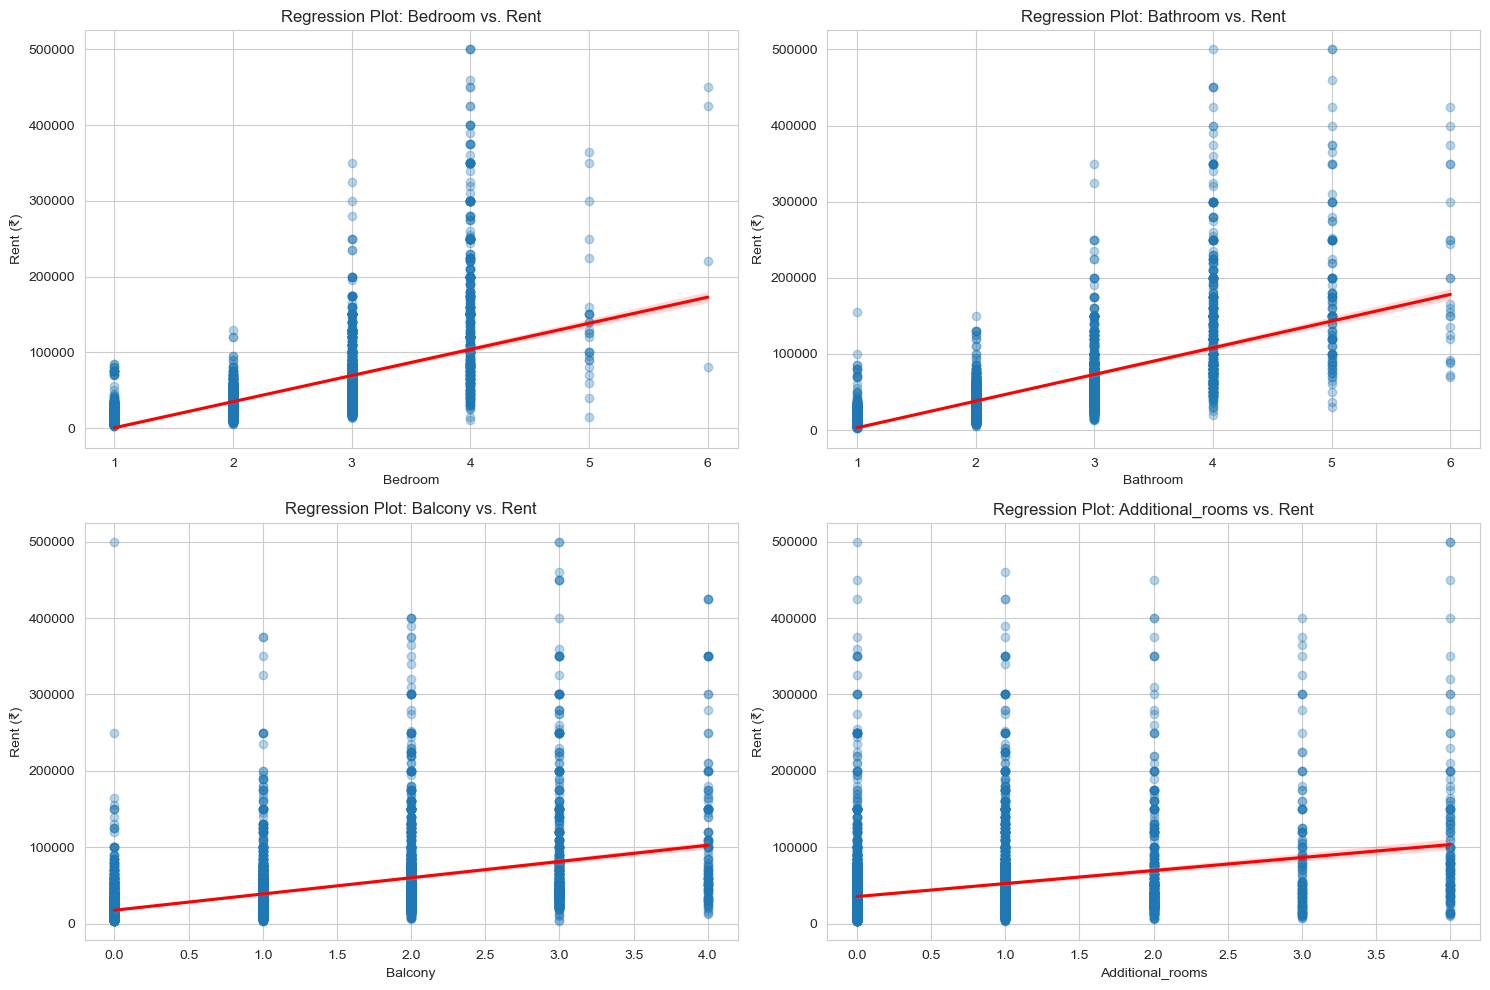

In [37]:
def regression_plot(df):
    
    features = ['Bedroom', 'Bathroom', 'Balcony', 'Additional_rooms']
    
    plt.figure(figsize=(15, 10))
    
    for i, feature in enumerate(features, 1):
        plt.subplot(2, 2, i)
        sns.regplot(x=df[feature], y=df['Rent'], scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
        plt.xlabel(feature)
        plt.ylabel("Rent (₹)")
        plt.title(f"Regression Plot: {feature} vs. Rent")
    
    plt.tight_layout()
    plt.show()

regression_plot(df)

### **Correlation Heatmap Insights**  

#### **1. Bedrooms & Bathrooms Have the Strongest Impact on Rent**  

- **Bathroom (0.69) and Bedroom (0.63) show the highest correlation with Rent.**  
- This confirms that **higher rent is strongly associated with larger living spaces that include more bedrooms and bathrooms**.  
- Bathrooms have a **slightly stronger impact** than bedrooms, likely because more bathrooms indicate **premium or luxury apartments**.  

#### **2. Balcony and Additional Rooms Have Weaker Correlation with Rent**
    
- **Balcony (0.43) and Additional Rooms (0.31) show a weaker correlation with rent.**  
- While balconies add value, their impact is **not as strong as primary living spaces** (bedrooms and bathrooms).  
- Additional rooms (like study rooms, servant rooms, etc.) have the **weakest correlation** with rent, suggesting they are **not a primary factor in pricing**.  

#### **3. High Correlation Between Bedrooms & Bathrooms (0.87)**  

- This suggests that **properties with more bedrooms tend to have more bathrooms**, reinforcing the idea that **larger homes naturally come with more amenities**.  
- This **multicollinearity** may need to be addressed in predictive models.  

#### **Key Takeaways:**  
    
- **Number of bathrooms is the strongest predictor of rent.**  
- **Bedrooms also strongly influence rent, but slightly less than bathrooms.**  
- **Balconies and additional rooms contribute, but their impact is much weaker.**  
- **Larger properties tend to have more bedrooms and bathrooms together, reinforcing premium pricing.**  

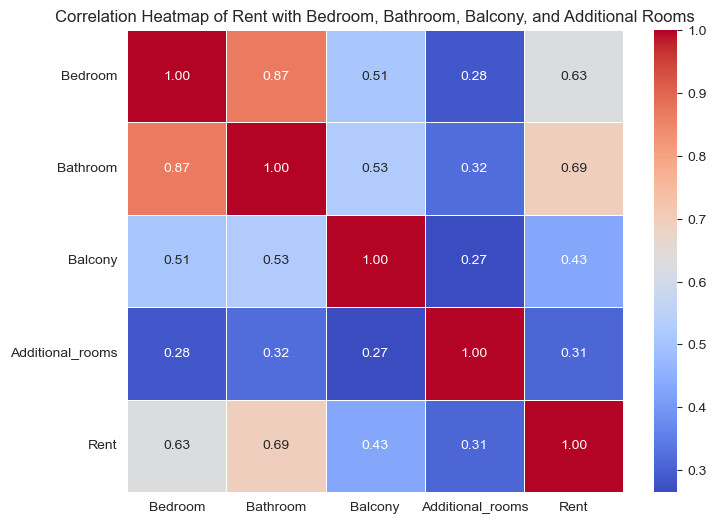

In [38]:
def correlation_heatmap(df):

    features = ['Bedroom', 'Bathroom', 'Balcony', 'Additional_rooms', 'Rent']
    corr_matrix = df[features].corr()

    plt.figure(figsize=(8, 6))
    ax = sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

    plt.xticks(rotation=0) 
    plt.yticks(rotation=0) 
    
    plt.title("Correlation Heatmap of Rent with Bedroom, Bathroom, Balcony, and Additional Rooms")
    plt.show()

correlation_heatmap(df)

### **Insights from Scatter Plot: Area (sq.ft) vs. Rent**  

#### **1. Strong Positive Correlation**  

- The scatter plot shows a **clear upward trend**, indicating a **strong positive correlation** between area (sq.ft) and rent.  
- As the area increases, rent **also increases significantly**.  

#### **2. Linearity with Some Deviations**  

- The red regression line suggests a **linear relationship** between area and rent.  
- However, there are **some scattered points above and below the line**, indicating **variations in rent for similar-sized properties**.  

#### **3. Presence of Outliers**  

- Some **extremely high-rent properties** (above ₹400,000) deviate from the trend.  
- These could be **luxury properties or premium locations** affecting pricing beyond just area.  

#### **4. Higher Density in the Lower Range**  

- Most properties are **below 3000 sq.ft**, showing a **high concentration of mid-sized properties**.  
- Beyond 5000 sq.ft, the number of listings **decreases**, but rent increases steeply.  

#### **Key Takeaways:**  

- **Area is one of the most significant factors in determining rent.**  
- **Rent increases almost proportionally with area, but variations exist due to other factors (e.g., location, amenities).**  
- **Luxury properties create outliers, indicating premium pricing beyond just size.**  

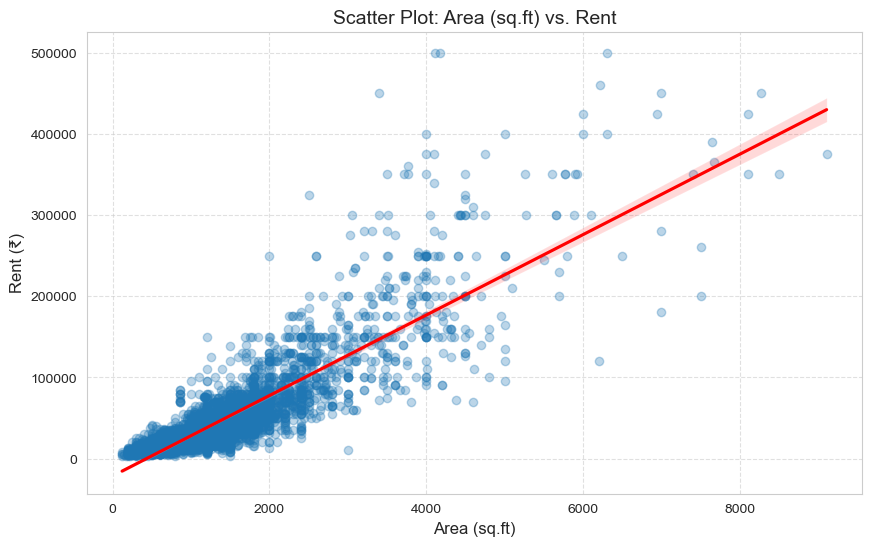

In [39]:
def scatter_area_vs_rent(df):

    plt.figure(figsize=(10, 6))
    sns.regplot(x=df['Area (sq.ft)'], y=df['Rent'], scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
    
    plt.xlabel("Area (sq.ft)", fontsize=12)
    plt.ylabel("Rent (₹)", fontsize=12)
    plt.title("Scatter Plot: Area (sq.ft) vs. Rent", fontsize=14)
    plt.grid(True, linestyle="--", alpha=0.6)
    
    plt.show()

scatter_area_vs_rent(df)

### **Insights from Log-Log Scatter Plot: Area (sq.ft) vs. Rent**  

#### **1. Linear Relationship in Log-Log Scale** 

- The scatter plot shows a **strong linear trend** between log-transformed area and log-transformed rent.  
- This suggests that **rent follows a power-law relationship with area**, meaning rent increases at a decreasing rate as area increases.  

#### **2. Smoother Trend with Reduced Heteroscedasticity**  

- Compared to the raw scatter plot, the log-log transformation **reduces variance** and makes the relationship more stable.  
- This is especially useful for modeling purposes as it helps in **reducing skewness and heteroscedasticity (uneven spread of data)**.  

#### **3. More Evenly Distributed Data**  

- The points appear **more uniformly spread** along the regression line, indicating **better model fit**.  
- This confirms that a **logarithmic transformation of rent and area improves the interpretability of the relationship**.  

#### **4. Consistent Positive Correlation**  
    
- The **strong positive correlation** remains, meaning **larger properties still command higher rents**, but in a **diminishing returns fashion** (i.e., rent does not double when area doubles).  

#### **Key Takeaways:**  
    
- **Rent and area follow a power-law relationship rather than a simple linear trend.**  
- **Log transformation helps normalize data, making it easier to model.**  
- **Larger properties still attract higher rents, but the rate of increase slows down with size.**  

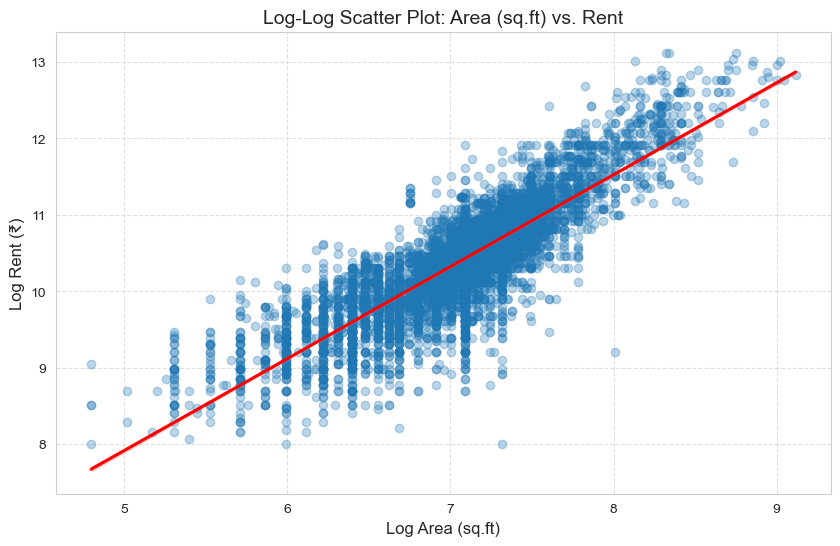

In [40]:
def log_scatter_area_vs_rent(df):

    plt.figure(figsize=(10, 6))
    sns.regplot(x=np.log1p(df['Area (sq.ft)']), y=np.log1p(df['Rent']), 
                scatter_kws={'alpha':0.3}, line_kws={'color':'red'})

    plt.xlabel("Log Area (sq.ft)", fontsize=12)
    plt.ylabel("Log Rent (₹)", fontsize=12)
    plt.title("Log-Log Scatter Plot: Area (sq.ft) vs. Rent", fontsize=14)
    plt.grid(True, linestyle="--", alpha=0.6)

    plt.show()

log_scatter_area_vs_rent(df)

### **Short Insight:**  

- **Strong Positive Correlation (0.86):** Area and rent are highly correlated, meaning **larger properties generally have higher rents**.  

In [41]:
corr = df[['Area (sq.ft)', 'Rent']].corr().iloc[0, 1]
print(f"Correlation between Area (sq.ft) and Rent: {corr:.2f}")

Correlation between Area (sq.ft) and Rent: 0.86


### **Insights from Rent Distribution Boxplots**  

#### 1. **Facing Direction:**  
    
   - North-West and South-West properties have **higher median rents**, suggesting a preference for these directions.  
   - Other directions show **similar rent distributions**, with "Not Specified" having lower variance.  

#### 2. **Furnishing Type:**  

   - **Furnished properties have higher rents** compared to semi-furnished and unfurnished ones.  
   - **Unfurnished properties have the lowest median rent.**  

#### 3. **Power Backup:**  

   - Properties with **full power backup** tend to have **higher median rents** than those with no or partial backup.  
   - **No backup properties** show lower rent variability.  

#### 4. **Pet-Friendly Policy:**  

   - **Pet-friendly properties show slightly higher median rents**, but overall distribution is similar for both categories.  
   - No major difference, indicating that pet policies may **not significantly influence rent prices.**  

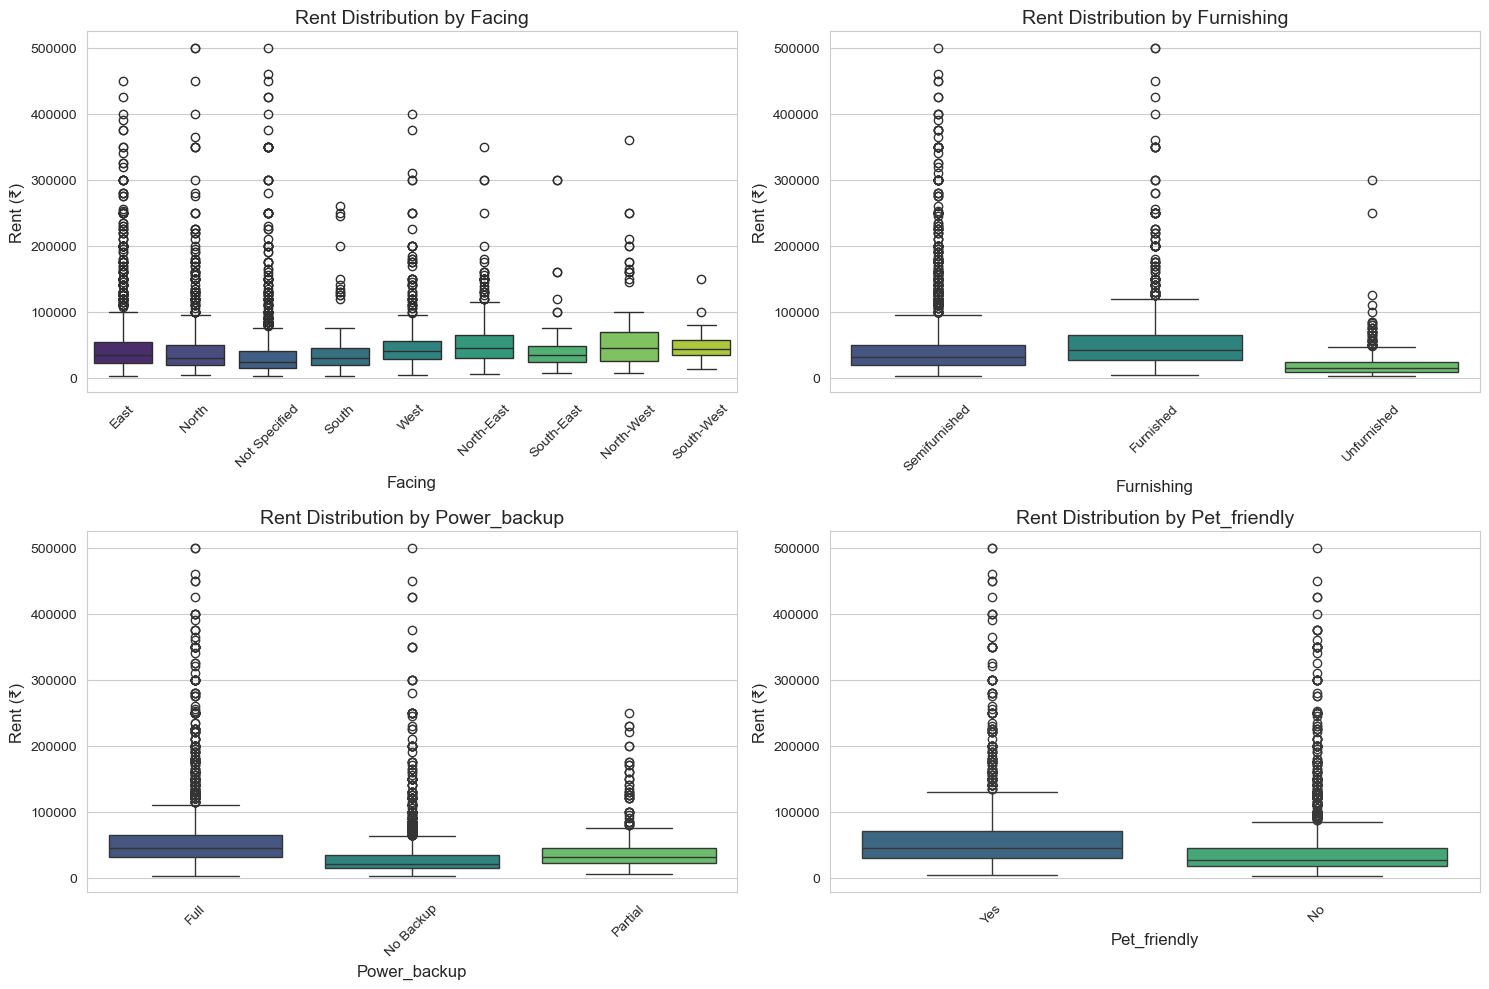

In [42]:
def categorical_boxplots(df):

    categorical_features = ['Facing', 'Furnishing', 'Power_backup', 'Pet_friendly']
    plt.figure(figsize=(15, 10))

    for i, feature in enumerate(categorical_features, 1):
        plt.subplot(2, 2, i)
        sns.boxplot(x=df[feature], y=df['Rent'], palette='viridis')
        plt.xticks(rotation=45)
        plt.xlabel(feature, fontsize=12)
        plt.ylabel("Rent (₹)", fontsize=12)
        plt.title(f"Rent Distribution by {feature}", fontsize=14)

    plt.tight_layout()
    plt.show()

categorical_boxplots(df)

### **Insights from Rent Density Violin Plots**  

#### 1. **Facing Direction:**  
    
   - **North-West and South-West** facing properties have slightly **higher rent density** at the upper end.  
   - Most directions show **similar rent distributions**, with **lower density for extreme high-rent properties.**  

#### 2. **Furnishing Type:**  
                                                                              
   - **Furnished properties** have a wider spread and **higher rent density at the upper range**, confirming their higher rent potential.  
   - **Unfurnished properties** have the **lowest rent distribution** with less variation.  

#### 3. **Power Backup:** 
                                                                              
   - **Full power backup properties** tend to have a **higher rent density** at the upper end, suggesting **premium pricing for power backup availability.**  
   - Properties with **no backup** have a more concentrated and lower rent distribution.  

#### 4. **Pet-Friendly Policy:**  
       
   - The rent distribution for **pet-friendly and non-pet-friendly properties** appears **similar**, suggesting **no strong impact** of pet policies on rental prices.  
   - However, there are some **higher rent outliers in the pet-friendly category**, indicating that some landlords may charge more for pet accommodations.  

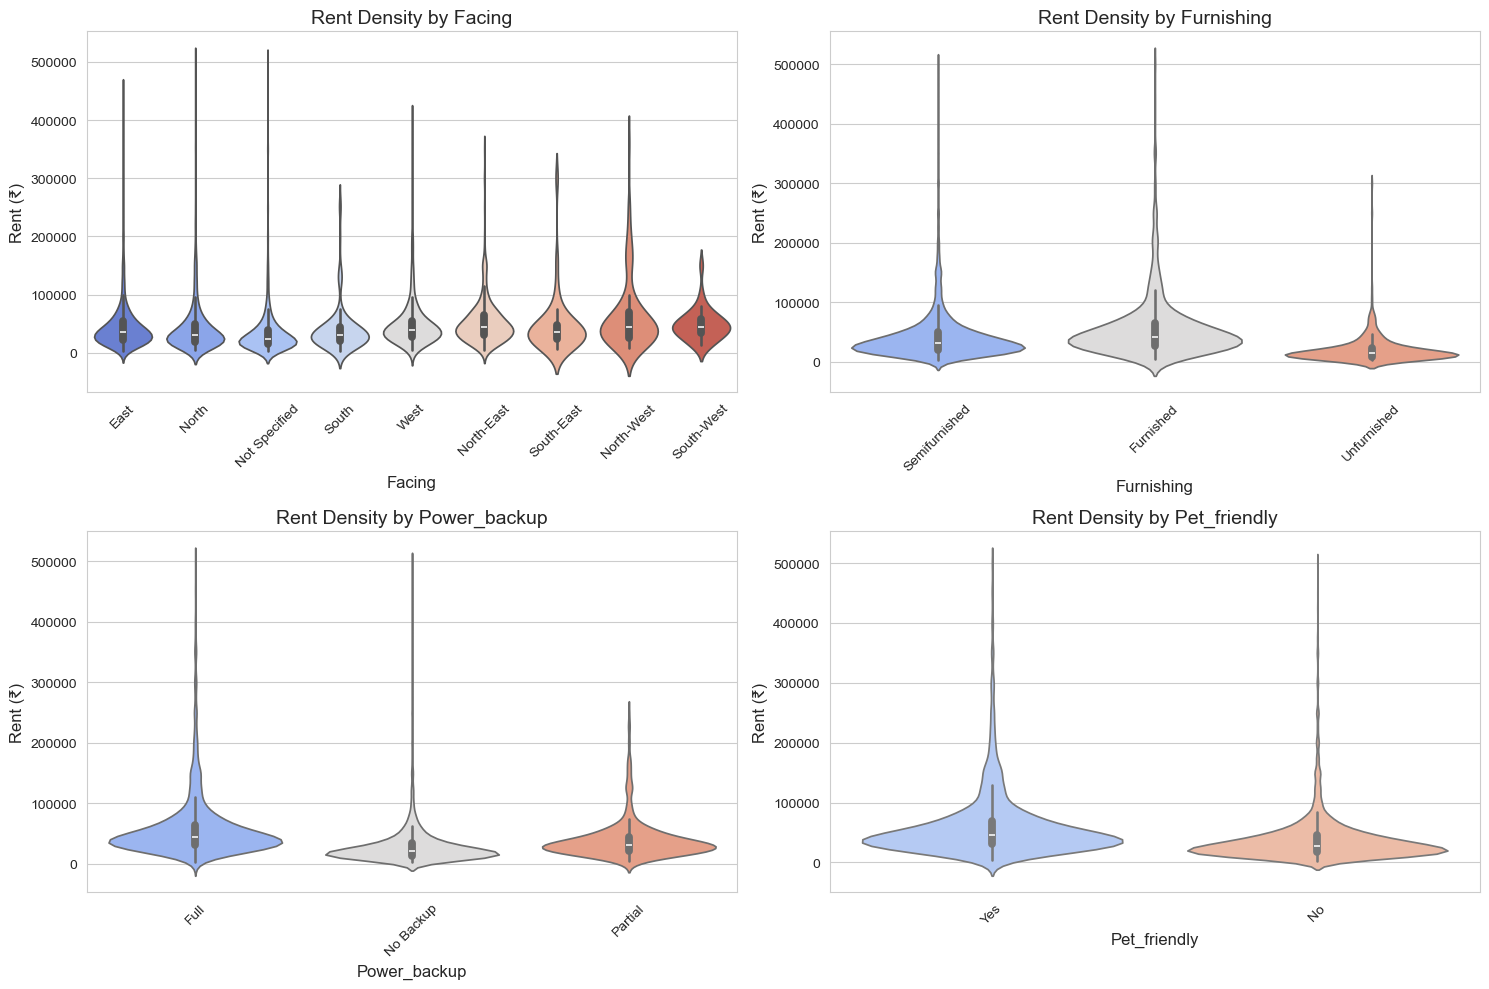

In [43]:
def categorical_violinplots(df):

    categorical_features = ['Facing', 'Furnishing', 'Power_backup', 'Pet_friendly']
    plt.figure(figsize=(15, 10))

    for i, feature in enumerate(categorical_features, 1):
        plt.subplot(2, 2, i)
        sns.violinplot(x=df[feature], y=df['Rent'], palette='coolwarm')
        plt.xticks(rotation=45)
        plt.xlabel(feature, fontsize=12)
        plt.ylabel("Rent (₹)", fontsize=12)
        plt.title(f"Rent Density by {feature}", fontsize=14)

    plt.tight_layout()
    plt.show()

categorical_violinplots(df)

### **Insights from Rent Statistics**  

#### **1. Facing Direction vs Rent:**  

- **North-West facing properties have the highest average rent (₹62,873) and median rent (₹45,000).**  
- **North and South facing properties have the lowest median rent (₹30,000).**  
- **Not Specified properties have the lowest rent (₹36,063 mean, ₹24,000 median), indicating less desirability.**  

#### **2. Furnishing vs Rent:**  

- **Furnished properties have the highest rent (₹57,407 mean, ₹42,000 median), suggesting tenants pay a premium for full furnishing.**  
- **Unfurnished properties have significantly lower rent (₹20,679 mean, ₹15,000 median), making them the most budget-friendly option.**  

#### **3. Power Backup vs Rent:**  

- **Full power backup properties command the highest rent (₹60,618 mean, ₹45,000 median).**  
- **No power backup properties have the lowest rent (₹30,036 mean, ₹21,000 median), suggesting tenants value power reliability.**  

#### **4. Pet-Friendliness vs Rent:** 

- **Pet-friendly properties have significantly higher rents (₹61,160 mean, ₹45,000 median) than non-pet-friendly ones (₹38,283 mean, ₹27,242 median).**  
- This indicates that landlords charge more for pet-friendly accommodations, possibly due to maintenance concerns.

In [44]:
def mean_median_rent_summary(df):
    
    categorical_features = ['Facing', 'Furnishing', 'Power_backup', 'Pet_friendly']
    
    for feature in categorical_features:
        summary = df.groupby(feature)['Rent'].agg(['mean', 'median']).round(0).sort_values(by='mean', ascending=False)
        print(f"\n===== {feature} vs Rent =====")
        print(summary)

mean_median_rent_summary(df)


===== Facing vs Rent =====
                  mean   median
Facing                         
North-West     62873.0  45000.0
North-East     52958.0  45000.0
West           51305.0  40000.0
South-West     48516.0  43500.0
South-East     47056.0  35000.0
East           47046.0  35000.0
North          44242.0  30000.0
South          40255.0  30000.0
Not Specified  36063.0  24000.0

===== Furnishing vs Rent =====
                  mean   median
Furnishing                     
Furnished      57407.0  42000.0
Semifurnished  43721.0  32000.0
Unfurnished    20679.0  15000.0

===== Power_backup vs Rent =====
                 mean   median
Power_backup                  
Full          60618.0  45000.0
Partial       40341.0  32000.0
No Backup     30036.0  21000.0

===== Pet_friendly vs Rent =====
                 mean   median
Pet_friendly                  
Yes           61160.0  45000.0
No            38283.0  27242.0


In [45]:
df['Age'] = df['Age'].replace('10+' , 11).astype(float)

### **Insights from Rent vs Various Factors**  

#### **1. Rating vs Rent:**

- There is **no strong correlation** between rating and rent.  
- Rent appears to be **widely scattered** across different rating values.  

#### **2. Age vs Rent:**  

- Rent shows **a very weak positive trend** with property age, meaning **newer properties do not necessarily command significantly higher rents**.  
- However, **luxury properties with high rents exist across all age groups**.  

#### **3. Covered Parking vs Rent:**  
    
- A **clear positive correlation** exists between covered parking and rent.  
- **More covered parking spots lead to higher rents**, suggesting it is a premium amenity.  

#### **4. Open Parking vs Rent:** 
    
- **Open parking has a slight negative correlation with rent.**  
- Properties with **more open parking tend to have lower rents**, possibly indicating less premium locations or standalone houses rather than high-end apartments.  

#### **5. Total Parking vs Rent:**  

- **Total parking spots have a positive correlation with rent.**  
- Properties with **multiple parking spaces tend to command higher rents**, reinforcing the demand for secured parking.  

#### **6. Total Floors vs Rent:**  
                                                                                                  
- Rent increases **slightly with the total number of floors** in the building.  
- Taller buildings might indicate **modern, high-rise apartments with premium facilities**, leading to **higher rents**.

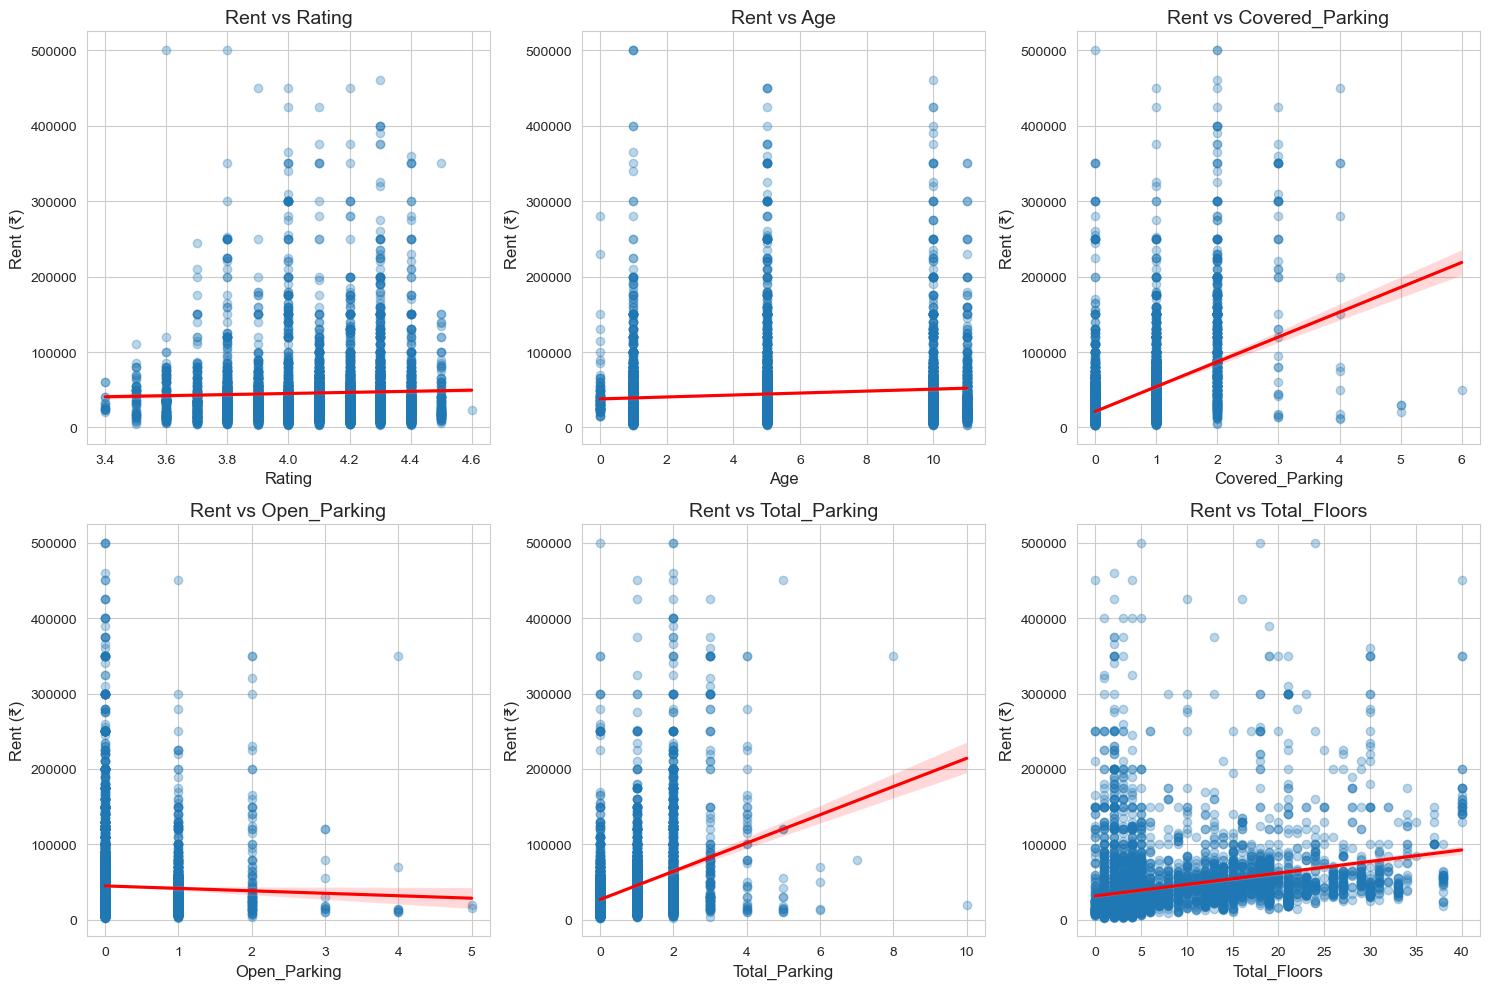

In [46]:
def scatter_rent_analysis(df):

    features = ['Rating', 'Age', 'Covered_Parking', 'Open_Parking', 'Total_Parking', 'Total_Floors']
    plt.figure(figsize=(15, 10))

    for i, feature in enumerate(features, 1):
        plt.subplot(2, 3, i)
        sns.regplot(x=df[feature], y=df['Rent'], scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
        plt.xlabel(feature, fontsize=12)
        plt.ylabel("Rent (₹)", fontsize=12)
        plt.title(f"Rent vs {feature}", fontsize=14)

    plt.tight_layout()
    plt.show()
    
scatter_rent_analysis(df)

### **Insights from Parking vs Rent Distribution:**

#### 1. **Covered Parking:**
    
   - As the number of **covered parking spots increases, the median rent also increases**.
   - Properties with **3-4 covered parking spots tend to have significantly higher rents**.
   - **More variation in higher rent brackets** with increased covered parking.

#### 2. **Open Parking:**
    
   - The relationship between **open parking and rent is weaker**.
   - Properties with **more open parking spots do not show a significant rent increase**.
   - The median rent remains relatively stable, and higher open parking spots may even be associated with lower rents.

#### 3. **Total Parking (Sum of Covered + Open):**
    
   - A **positive correlation exists between total parking and rent**, but this is primarily driven by **covered parking**.
   - Properties with **higher total parking tend to have higher rents**, but **the effect is more pronounced when covered parking is included**.

### **Key Takeaways:**

- **Covered Parking is a premium feature that significantly increases rent.**
- **Open Parking does not contribute much to rent value** and may even be associated with lower-end properties.
- **Total Parking shows a positive trend with rent, but mostly due to the influence of covered parking.**

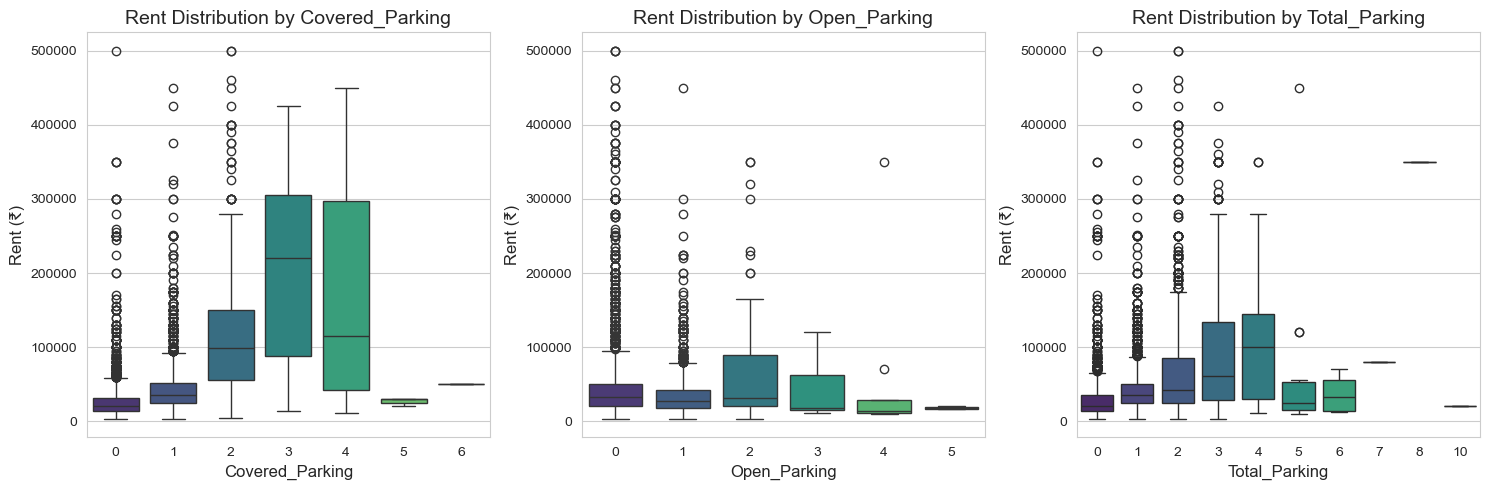

In [47]:
def parking_boxplots(df):

    parking_features = ['Covered_Parking', 'Open_Parking', 'Total_Parking']
    plt.figure(figsize=(15, 5))

    for i, feature in enumerate(parking_features, 1):
        plt.subplot(1, 3, i)
        sns.boxplot(x=df[feature], y=df['Rent'], palette='viridis')
        plt.xlabel(feature, fontsize=12)
        plt.ylabel("Rent (₹)", fontsize=12)
        plt.title(f"Rent Distribution by {feature}", fontsize=14)

    plt.tight_layout()
    plt.show()

parking_boxplots(df)

### **Insights from Rent Distribution by Total Floors, Age, and Rating:**

#### **1. Total Floors vs Rent:**

   - **Higher total floors tend to be associated with higher rents.** 
   - Properties in **high-rise buildings (20+ floors) have a wider rent distribution, including high-end properties.**
   - **Lower-floor buildings (0-10 floors) show more stable and lower median rents.**

#### **2. Age vs Rent:**

   - The rent distribution does **not show a strong correlation with age.**
   - **Newer properties (0-1 years) have a similar rent range to older properties (10+ years).**
   - **Higher rent outliers exist across all age groups**, suggesting that factors other than age (such as location and amenities) play a bigger role in rent determination.

#### **3. Rating vs Rent:**

   - **No strong trend between rating and rent.**
   - Properties with **higher ratings (4.2+) show slightly higher median rents**, but the difference is minimal.
   - **High-end properties exist across all rating levels, indicating that rating alone is not a strong predictor of rent.**

### **Key Takeaways:**

- **High-rise buildings (more total floors) tend to have higher rents.**
- **Property age does not significantly impact rent, suggesting that maintenance and location are more critical.**
- **Ratings have little effect on rent, possibly because they are subjective and influenced by tenant preferences.**

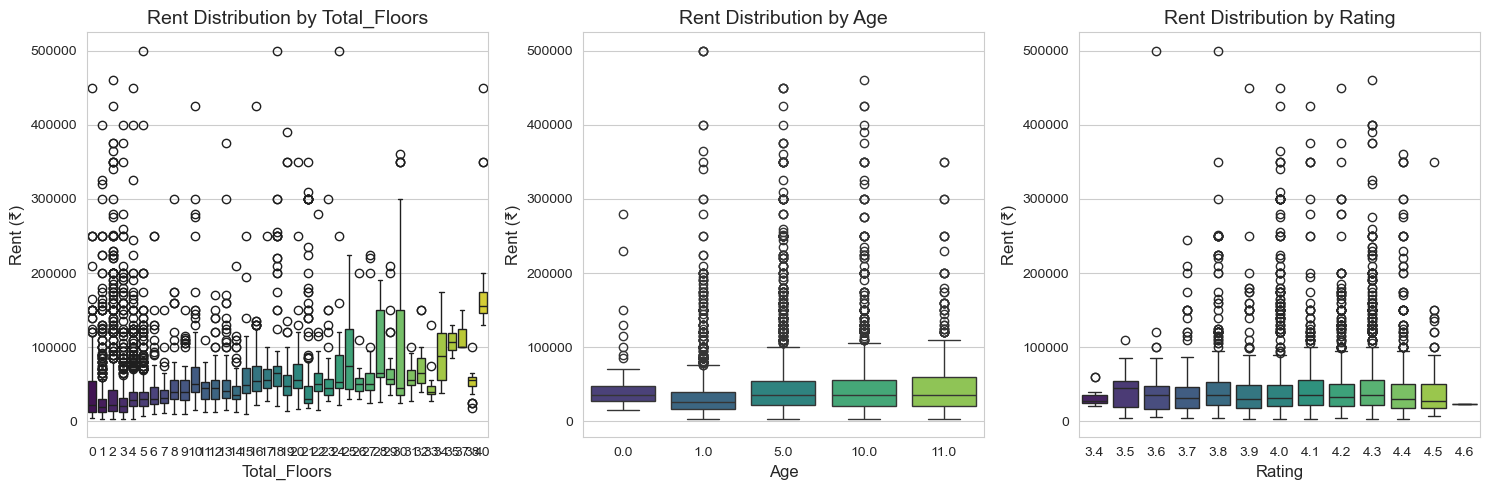

In [48]:
def rent_boxplots(df):

    features = ['Total_Floors', 'Age', 'Rating']
    plt.figure(figsize=(15, 5))

    for i, feature in enumerate(features, 1):
        plt.subplot(1, 3, i)
        sns.boxplot(x=df[feature], y=df['Rent'], palette='viridis')
        plt.xlabel(feature, fontsize=12)
        plt.ylabel("Rent (₹)", fontsize=12)
        plt.title(f"Rent Distribution by {feature}", fontsize=14)

    plt.tight_layout()
    plt.show()

rent_boxplots(df)

### **Insights from the Correlation Matrix: Rent vs. Other Numeric Features**

#### 1. **Strongest Correlation with Rent:**  
    
   - **Covered Parking (0.45 correlation):** Higher availability of **covered parking is strongly associated with higher rents.**  
   - **Total Parking (0.33 correlation):** More total parking spots also increase rent, but not as significantly as covered parking.  
   - **Total Floors (0.27 correlation):** Taller buildings tend to have slightly higher rents.

#### 2. **Weak Correlation with Rent:**  
    
   - **Age (0.10 correlation):** **Property age has minimal impact on rent**, reinforcing the earlier observation that **both new and old buildings can have high rents.**  
   - **Rating (0.03 correlation):** **User ratings do not significantly affect rent.** This suggests that tenants may prioritize objective factors like parking and location over subjective ratings.  
   - **Open Parking (-0.03 correlation):** **Open parking does not contribute significantly to rent, and it may even have a slightly negative impact.**  

#### 3. **Key Takeaways:**  
    
   - **Parking availability, especially covered parking, is a major rent determinant.**  
   - **High-rise buildings tend to have higher rents, but the effect is moderate.**  
   - **Age and ratings have little influence on rent.**  
   - **Open parking does not increase rent significantly, possibly because tenants prefer covered parking.**

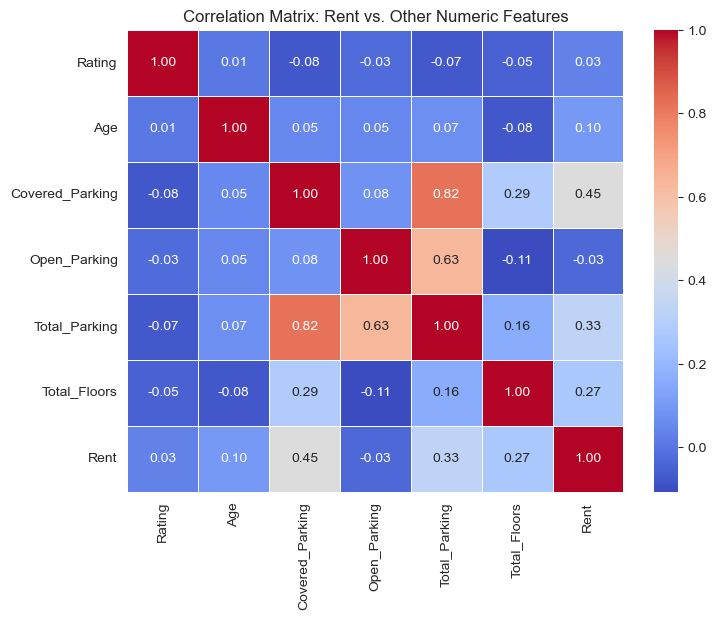

In [49]:
def correlation_matrix(df):

    features = ['Rating', 'Age', 'Covered_Parking', 'Open_Parking', 'Total_Parking', 'Total_Floors', 'Rent']
    corr_matrix = df[features].corr()

    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title("Correlation Matrix: Rent vs. Other Numeric Features")
    plt.show()

correlation_matrix(df)

### **Insights from Rent vs. Brokerage, Deposit, and Maintenance Analysis**  

#### 1. **Rent vs. Brokerage:**  
    
   - There is a **strong positive linear correlation** between brokerage and rent.  
   - **Higher rent properties tend to have higher brokerage fees.**  
   - The regression line suggests that brokerage is **typically a fixed percentage of rent**, which aligns with common real estate practices.

#### 2. **Rent vs. Deposit:**  
    
   - **Deposit amount strongly correlates with rent.**  
   - **Higher rent properties require larger deposits,** indicating a proportional relationship.  
   - Some **outliers** exist where deposits are unusually high or low compared to rent.

#### 3. **Rent vs. Maintenance:**  
       
   - **Maintenance costs tend to increase with rent but with more variation.**  
   - Some properties have **low rent but high maintenance costs**, possibly indicating premium amenities or additional service charges.  
   - The correlation is weaker than with brokerage and deposit, suggesting maintenance fees may depend on other factors beyond rent.

### **Key Takeaways:**  

- **Brokerage and deposit show a nearly linear relationship with rent.**  
- **Maintenance costs are positively correlated but with more variability.**  
- **High-rent properties tend to have proportionally high deposits and brokerage fees.**

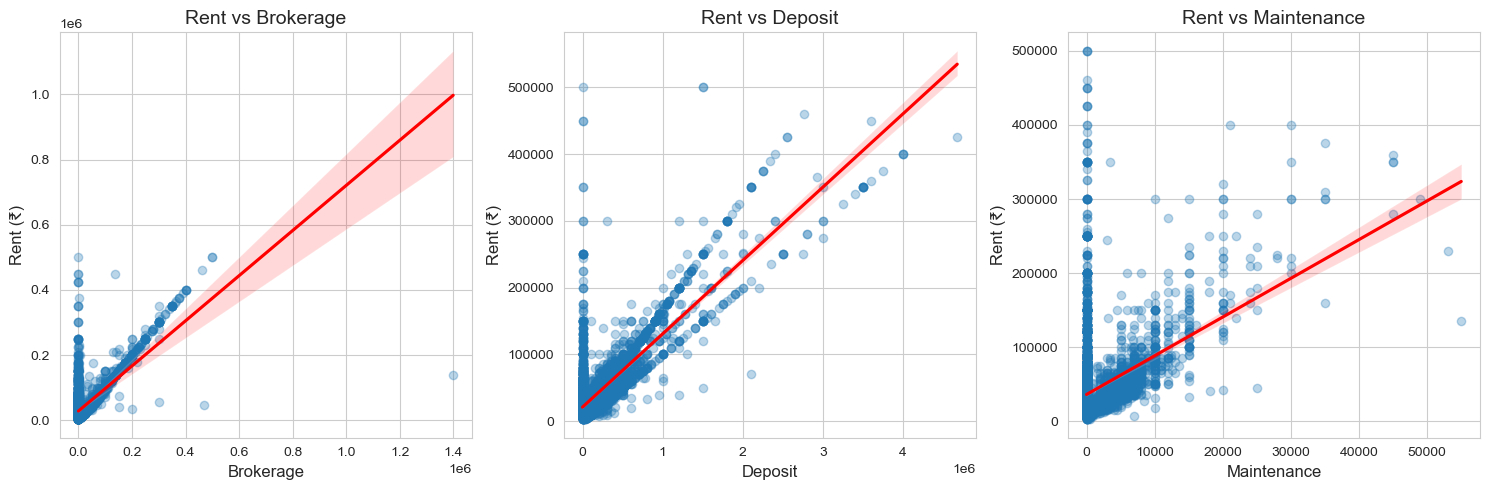

In [50]:
def scatter_rent_analysis(df):

    features = ['Brokerage', 'Deposit', 'Maintenance']
    plt.figure(figsize=(15, 5))

    for i, feature in enumerate(features, 1):
        plt.subplot(1, 3, i)
        sns.regplot(x=df[feature], y=df['Rent'], scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
        plt.xlabel(feature, fontsize=12)
        plt.ylabel("Rent (₹)", fontsize=12)
        plt.title(f"Rent vs {feature}", fontsize=14)

    plt.tight_layout()
    plt.show()

scatter_rent_analysis(df)

### **Insights from Correlation Matrix: Rent vs. Brokerage, Deposit, and Maintenance**  

#### 1. **Strongest Correlation:**  
    
   - **Deposit (0.81) has the highest correlation with Rent.**  
   - This confirms that **higher rent properties generally require higher deposits.**  

#### 2. **Brokerage (0.73) also shows a strong correlation with Rent.** 

   - Indicates that brokerage fees increase **proportionally with rent** (likely a percentage-based structure).  

#### 3. **Maintenance (0.41) has a weaker correlation with Rent.** 

   - While higher-rent properties may have **higher maintenance costs**, the relationship is **less direct** than with deposit and brokerage.  
   - Maintenance costs might also depend on **building age, amenities, or services.**  

#### 4. **Brokerage and Deposit (0.69) show a moderately strong correlation.**  

   - Suggests that **higher deposits often accompany higher brokerage fees,** possibly due to premium property locations or real estate policies.  

### **Key Takeaways:**  
       
- **Deposit is the strongest predictor of rent.**  
- **Brokerage is also highly correlated, following a percentage-based trend.**  
- **Maintenance costs vary more independently, influenced by other factors beyond just rent.**

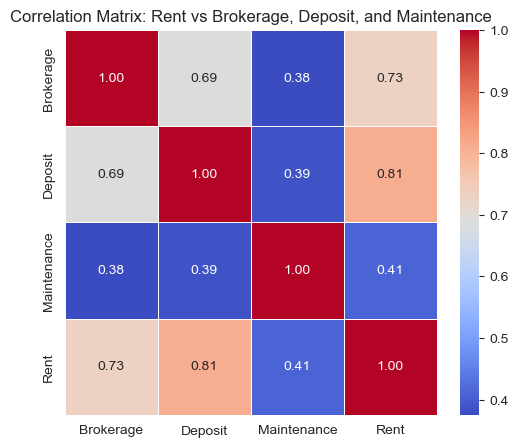

In [51]:
def correlation_matrix(df):

    features = ['Brokerage', 'Deposit', 'Maintenance', 'Rent']
    corr_matrix = df[features].corr()

    plt.figure(figsize=(6, 5))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title("Correlation Matrix: Rent vs Brokerage, Deposit, and Maintenance")
    plt.show()

correlation_matrix(df)

### **Insights from Rent Distribution by Availability (Family, Women Bachelors, Men Bachelors)**  

#### 1. **Family-Friendly Properties Tend to Have Higher Rent:**  
    
   - The median rent for properties **available for families (1)** is slightly **higher** compared to those that are **not (0).**  
   - This could be due to **larger property sizes**, **better amenities**, or **more premium locations** catering to families.  

#### 2. **Women & Men Bachelors Have Similar Rent Distribution:**  
    
   - Properties available for **women bachelors (1) and men bachelors (1) show nearly identical rent distributions** compared to those that are not.  
   - Suggests that restrictions on bachelors **do not significantly impact rent values.**  

#### 3. **Presence of Outliers Across All Groups:**  

   - Some **high-end properties exceed ₹500,000 in rent** in all categories, indicating the presence of luxury listings.  

### **Key Takeaways:**  

- **Family-friendly properties may come at a higher cost.**  
- **Bachelor-friendly policies do not significantly impact rent.**  
- **Luxury listings exist across all availability types.**

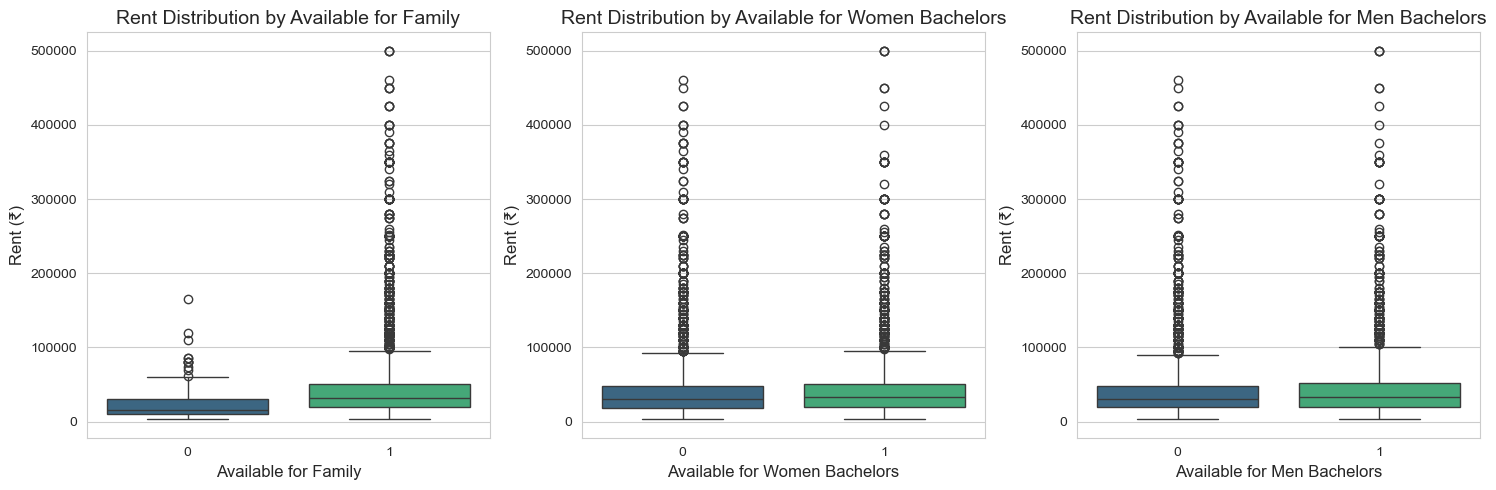

In [52]:
def availability_rent_boxplots(df):

    features = ['Available_for_Family', 'Available_for_Women_Bachelors', 'Available_for_Men_Bachelors']
    plt.figure(figsize=(15, 5))

    for i, feature in enumerate(features, 1):
        plt.subplot(1, 3, i)
        sns.boxplot(x=df[feature], y=df['Rent'], palette='viridis')
        plt.xlabel(feature.replace("_", " "), fontsize=12)
        plt.ylabel("Rent (₹)", fontsize=12)
        plt.title(f"Rent Distribution by {feature.replace('_', ' ')}", fontsize=14)

    plt.tight_layout()
    plt.show()

availability_rent_boxplots(df)

### **Insights from Violin Plots: Rent vs Availability for Families and Bachelors**

#### 1. **General Rent Distribution**:

   - Across all three plots, rent values show a similar distribution with a dense cluster of properties in the lower rent range.
   - A small number of high-rent outliers significantly skew the distribution upwards.

#### 2. **Available for Families (First Plot)**:
       
   - Properties available for families (marked as 1) seem to have a slightly wider distribution in the lower to mid-rent range compared to those not available for families (marked as 0).
   - This could indicate that family-friendly properties tend to offer more variety in pricing.

#### 3. **Available for Women Bachelors (Second Plot)**:
                         
   - The rent distribution looks similar between properties that allow women bachelors and those that don't.
   - There's no significant difference in the rent range based on availability for women bachelors.

#### 4. **Available for Men Bachelors (Third Plot)**:
                         
   - Similar to women bachelors, the rent distribution doesn't differ significantly based on availability for men bachelors.
   - Properties available for men bachelors have a slightly broader distribution, but the variation is minimal.

### **Key Takeaways**:
       
   - Availability for families may influence rent distribution more than bachelor availability.
   - Properties not restricting availability by gender don't show much variance in rent distribution.
   - High-end properties (outliers) are present regardless of availability categories.

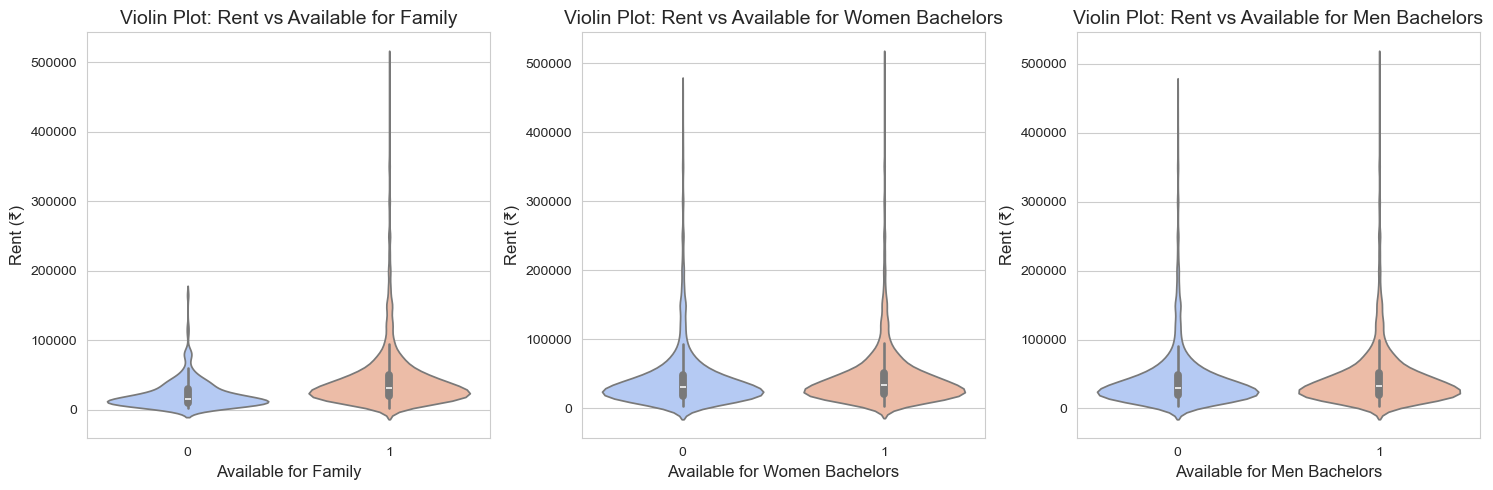

In [53]:
def availability_rent_violinplots(df):

    features = ['Available_for_Family', 'Available_for_Women_Bachelors', 'Available_for_Men_Bachelors']
    plt.figure(figsize=(15, 5))

    for i, feature in enumerate(features, 1):
        plt.subplot(1, 3, i)
        sns.violinplot(x=df[feature], y=df['Rent'], palette='coolwarm')
        plt.xlabel(feature.replace("_", " "), fontsize=12)
        plt.ylabel("Rent (₹)", fontsize=12)
        plt.title(f"Violin Plot: Rent vs {feature.replace('_', ' ')}", fontsize=14)

    plt.tight_layout()
    plt.show()

availability_rent_violinplots(df)

### **Insights from Bar Plots: Average & Median Rent by Availability**

#### 1. **Available for Family**:

   - Properties available for families (1) have a significantly higher average (₹45,000) and median rent (₹32,000) compared to those not available (0), with an average of ₹23,000 and a median of ₹16,000.
   - This suggests that family-appropriate properties generally command higher rents.

#### 2. **Available for Women Bachelors**:
       
   - The average rent for properties available to women bachelors is slightly higher (₹45,000) compared to those that are not (₹43,000).
   - The median rent also reflects a similar trend (₹33,000 for available vs. ₹30,000 for not available).
   - However, the difference is not as pronounced as with family availability.

#### 3. **Available for Men Bachelors**:
                                                 
   - A similar pattern is observed for men bachelors, where properties that are available for them have slightly higher mean (₹46,000) and median rents (₹33,000) than those that are not (mean ₹43,000, median ₹30,000).
   - The marginal difference indicates that bachelor availability doesn't drastically impact rent prices.

### **Key Takeaways**:
                                                 
   - **Family availability** seems to be a more significant factor influencing higher rent prices.
   - Availability for bachelors (both men and women) results in minor differences in rent pricing.
   - The consistent gap between average and median rents suggests the presence of high-value outliers affecting the mean values.

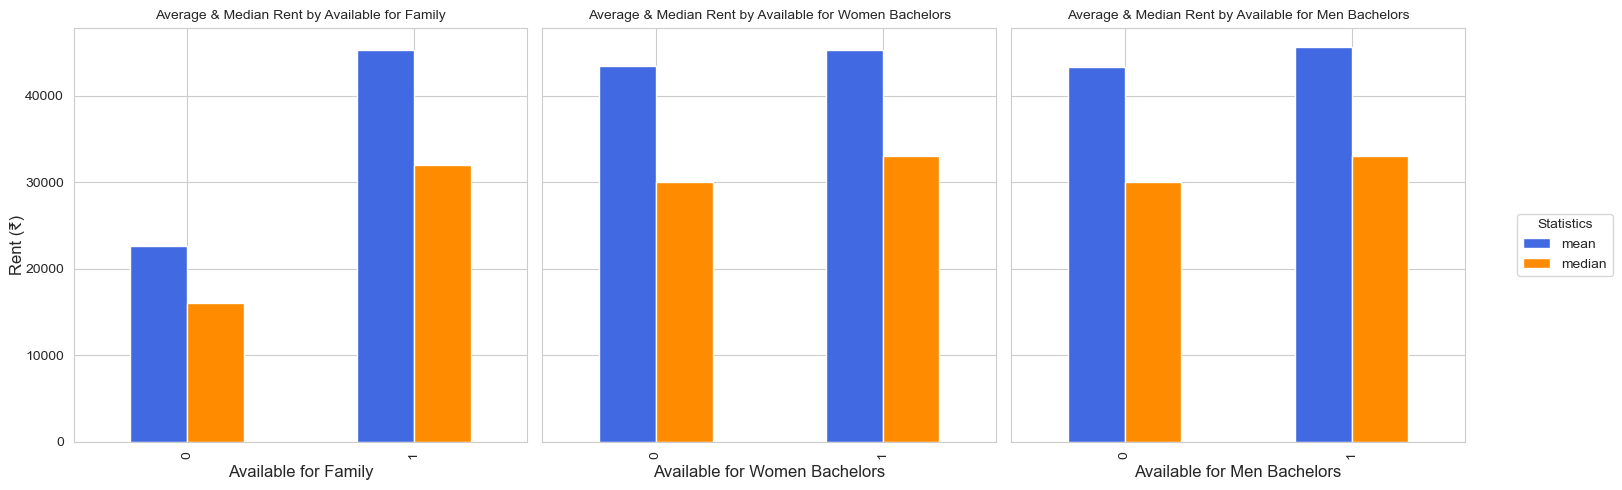

In [54]:
def availability_rent_barplots(df):

    features = ['Available_for_Family', 'Available_for_Women_Bachelors', 'Available_for_Men_Bachelors']
    fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)  # Single row, shared Y-axis

    for i, feature in enumerate(features):
        rent_stats = df.groupby(feature)['Rent'].agg(['mean', 'median']).round(0)
        rent_stats.plot(kind='bar', ax=axes[i], color=['royalblue', 'darkorange'], legend=False)  # 🔹 Remove legend inside plots
        axes[i].set_xlabel(feature.replace("_", " "), fontsize=12)
        axes[i].set_title(f"Average & Median Rent by {feature.replace('_', ' ')}", fontsize=10)

    fig.supylabel("Rent (₹)", fontsize=12)

    handles, labels = axes[0].get_legend_handles_labels()
    fig.legend(handles, labels, title="Statistics", loc='center left', bbox_to_anchor=(1.02, 0.5))

    plt.tight_layout()
    plt.show()

availability_rent_barplots(df)

### **Insights from Rent Analysis Based on Charges Inclusion**

#### 1. **Mean and Median Rent Difference**:

   - Properties where charges (like water and electricity) **are not included** have a **higher average (mean) and median rent** compared to properties where charges are included.
   - Mean Rent (Charges Not Included): ~₹50,000
   - Median Rent (Charges Not Included): ~₹35,000
   - Mean Rent (Charges Included): ~₹30,000
   - Median Rent (Charges Included): ~₹22,000

#### 2. **Rent Distribution**:

   - The box plot reveals that the rent distribution for "charges not included" properties is **wider with more outliers** at the higher end.
   - Properties with charges included show a **more concentrated distribution** with fewer extreme values.

#### 3. **Density Observation**:
                                       
   - The violin plot indicates that properties with "charges included" have a denser concentration in the **lower rent range**.
   - Properties excluding charges show a **broader spread**, including more high-rent properties.

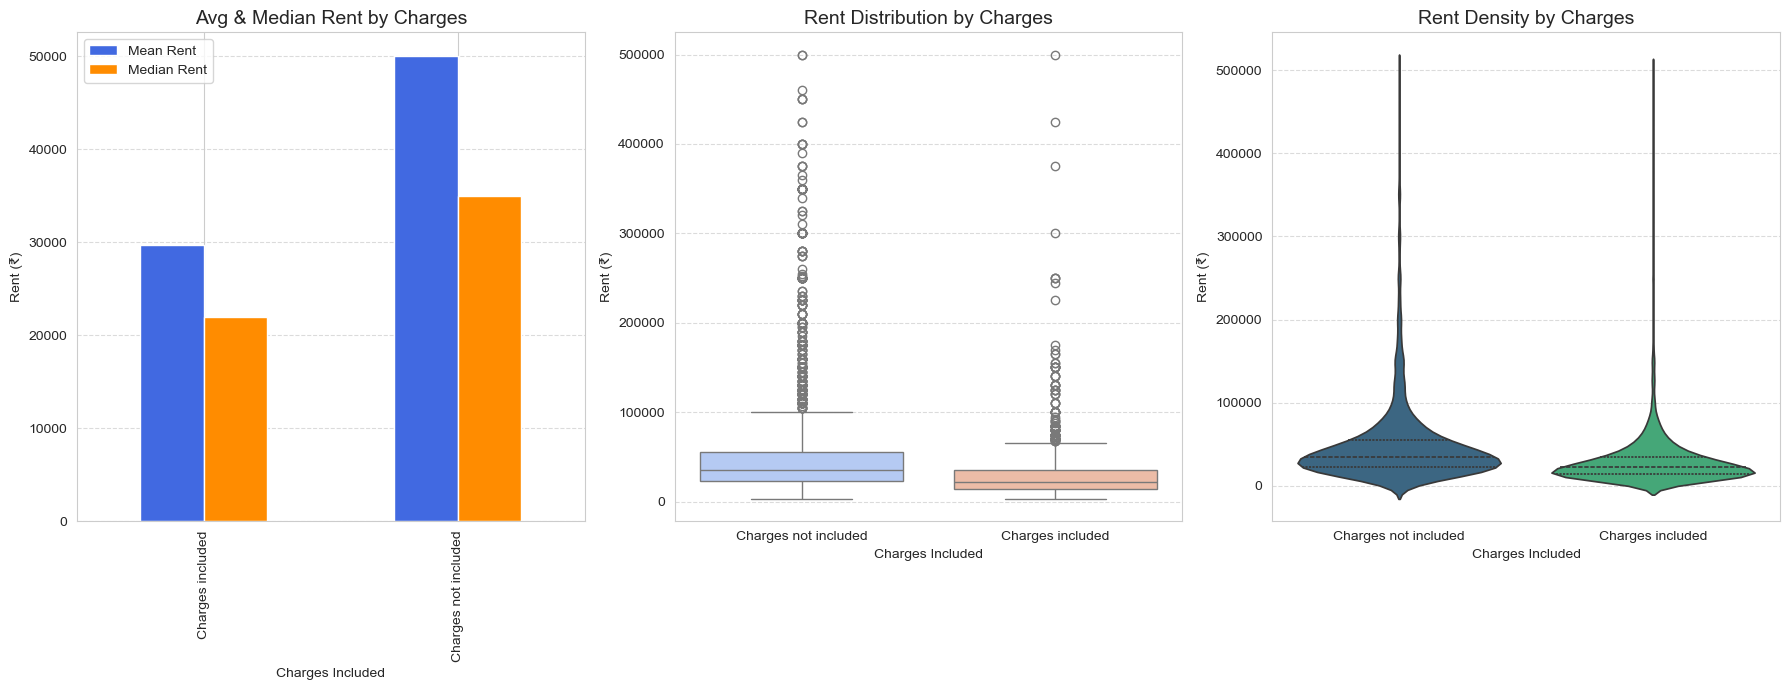

In [55]:
def charges_rent_combined_plots(df):

    fig, axes = plt.subplots(1, 3, figsize=(18, 7))

    # Bar Plot: Mean & Median Rent
    rent_stats = df.groupby('Charges')['Rent'].agg(['mean', 'median']).round(0)
    rent_stats.plot(kind='bar', color=['royalblue', 'darkorange'], ax=axes[0])
    axes[0].set_title("Avg & Median Rent by Charges", fontsize=14)
    axes[0].set_xlabel("Charges Included")
    axes[0].set_ylabel("Rent (₹)")
    axes[0].legend(["Mean Rent", "Median Rent"])
    axes[0].grid(axis='y', linestyle='--', alpha=0.7)

    # Box Plot: Rent Distribution
    sns.boxplot(x='Charges', y='Rent', data=df, palette='coolwarm', ax=axes[1])
    axes[1].set_title("Rent Distribution by Charges", fontsize=14)
    axes[1].set_xlabel("Charges Included")
    axes[1].set_ylabel("Rent (₹)")
    axes[1].grid(axis='y', linestyle='--', alpha=0.7)

    # Violin Plot: Rent Density
    sns.violinplot(x='Charges', y='Rent', data=df, palette='viridis', inner='quartile', ax=axes[2])
    axes[2].set_title("Rent Density by Charges", fontsize=14)
    axes[2].set_xlabel("Charges Included")
    axes[2].set_ylabel("Rent (₹)")
    axes[2].grid(axis='y', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()

charges_rent_combined_plots(df)

### **1. Positioning of Data Points**  

- **Charges Included (Blue Dots)**:  
  - Most blue dots (charges included) are **clustered in the lower rent and smaller area ranges** (primarily under ₹100,000 and below 2000 sq. ft).  
  - This suggests that properties offering an all-inclusive rent (covering maintenance, utilities, etc.) are **smaller and priced more affordably** to attract budget-conscious tenants.

- **Charges Not Included (Red Dots)**:  
  - Red dots are **spread across both lower and higher rent values**, but there's a **significant concentration at higher rent and larger area ranges** (above ₹100,000 and 2000+ sq. ft).  
  - This indicates that larger, premium properties often prefer to **exclude charges**, keeping the base rent competitive while allowing tenants to handle additional costs separately.

---

### **2. Reason for Lower Rent in Charges-Included Properties**

- **Simplified Costing for Smaller Units**:  
  - Smaller properties (typically under 2000 sq. ft) often target renters looking for straightforward, predictable expenses. Including charges helps simplify the rent process and keeps the property attractive to tenants.  
  - The landlord may also factor in **average lower utility usage** for smaller spaces, allowing for a lower inclusive rent price.

---

### **3. Visual Justification**  
                                                                                                                                                                                       
- Notice how **higher rent brackets** (₹200,000 and above) are almost **exclusively red**. This means larger, premium properties rarely include charges, contributing to a higher overall rent when charges are eventually added.  
- Conversely, the **lower rent and area clusters** are dominated by **blue dots**, confirming that properties with charges included are concentrated in the affordable segment.

---

### **Conclusion**  
In essence, including charges in rent is a strategy seen mostly with **smaller, affordable properties** to offer simplicity and value. On the other hand, **larger properties exclude charges** to offer flexible pricing, which leads to higher rents when total costs are considered.

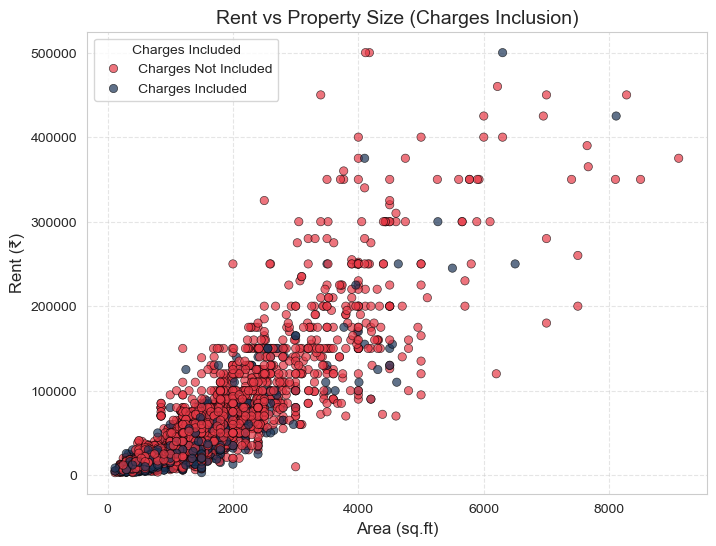

In [56]:
def property_size_vs_charges(df):

    custom_palette = {'Charges not included': '#E63946',  # Red
                      'Charges included': '#1D3557'}  # Dark Blue

    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df['Area (sq.ft)'], y=df['Rent'], hue=df['Charges'], 
                    palette=custom_palette, alpha=0.7, edgecolor='black')

    plt.xlabel("Area (sq.ft)", fontsize=12)
    plt.ylabel("Rent (₹)", fontsize=12)
    plt.title("Rent vs Property Size (Charges Inclusion)", fontsize=14)

    # Fix legend colors
    handles, labels = plt.gca().get_legend_handles_labels()
    plt.legend(handles=handles, labels=['Charges Not Included', 'Charges Included'], 
               title="Charges Included", loc="upper left", fontsize=10)

    plt.grid(True, linestyle="--", alpha=0.5)
    plt.show()

property_size_vs_charges(df)

### **Insights on Rent Trends Based on Nearby Amenities**

#### 1. **Hospitals and Clinics Nearby**:  
   - There's a slight negative correlation between the number of nearby hospitals/clinics and rent. As the number increases, rent tends to slightly decrease.  

#### 2. **Bank ATMs Nearby**:  
   - Similar to healthcare facilities, an increase in the number of nearby ATMs shows a slight decrease in rent.  

#### 3. **Public Places Nearby**:  
   - Properties with more nearby public places also tend to have slightly lower rents.  

#### 4. **Education Centers Nearby**:  
   - The correlation between rent and nearby education centers is less distinct, but there's a mild negative trend.  

#### 5. **Transportation Depots Nearby**:  
   - Interestingly, there's a positive correlation here. Properties near more transportation depots tend to have higher rents. Accessibility likely adds value.  

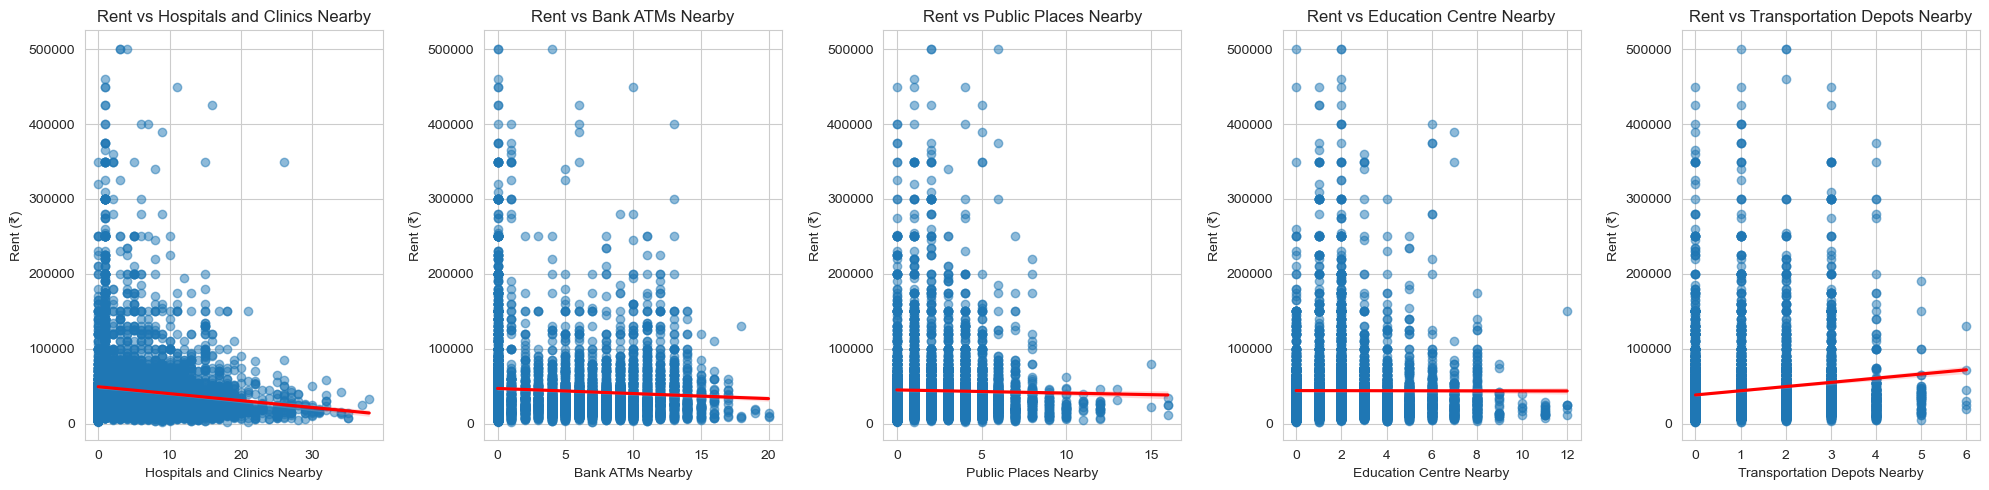

In [57]:
def nearby_facilities_regression(df):

    features = ['Hospitals_and_Clinics_Nearby', 'Bank_ATMs_Nearby', 
                'Public_Places_Nearby', 'Education_Centre_Nearby', 
                'Transportation_Depots_Nearby']

    fig, axes = plt.subplots(1, 5, figsize=(20, 5))
    
    for i, feature in enumerate(features):
        sns.regplot(x=df[feature], y=df['Rent'], scatter_kws={'alpha': 0.5}, 
                    line_kws={'color': 'red'}, ax=axes[i])
        axes[i].set_title(f"Rent vs {feature.replace('_', ' ')}", fontsize=12)
        axes[i].set_xlabel(feature.replace('_', ' '), fontsize=10)
        axes[i].set_ylabel("Rent (₹)", fontsize=10)
    
    plt.tight_layout()
    plt.show()

nearby_facilities_regression(df)

### **Insights from the Correlation Heatmap:**

#### 1. **Weak Negative Correlation with Rent**:

   - **Hospitals and Clinics Nearby (-0.12)**: Slightly negative correlation suggests that as the number of nearby hospitals increases, rent may slightly decrease.
   - **Bank ATMs Nearby (-0.07)**, **Public Places Nearby (-0.02)**, and **Education Centres Nearby (-0.00)** show very weak or negligible negative correlations with rent.
   
#### 2. **Positive Correlation with Transportation Depots (0.14)**:

   - Areas with more transportation depots nearby slightly tend to have higher rent, possibly due to increased accessibility.

#### 3. **Inter-Correlations Between Amenities**:

   - **Hospitals and Clinics** have moderate positive correlations with **Bank ATMs (0.53)** and **Public Places (0.38)**, indicating that these amenities often coexist in similar areas.
   - **Public Places** and **Education Centres** are also moderately correlated (0.36), suggesting that educational hubs are often close to public places.

### **Summary:**

The correlations with rent are relatively weak, implying that the presence of these amenities alone does not strongly influence rent prices. Other factors like property type, size, or location prestige might play a more significant role.

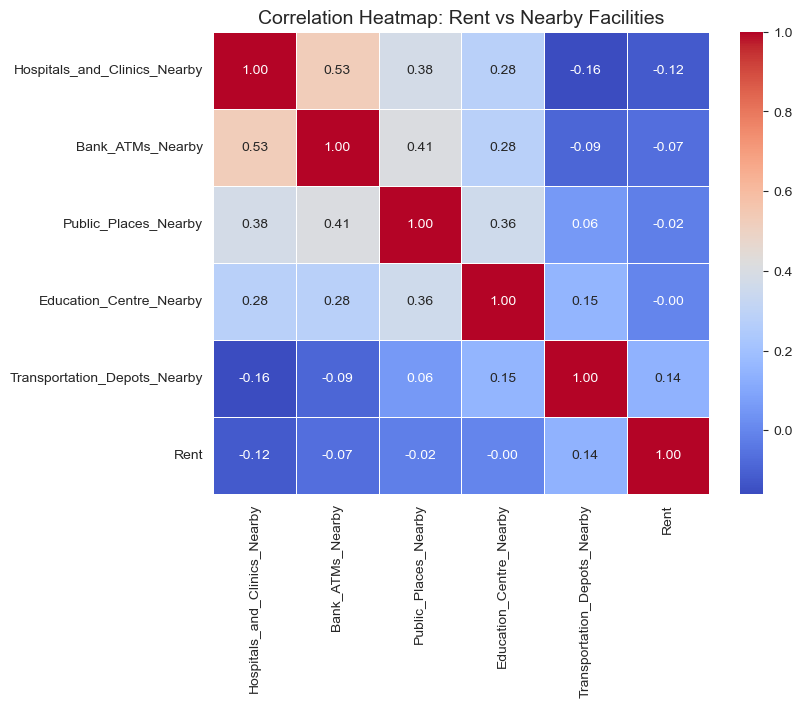

In [58]:
def nearby_facilities_correlation(df):

    features = ['Hospitals_and_Clinics_Nearby', 'Bank_ATMs_Nearby', 
                'Public_Places_Nearby', 'Education_Centre_Nearby', 
                'Transportation_Depots_Nearby', 'Rent']
    
    corr_matrix = df[features].corr()
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title("Correlation Heatmap: Rent vs Nearby Facilities", fontsize=14)
    plt.show()

nearby_facilities_correlation(df)

### **1. Model Specification**

- **Model 1**: Predicts **Rent** using linear regression with raw values.
- **Model 2**: Predicts **Log_Rent** using linear regression with a log-transformed dependent variable and log-transformed area.

---

### **2. Model Fit**

| Metric               | Model 1 (Rent) | Model 2 (Log_Rent) |
|----------------------|---------------|--------------------|
| **R-squared**        | 0.748         | 0.754              |
| **Adj. R-squared**   | 0.748         | 0.754              |
| **AIC**              | 155,800       | 6,302              |
| **BIC**              | 155,900       | 6,343              |

- **Insight**: Model 2 has a slightly better **R-squared** and **AIC/BIC** values, indicating a better fit. The log transformation helps stabilize variance and linearize relationships, improving overall model performance.

---

### **3. Coefficient Analysis**

- **Area**:
  - *Model 1*: Each additional sq.ft adds about **49.94 units** to Rent.
  - *Model 2*: A **1% increase in Area** leads to approximately **0.819% increase in Rent**, showing elasticity.
  
- **Bedrooms**:
  - *Model 1*: Each additional bedroom reduces rent by **7013 units**—this is counterintuitive and may suggest multicollinearity.
  - *Model 2*: Each additional bedroom increases rent by **4.59%**, which is more logical.

- **Bathrooms**:
  - Positive and significant in both models, but with a **stronger effect** in Model 2 (**18.06% increase**).

- **Balcony & Additional Rooms**:
  - *Model 1*: These variables are **not statistically significant** (p-values > 0.05).
  - *Model 2*: Both are **significant**, though the effect sizes are small (Balcony: **6.43%**, Additional Rooms: **1.61%**).

---

### **4. Error Distribution & Assumptions**
      
- **Skewness & Kurtosis**:
  - *Model 1*: High skewness (**2.553**) and kurtosis (**29.37**) indicate heavy tails and non-normal errors.
  - *Model 2*: Near-normal residuals with skewness (**-0.142**) and kurtosis (**3.76**).

- **Omnibus & JB Tests**:
  - *Model 1*: Highly significant, suggesting non-normal residuals.
  - *Model 2*: Still significant, but the residual distribution is closer to normality.

- **Durbin-Watson**:
  - Both models show slight autocorrelation (ideal value = 2). Model 2 has **slightly higher autocorrelation**.

---

### **5. Multicollinearity & Numerical Issues**
                                                       
- **Condition Number**:
  - *Model 1*: **5210** → Indicates potential multicollinearity.
  - *Model 2*: **172** → Well within safe limits, showing better numerical stability.

---

### **Key Insights & Recommendations**

#### 1. **Model 2 is superior** due to:

   - Better model fit (higher R-squared, lower AIC/BIC).
   - Statistically significant predictors.
   - Improved residual distribution and less multicollinearity.

#### 2. **Transformation Benefit**:

   - Log-transforming the dependent variable stabilized variance, improved linearity, and reduced outlier impact.

#### 3. **Bedroom Variable Concern**:

   - The negative coefficient in Model 1 suggests possible multicollinearity. Model 2 corrects this, indicating the transformation resolves underlying issues.

In [59]:
import statsmodels.api as sm

features = ['Bedroom', 'Bathroom', 'Balcony', 'Additional_rooms' , 'Area (sq.ft)']
X = df[features]
X = sm.add_constant(X)
y = df['Rent']
model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   Rent   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     4029.
Date:                Tue, 11 Mar 2025   Prob (F-statistic):               0.00
Time:                        23:28:14   Log-Likelihood:                -77919.
No. Observations:                6779   AIC:                         1.558e+05
Df Residuals:                    6773   BIC:                         1.559e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.819e+04    838.460  

In [60]:
import scipy.stats as stats

df['Log_Area'] = np.log(df['Area (sq.ft)'])
df['Log_Rent'] = np.log(df['Rent'])

X = df[['Log_Area', 'Bedroom', 'Bathroom', 'Balcony', 'Additional_rooms']]
X = sm.add_constant(X)
y = df['Log_Rent']

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Log_Rent   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     4158.
Date:                Tue, 11 Mar 2025   Prob (F-statistic):               0.00
Time:                        23:28:14   Log-Likelihood:                -3145.0
No. Observations:                6779   AIC:                             6302.
Df Residuals:                    6773   BIC:                             6343.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                4.0190      0.099  

### **VIF Analysis (Variance Inflation Factor)**

| Feature          | VIF     | Interpretation                                      |
|------------------|---------|------------------------------------------------------|
| **const**        | 450.54  | High VIF for constant is common and not concerning. |
| **Log_Area**     | 3.95    | Acceptable; low multicollinearity.                  |
| **Bedroom**      | 4.91    | Moderate, but still acceptable.                     |
| **Bathroom**     | 4.83    | Moderate, but acceptable.                           |
| **Balcony**      | 1.46    | Low multicollinearity.                              |
| **Additional_rooms** | 1.14 | Very low multicollinearity.                        |

---

### **Insights**
    
- **No serious multicollinearity** is present as all VIF values are **below 5**.  
- The moderate VIFs for **Bedroom** and **Bathroom** are acceptable but could be monitored if further variables are added in the future.  
- The model is **stable and reliable** regarding multicollinearity.

In [61]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df[['Log_Area', 'Bedroom', 'Bathroom', 'Balcony', 'Additional_rooms']]  

X = sm.add_constant(X)

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

            feature         VIF
0             const  450.537807
1          Log_Area    3.948383
2           Bedroom    4.906535
3          Bathroom    4.833541
4           Balcony    1.460155
5  Additional_rooms    1.142848
